# Developing a predictive model for cardiovascular diseases using Machine                                             Learning (ML) techniques.

#                                                          Angeliki Fragkeskou

## Import Libraries

In [48]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import warnings 
import tensorflow as tf
import plotly.express as px
warnings.filterwarnings('ignore')

In [101]:
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

## Data Acquisition and Understanding 

In [3]:
file_path1 = 'uci dataset - kaggle/heart_disease_uci.csv'
file_path2 = 'Heart disease dataset - kaggle/heart.csv'

train_df = pd.read_csv(file_path1) #train dataset dataframe
evaluation_df = pd.read_csv(file_path2)  #evaluation dataset dataframe

data = train_df

file1_contents = train_df.head() #train contents
file2_contents = evaluation_df.head() #evaluation contents
print("First 5 rows of training dataset:")
file1_contents

First 5 rows of training dataset:


id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [4]:
print("First 5 rows of evaluation dataset:")
file2_contents

First 5 rows of evaluation dataset:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [7]:
print("Column descriptions of training dataset:\n")
df1_info = train_df.info()
print("Column descriptions of evaluation dataset:\n")
df2_info = evaluation_df.info()

df1_desc = train_df.describe()

df2_desc = evaluation_df.describe()

df1_info, df2_info

Column descriptions of training dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Column descriptions of evaluation dataset:

<class 'pandas.core.frame.DataFrame'>
Range

(None, None)

In [8]:
print("Statistical analysis of training dataset:\n")
df1_desc

Statistical analysis of training dataset:



id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [9]:
data.describe(include = ['O']) # generate descriptive statistics

sex    dataset            cp    fbs restecg  exang slope    thal
count    920        920           920    830     918    865   611     434
unique     2          4             4      2       3      2     3       3
top     Male  Cleveland  asymptomatic  False  normal  False  flat  normal
freq     726        304           496    692     551    528   345     196

In [10]:
print("Statistical analysis of evaluation dataset:\n")
df2_desc

Statistical analysis of evaluation dataset:



age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [14]:
num_train_rows, num_train_columns = data.shape

print(f"Number of Rows of train data: {num_train_rows}")
print(f"Number of Columns of train data: {num_train_columns}\n")

Number of Rows of train data: 920
Number of Columns of train data: 16



In [15]:
# Splitting columns of training dataset in corresponding datatypes: categorical, boolean, numerical
train_categorical_cols = ['id', 'sex', 'dataset', 'cp', 'restecg', 'slope', 'ca', 'thal', 'num']
train_bool_cols = ['fbs', 'exang']
train_numeric_cols = ['age', 'trestbps', 'chol', 'thalch','oldpeak']

In [16]:
num_eval_rows, num_eval_columns = evaluation_df.shape

print(f"Number of Rows of evaluation data: {num_eval_rows}")
print(f"Number of Columns of evaluation data: {num_eval_columns}\n")

Number of Rows of evaluation data: 1025
Number of Columns of evaluation data: 14



In [17]:
# Splitting columns of evaluation dataset in corresponding datatypes: categorical,numerical.
eval_categorical_cols = ['sex', 'cp', 'fbs', 'restecg','exang','oldpeak', 'slope', 'ca', 'thal', 'target']
eval_numeric_cols = ['age', 'trestbps', 'chol', 'thalach','oldpeak,']

## Data Cleaning 

### Train Data ( UCI dataset )

In [18]:
# Null Values in Training dataset 
data_null = data.isnull().sum()

print(f'Null Count in train data:\n{data_null}')
print(f'Total null values in train data: {data_null.sum()}')

Null Count in train data:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Total null values in train data: 1759


In [19]:
# Duplicate rows in train_data
data_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows in training data: {data_duplicates}")

Number of duplicate rows in training data: 0


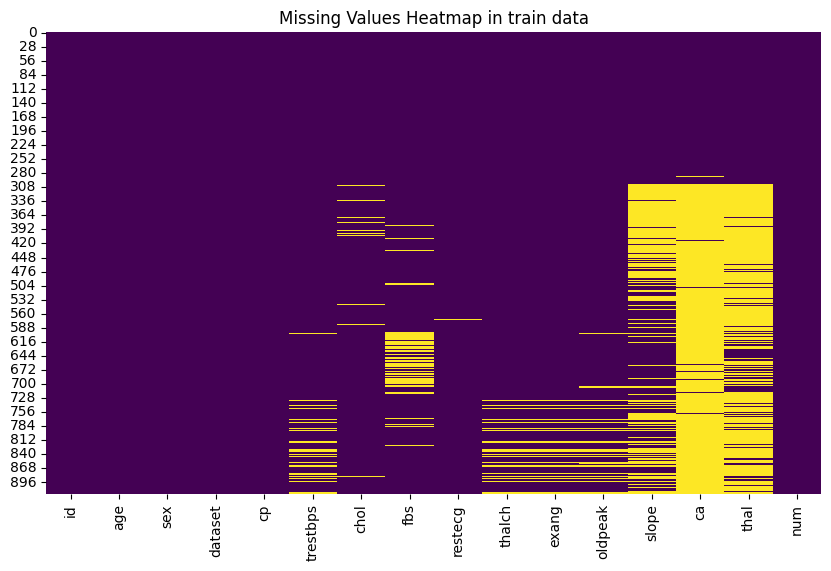

In [20]:
# Heatmap of missing values in train data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in train data')
plt.show()

In [21]:
#NaN in Numeric cols -> filled with mean value
#NaN in Categorical cols -> filled with mode value
data[train_numeric_cols] = data[train_numeric_cols].fillna(data[train_numeric_cols].mean())
data.dropna(subset=['fbs', 'exang'], inplace=True) #it will result in a smaller dataset of 775
for col in train_categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## EDA ( Exploratory Data Analysis)

### General column exploration

In [106]:
#AGE COLUMN BY SEX( MALE OR FEMALE)

print(f"The younger patient is: {data['age'].min()}")
print(f"The oldest patient is: {data['age'].max()}")
males = data[data['sex'] == 'Male']
females = data[data['sex'] == 'Female']

print("Males Stats:")
print('Mean age:', males['age'].mean())
print('Median age:', males['age'].median())
print('Mode age:', males['age'].mode()[0])
print("Females Stats:")
print('Mean age:', females['age'].mean())
print('Median age:', females['age'].median())
print('Mode age:', females['age'].mode()[0])

The younger patient is: 28
The oldest patient is: 77
Males Stats:
Mean age: 53.294612794612796
Median age: 54.0
Mode age: 54
Females Stats:
Mean age: 52.348066298342545
Median age: 53.0
Mode age: 54


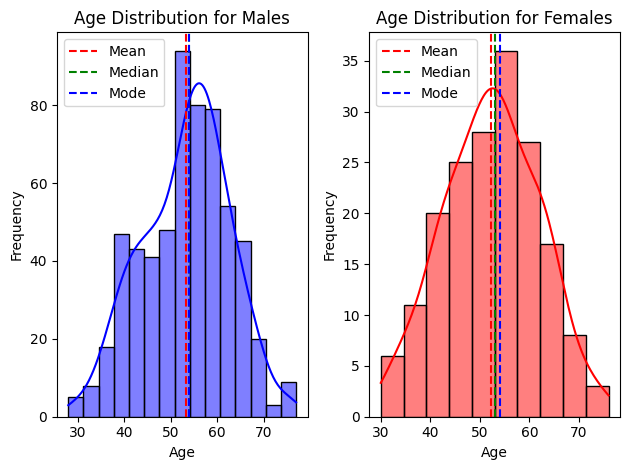

In [108]:
#Age Distribution histograms for males and females
plt.subplot(1, 2, 1)
sns.histplot(males['age'], kde=True, color='blue')
plt.title('Age Distribution for Males')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(males['age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(males['age'].median(), color='green', linestyle='--', label='Median')
plt.axvline(males['age'].mode()[0], color='blue', linestyle='--', label='Mode')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(females['age'], kde=True, color='red')
plt.title('Age Distribution for Females')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(females['age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(females['age'].median(), color='green', linestyle='--', label='Median')
plt.axvline(females['age'].mode()[0], color='blue', linestyle='--', label='Mode')
plt.legend()

plt.tight_layout()
plt.show()

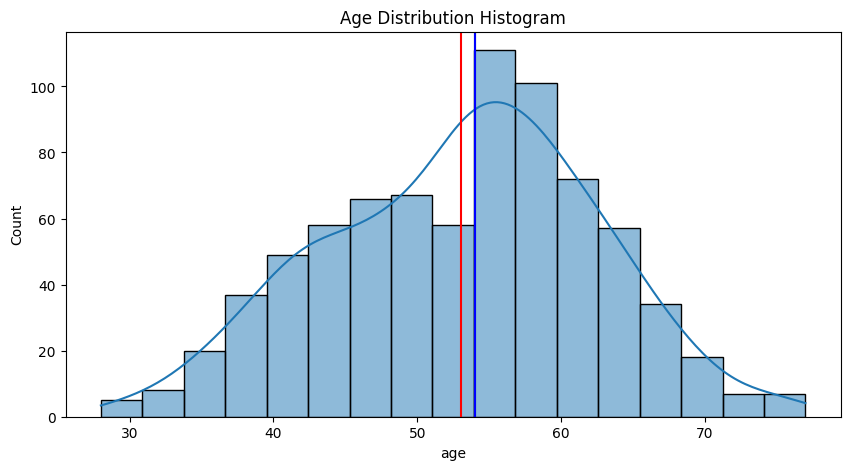

In [109]:
# Age Distribution Histogram
plt.figure(figsize = (10, 5)) 
plt.title('Age Distribution Histogram')
sns.histplot(data['age'], kde=True)
plt.axvline(data['age'].mean(), color='red')
plt.axvline(data['age'].median(), color='green')
plt.axvline(data['age'].mode()[0], color='blue')
plt.show()

In [42]:
data['sex'].value_counts() #EACH GENDER

sex
Male      594
Female    181
Name: count, dtype: int64

In [43]:
data.groupby('sex')['dataset'].value_counts() #GENDER PER DATASET

sex     dataset      
Female  Cleveland         97
        Hungary           76
        VA Long Beach      5
        Switzerland        3
Male    Hungary          208
        Cleveland        207
        VA Long Beach    135
        Switzerland       44
Name: count, dtype: int64

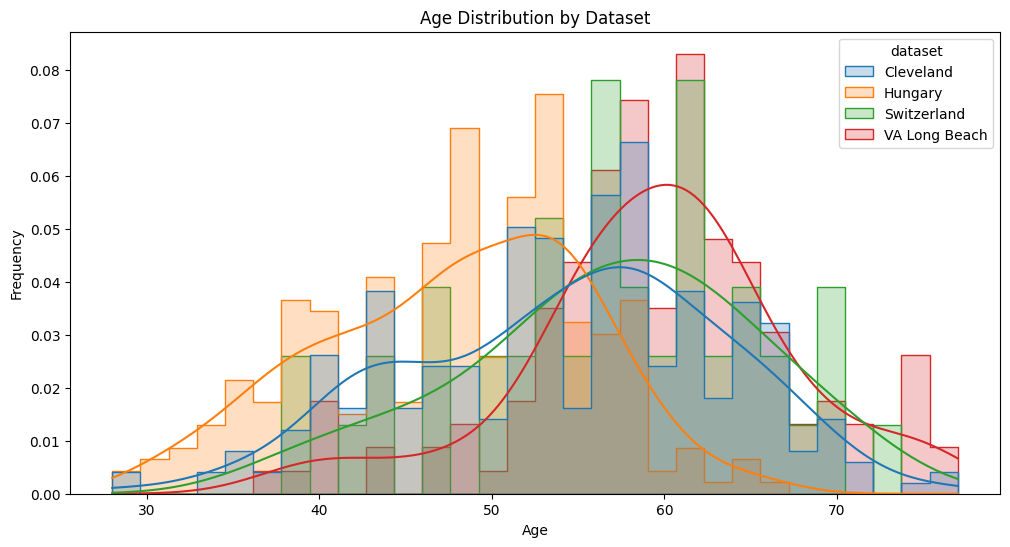

In [110]:
# Age distribution histogram for 4 datasets
plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='age', hue='dataset', element='step', stat='density', common_norm=False, bins=30, kde=True)
plt.title('Age Distribution by Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [111]:
data['cp'].value_counts() #cp (chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]))

cp
asymptomatic       405
non-anginal        170
atypical angina    161
typical angina      39
Name: count, dtype: int64

In [61]:
data['cp'].describe()

count              775
unique               4
top       asymptomatic
freq               405
Name: cp, dtype: object

In [112]:
data['trestbps'].describe() #( resting blood pressure)

count    775.000000
mean     132.792771
std       18.566765
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Mean: 132.7927705968304
Median: 130.0
Mode: 120.0


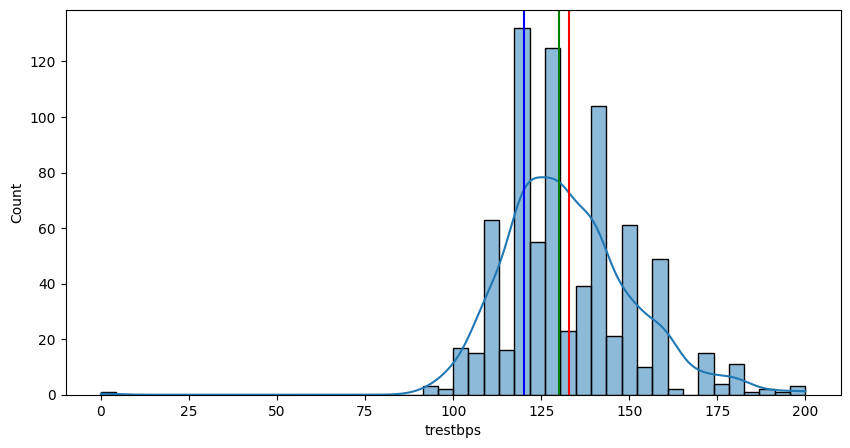

In [64]:
#Distribution of trestbps
plt.figure(figsize=(10, 5))

sns.histplot(data, x = data['trestbps'], kde = True)
plt.axvline(data['trestbps'].mean(), color='red')
plt.axvline(data['trestbps'].median(), color='green')
plt.axvline(data['trestbps'].mode()[0], color='blue')

print('Mean:', data['trestbps'].mean())
print('Median:', data['trestbps'].median())
print('Mode:', data['trestbps'].mode()[0])

In [65]:
data['chol'].describe() #serum cholesterol 

count    775.000000
mean     218.567121
std       92.645412
min        0.000000
25%      198.000000
50%      228.000000
75%      269.000000
max      603.000000
Name: chol, dtype: float64

Mean: 218.56712142080465
Median: 228.0
Mode: 0.0


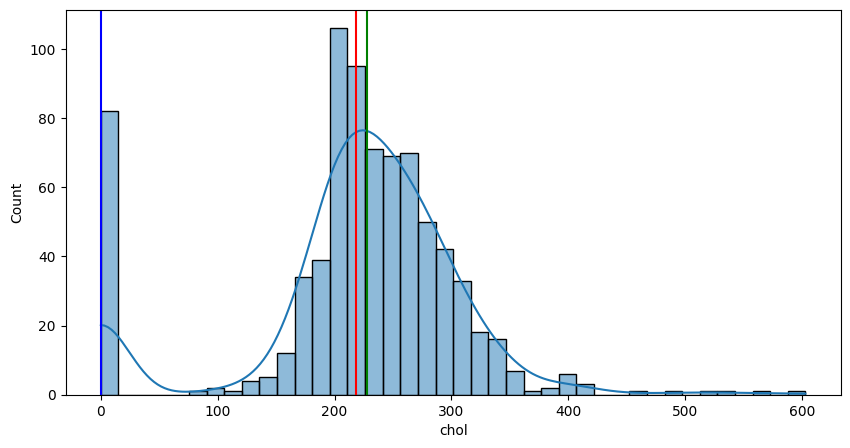

In [66]:
#Distribution of chol
plt.figure(figsize=(10, 5))

sns.histplot(data, x = 'chol', kde = True)
plt.axvline(data['chol'].mean(), color='red')
plt.axvline(data['chol'].median(), color='green')
plt.axvline(data['chol'].mode()[0], color='blue')

print('Mean:', data['chol'].mean())
print('Median:', data['chol'].median())
print('Mode:', data['chol'].mode()[0])

In [68]:
# fasting blood pressure
data['fbs'].value_counts()

fbs
False    658
True     117
Name: count, dtype: int64

In [69]:
data.groupby('fbs')['sex'].value_counts() #fbs by gender

fbs    sex   
False  Male      496
       Female    162
True   Male       98
       Female     19
Name: count, dtype: int64

In [70]:
data['restecg'].value_counts() #restecg types

restecg
normal              470
lv hypertrophy      177
st-t abnormality    128
Name: count, dtype: int64

In [71]:
data.groupby('restecg')['sex'].value_counts() #restecg by gender

restecg           sex   
lv hypertrophy    Male      130
                  Female     47
normal            Male      360
                  Female    110
st-t abnormality  Male      104
                  Female     24
Name: count, dtype: int64

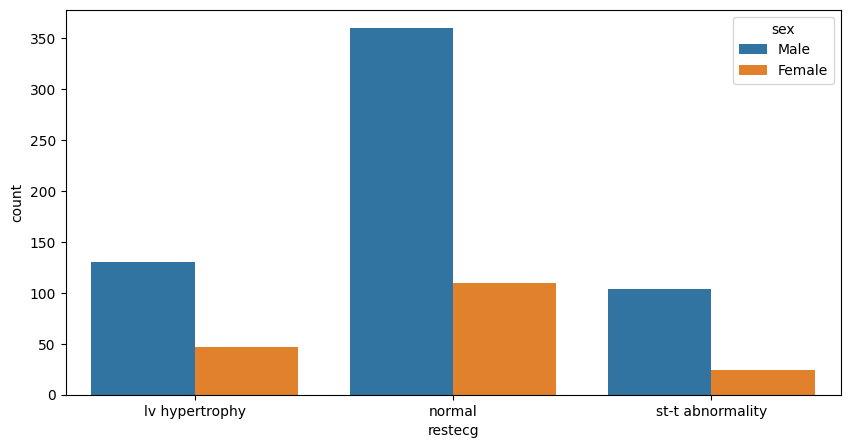

In [73]:
plt.figure(figsize=(10, 5))
#restecg by gender           
sns.countplot(data, x = data['restecg'], hue='sex')
plt.show()

In [74]:
data['thalch'].describe() # thalch: maximum heart rate achieved

count    775.000000
mean     138.673548
std       25.792313
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: thalch, dtype: float64

Median: 140.0
Mean: 138.6735483870968
Mode: 150.0


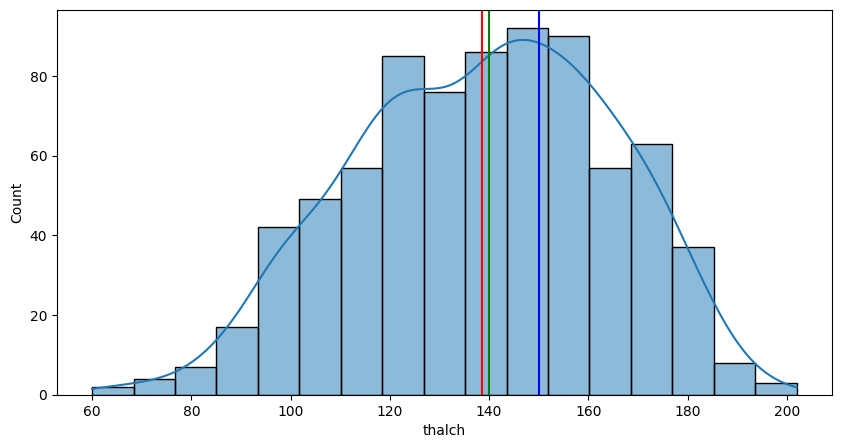

In [75]:
plt.figure(figsize=(10, 5))
#thalach: maximum heart rate achieved HISTOGRAM
sns.histplot(data, x = data['thalch'], kde = True)
plt.axvline(data['thalch'].mean(), color='red')
plt.axvline(data['thalch'].median(), color='green')
plt.axvline(data['thalch'].mode()[0], color='blue')
print('Median:', data['thalch'].median())
print('Mean:', data['thalch'].mean())
print('Mode:', data['thalch'].mode()[0])

In [76]:
data['exang'].value_counts() # exang: exercise-induced angina (True/ False)

exang
False    470
True     305
Name: count, dtype: int64

In [78]:
data.groupby(data['exang'])[['sex']].value_counts() #exang by gender

exang  sex   
False  Male      330
       Female    140
True   Male      264
       Female     41
Name: count, dtype: int64

In [79]:
data['oldpeak'].describe() #oldpeak: ST depression induced by exercise relative to rest

count    775.000000
mean       0.886213
std        1.081304
min       -1.000000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

Median: 0.5
Mean: 0.8862130987292277
Mode: 0.0


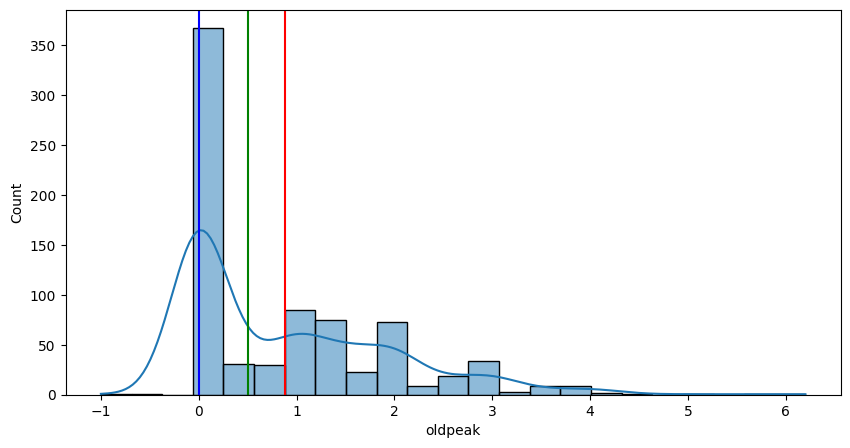

In [81]:
plt.figure(figsize=(10, 5))
#oldpeak histogram showing mean mode and median
sns.histplot(data['oldpeak'], kde=True)
plt.axvline(data['oldpeak'].mean(), color='red')
plt.axvline(data['oldpeak'].median(), color='green')
plt.axvline(data['oldpeak'].mode()[0], color='blue')

print('Median:', data['oldpeak'].median())
print('Mean:', data['oldpeak'].mean())
print('Mode:', data['oldpeak'].mode()[0])

In [84]:
data['slope'].value_counts() #slope: the slope of the peak exercise ST segment

slope
flat           550
upsloping      175
downsloping     50
Name: count, dtype: int64

In [88]:
data.groupby(data['slope'])['exang'].value_counts() #slope with exang

slope        exang
downsloping  True      33
             False     17
flat         False    319
             True     231
upsloping    False    134
             True      41
Name: count, dtype: int64

In [90]:
data.groupby(data['slope'])['restecg'].value_counts() #slope with restecg

slope        restecg         
downsloping  normal               23
             lv hypertrophy       17
             st-t abnormality     10
flat         normal              349
             st-t abnormality    104
             lv hypertrophy       97
upsloping    normal               98
             lv hypertrophy       63
             st-t abnormality     14
Name: count, dtype: int64

In [91]:
data['ca'].value_counts() #ca: number of major vessels (0-3) colored by fluoroscopy

ca
0.0    652
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [92]:
data['thal'].value_counts() # thal: [normal; fixed defect; reversible defect]

thal
normal               559
reversable defect    176
fixed defect          40
Name: count, dtype: int64

In [93]:
data['num'].value_counts() #num: the predicted attribute

num
0    377
1    212
2     81
3     81
4     24
Name: count, dtype: int64

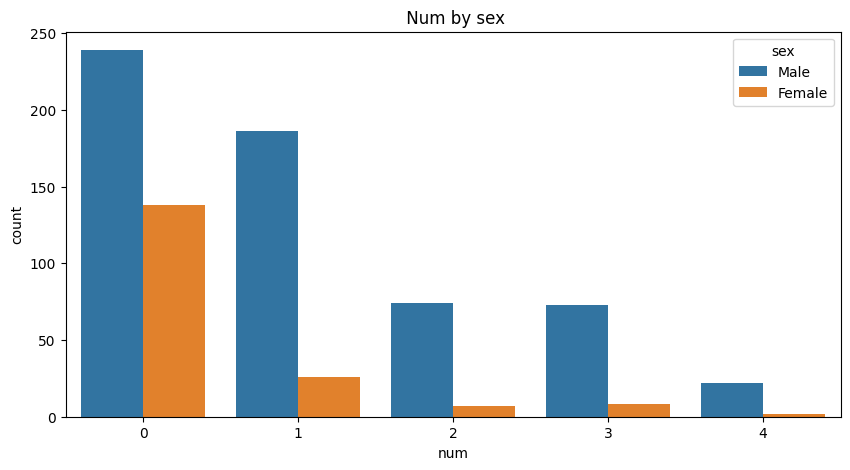

In [113]:
plt.figure(figsize=(10, 5))
plt.title(" Num by sex")
sns.countplot(data, x = data['num'], hue = 'sex')
plt.show() #num by sex

In [97]:
data.groupby(data['num'])[['sex']].value_counts() #num by sex also shown on above plot

num  sex   
0    Male      239
     Female    138
1    Male      186
     Female     26
2    Male       74
     Female      7
3    Male       73
     Female      8
4    Male       22
     Female      2
Name: count, dtype: int64

In [98]:
data.groupby(data['num'])[['dataset']].value_counts() #num in each dataset

num  dataset      
0    Hungary          180
     Cleveland        165
     VA Long Beach     31
     Switzerland        1
1    Hungary          104
     Cleveland         55
     VA Long Beach     41
     Switzerland       12
2    Cleveland         36
     VA Long Beach     31
     Switzerland       14
3    Cleveland         35
     VA Long Beach     29
     Switzerland       17
4    Cleveland         13
     VA Long Beach      8
     Switzerland        3
Name: count, dtype: int64

In [99]:
data.groupby(data['num'])[['thal']].value_counts() #num with thal

num  thal             
0    normal               329
     reversable defect     37
     fixed defect          11
1    normal               144
     reversable defect     57
     fixed defect          11
2    normal                38
     reversable defect     32
     fixed defect          11
3    reversable defect     39
     normal                38
     fixed defect           4
4    reversable defect     11
     normal                10
     fixed defect           3
Name: count, dtype: int64

### Univariate Analysis

####  Numerical Columns

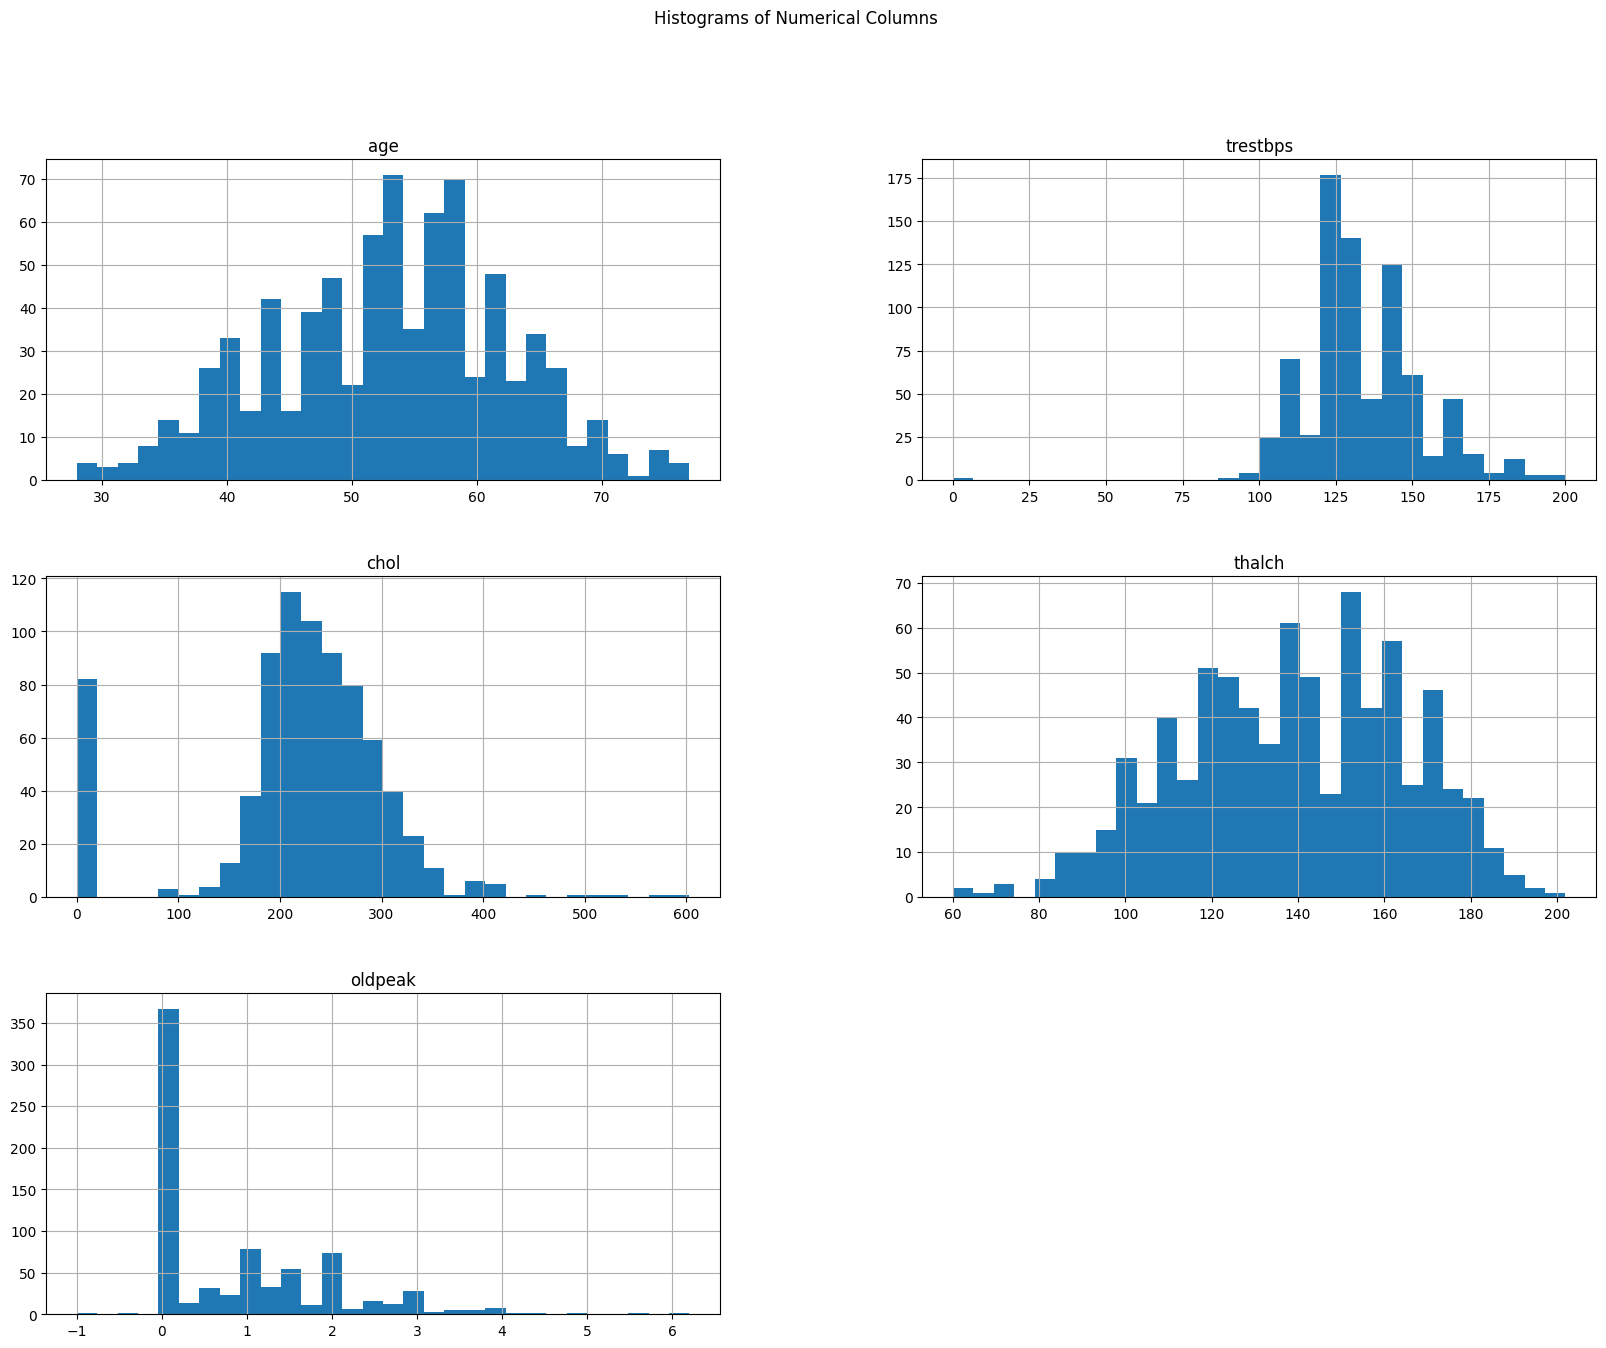

In [22]:
# Univariate analysis is a statistical method that 
#involves the analysis of a single variable
# HISTOGRAMS OF NUMERICAL VARIABLES/COLUMNS
data[train_numeric_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

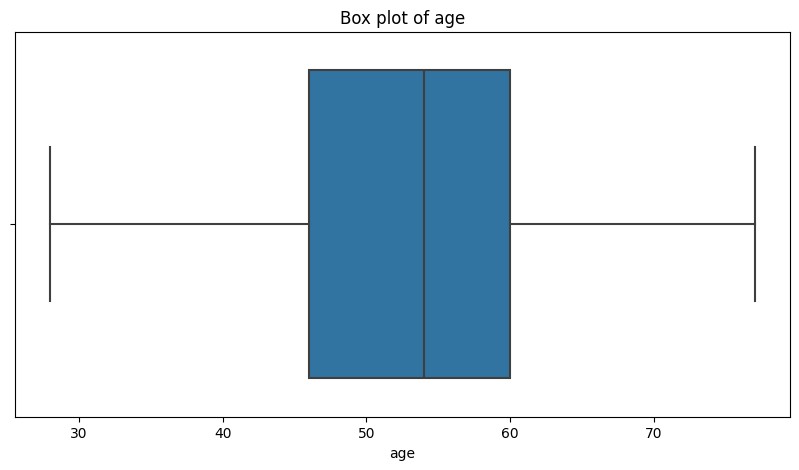

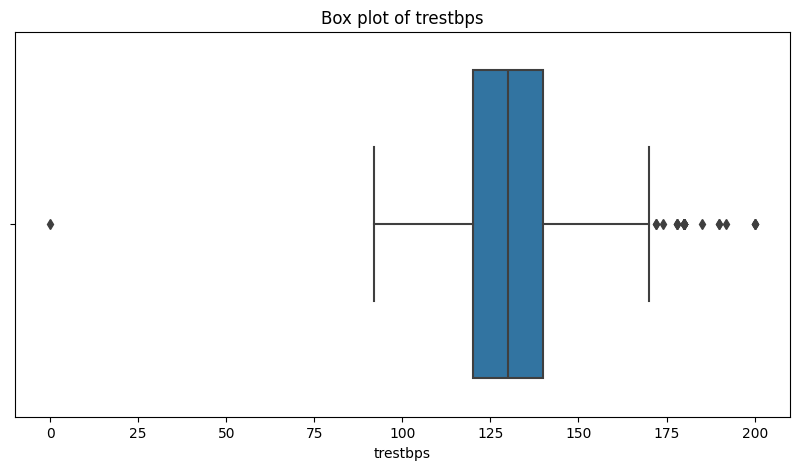

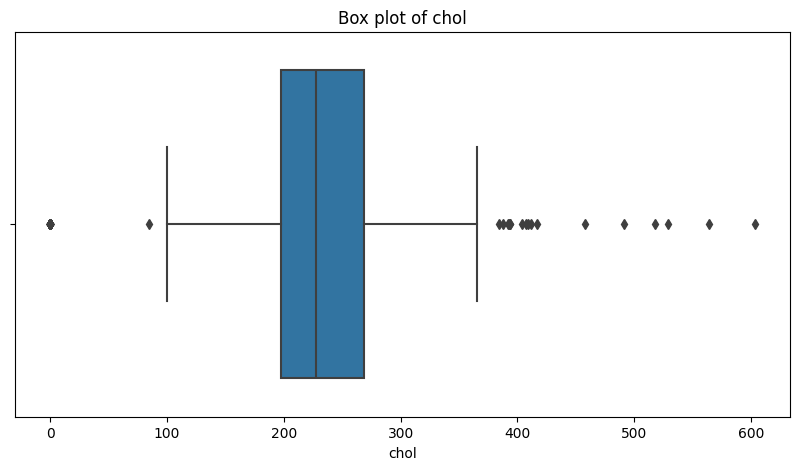

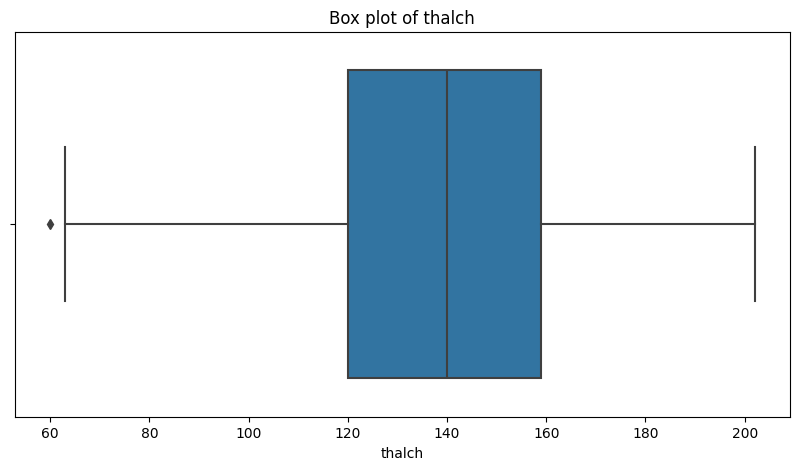

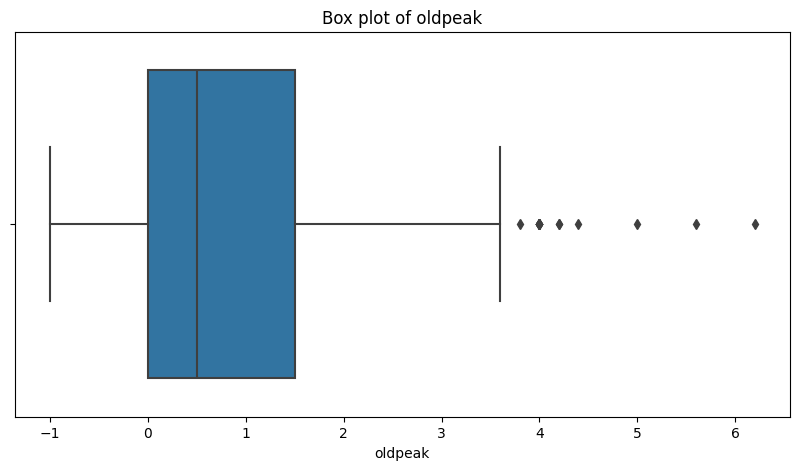

In [23]:
# BOX PLOTS OF NUMERICAL VARIABLES/COLUMNS - outliers are visible
for col in train_numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

#### Categorical Columns

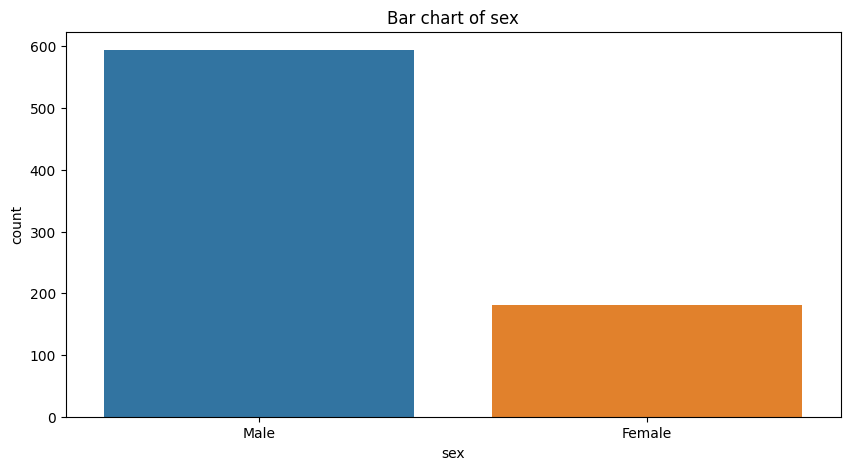

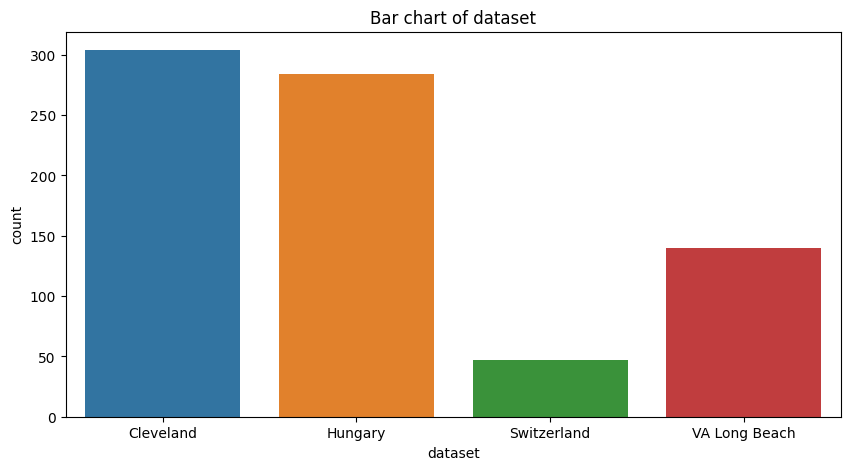

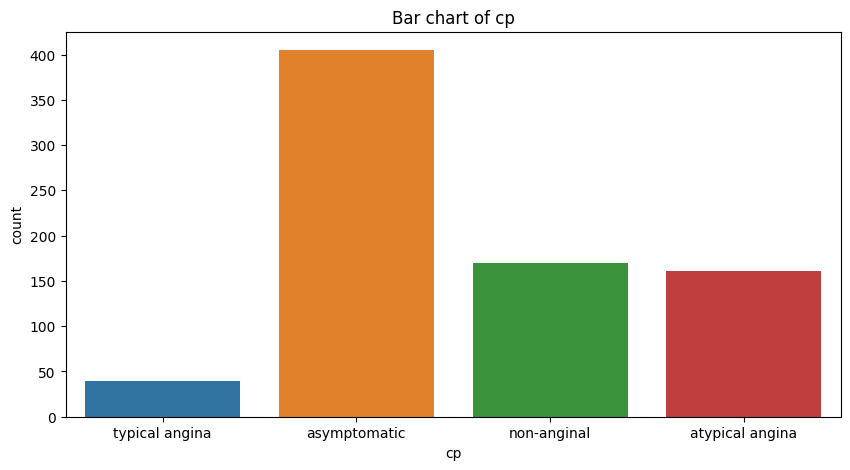

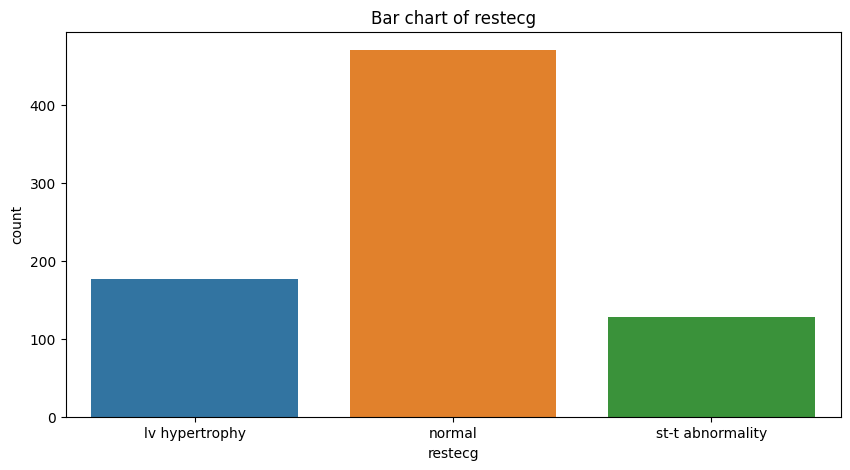

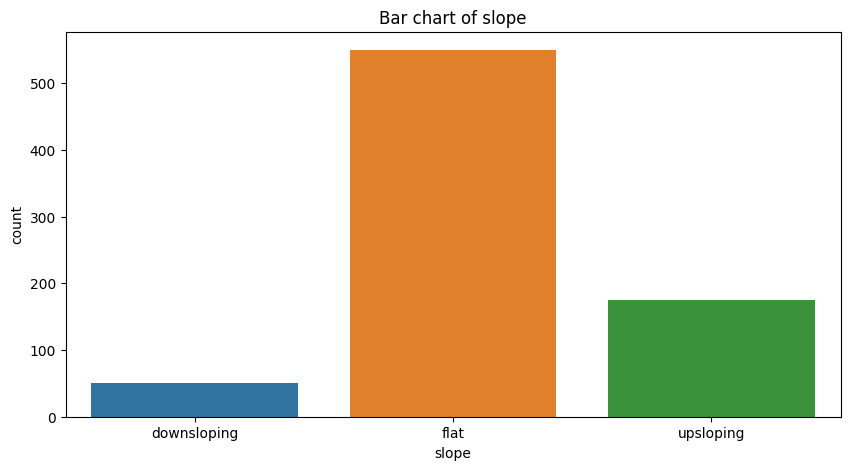

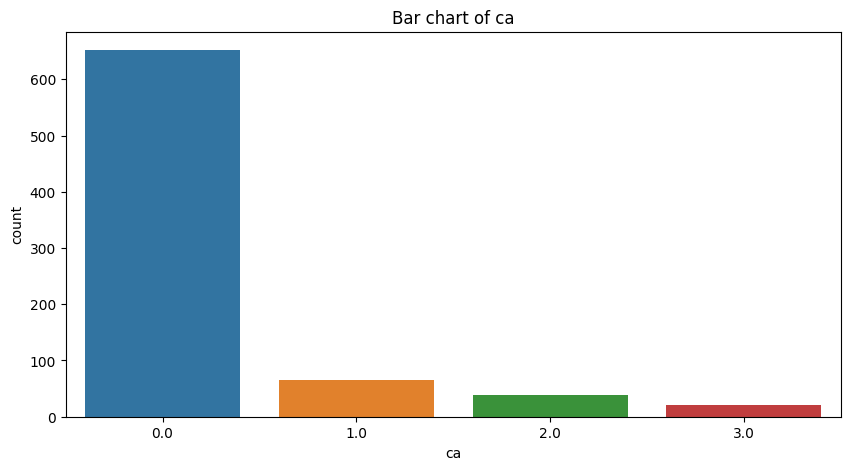

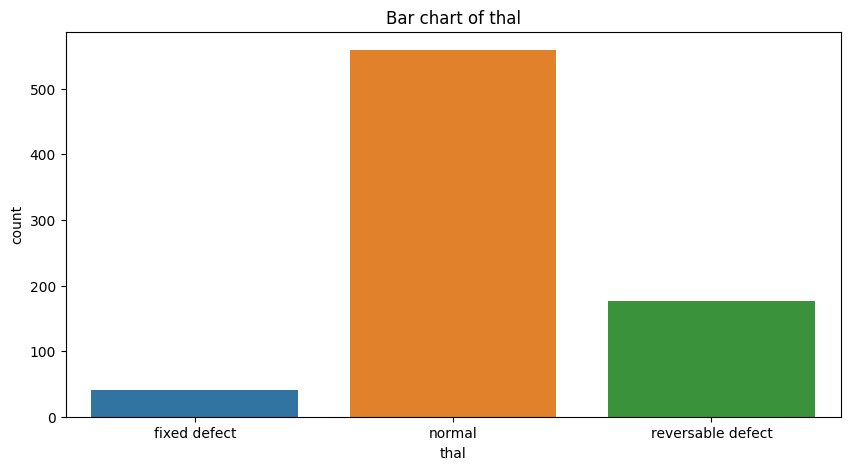

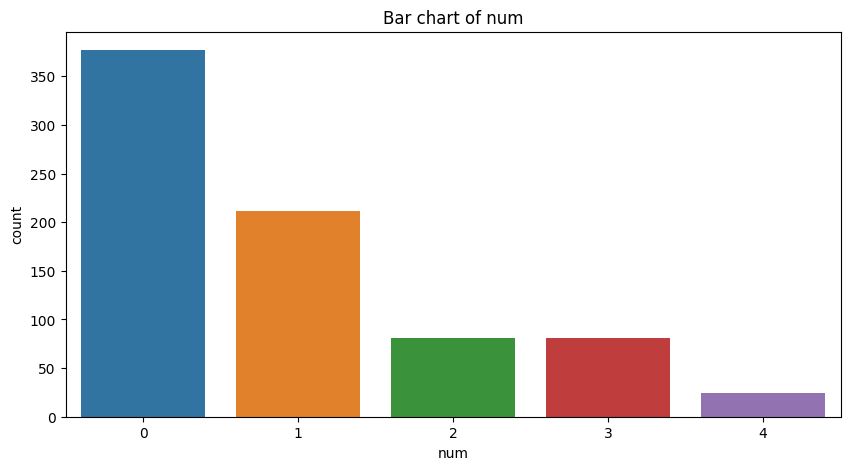

In [24]:
# bar charts of categorical VARIABLES/COLUMNS
for col in train_categorical_cols:
    if col != 'id':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=data[col])
        plt.title(f'Bar chart of {col}')
        plt.show()


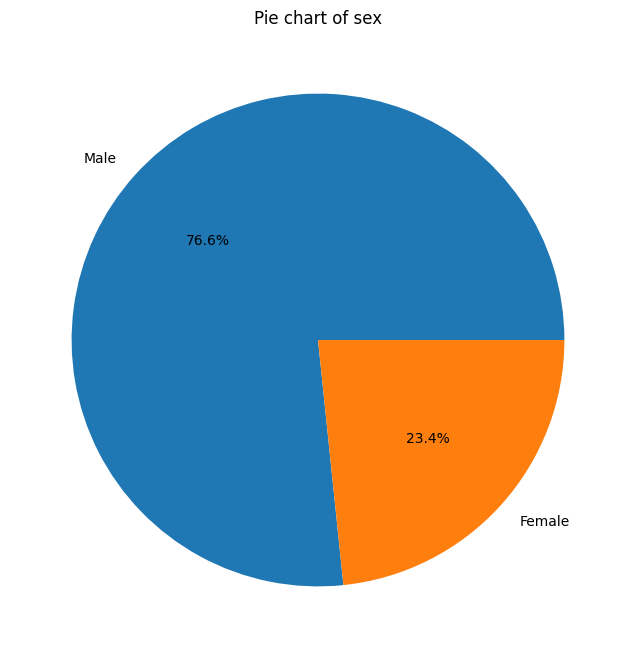

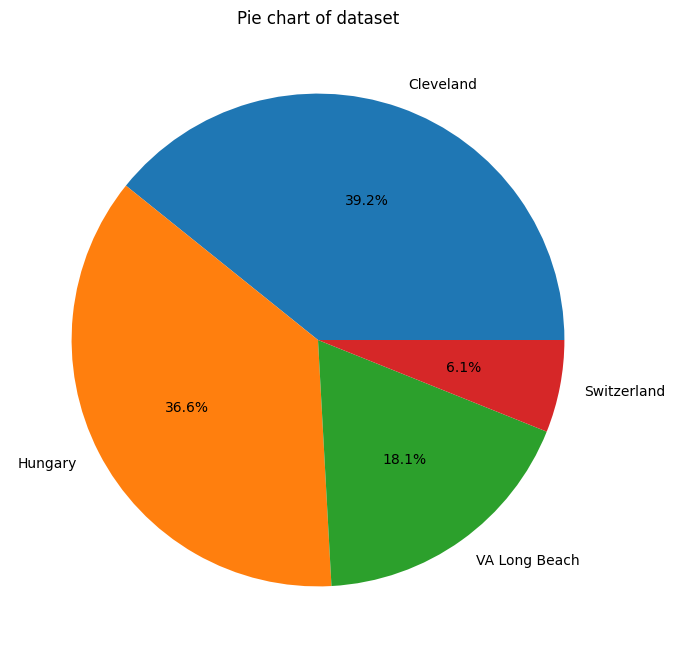

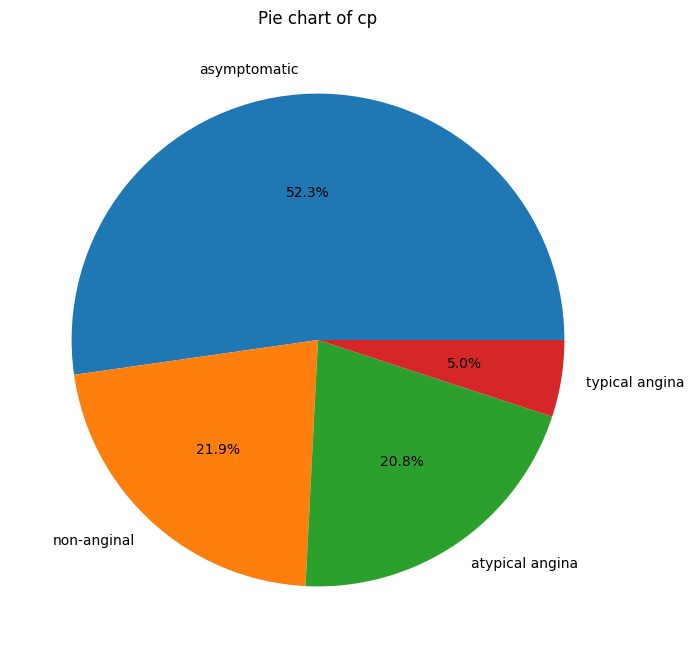

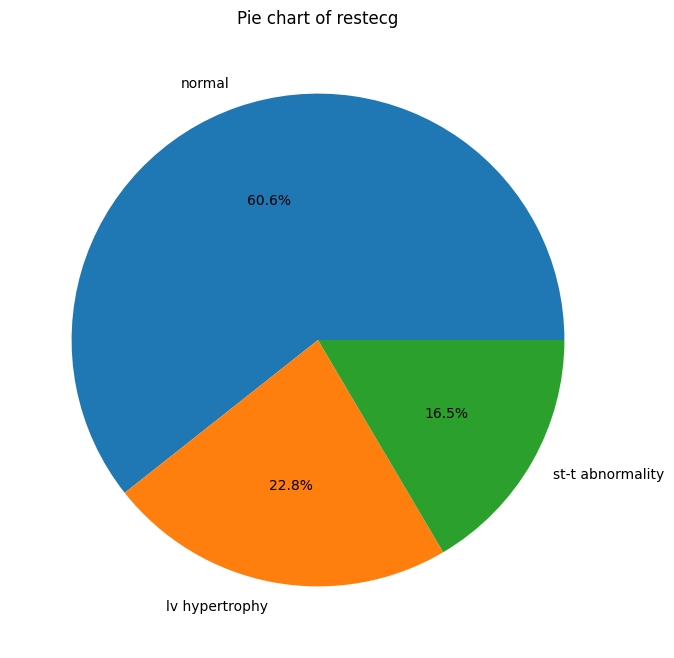

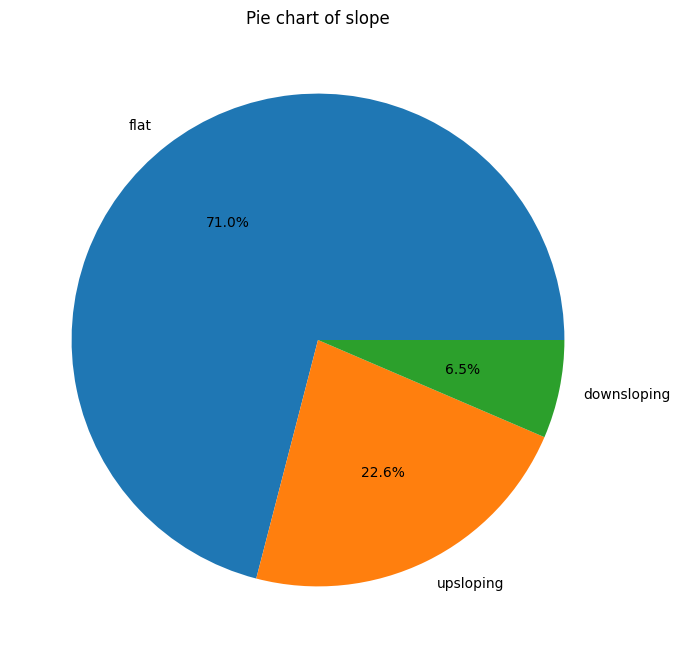

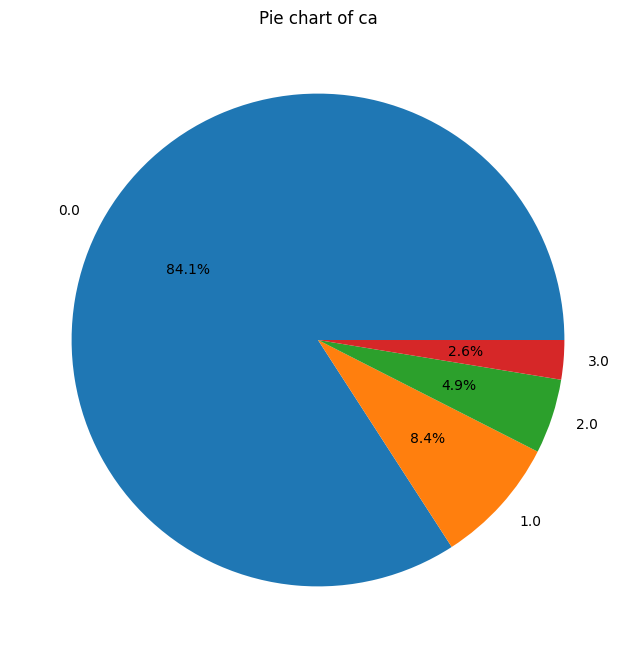

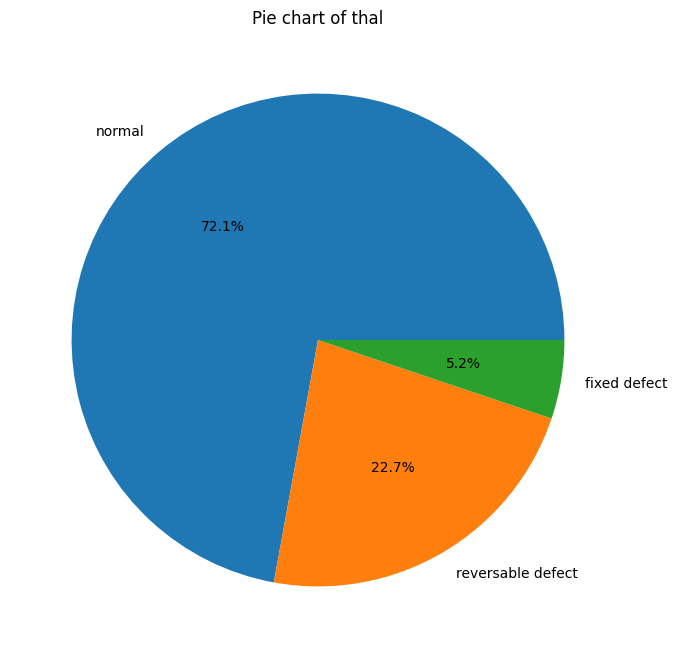

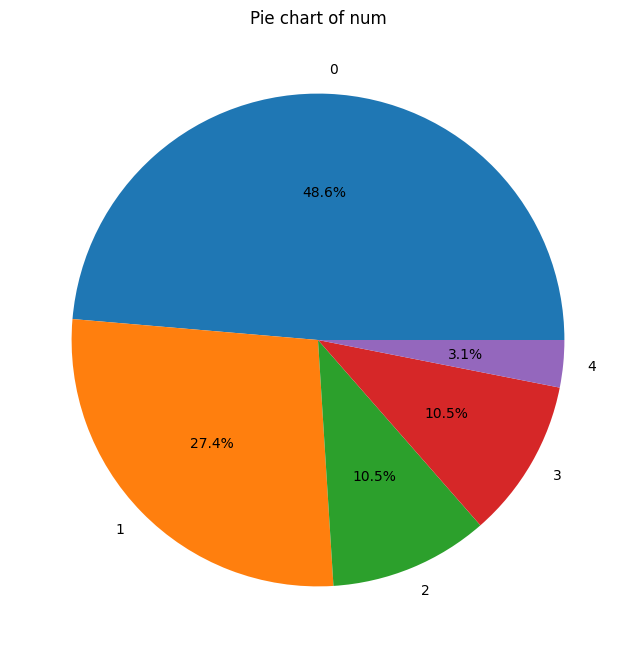

In [25]:
# pie charts of categorical VARIABLES/COLUMNS
for col in train_categorical_cols:
    if col != 'id':
        plt.figure(figsize=(8, 8))
        data[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f'Pie chart of {col}')
        plt.ylabel('')
        plt.show()


### Bivariate analysis

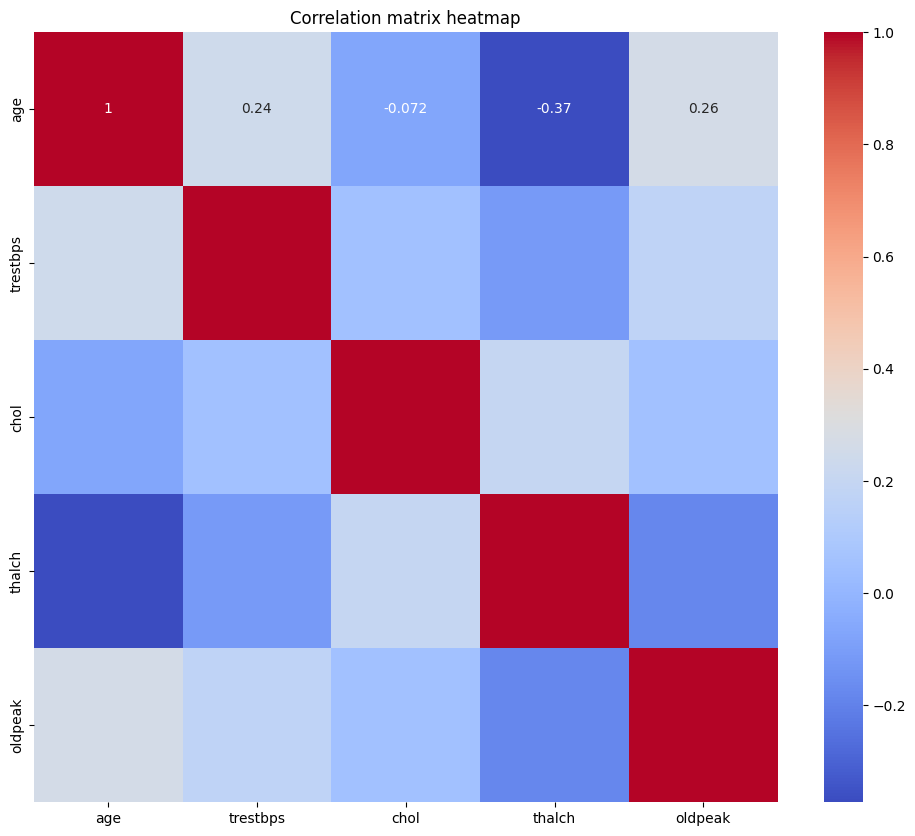

In [26]:
# Bivariate analysis-> analysis of two variables
# Correlation matrix heatma of numerical values
corr_matrix = data[train_numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()


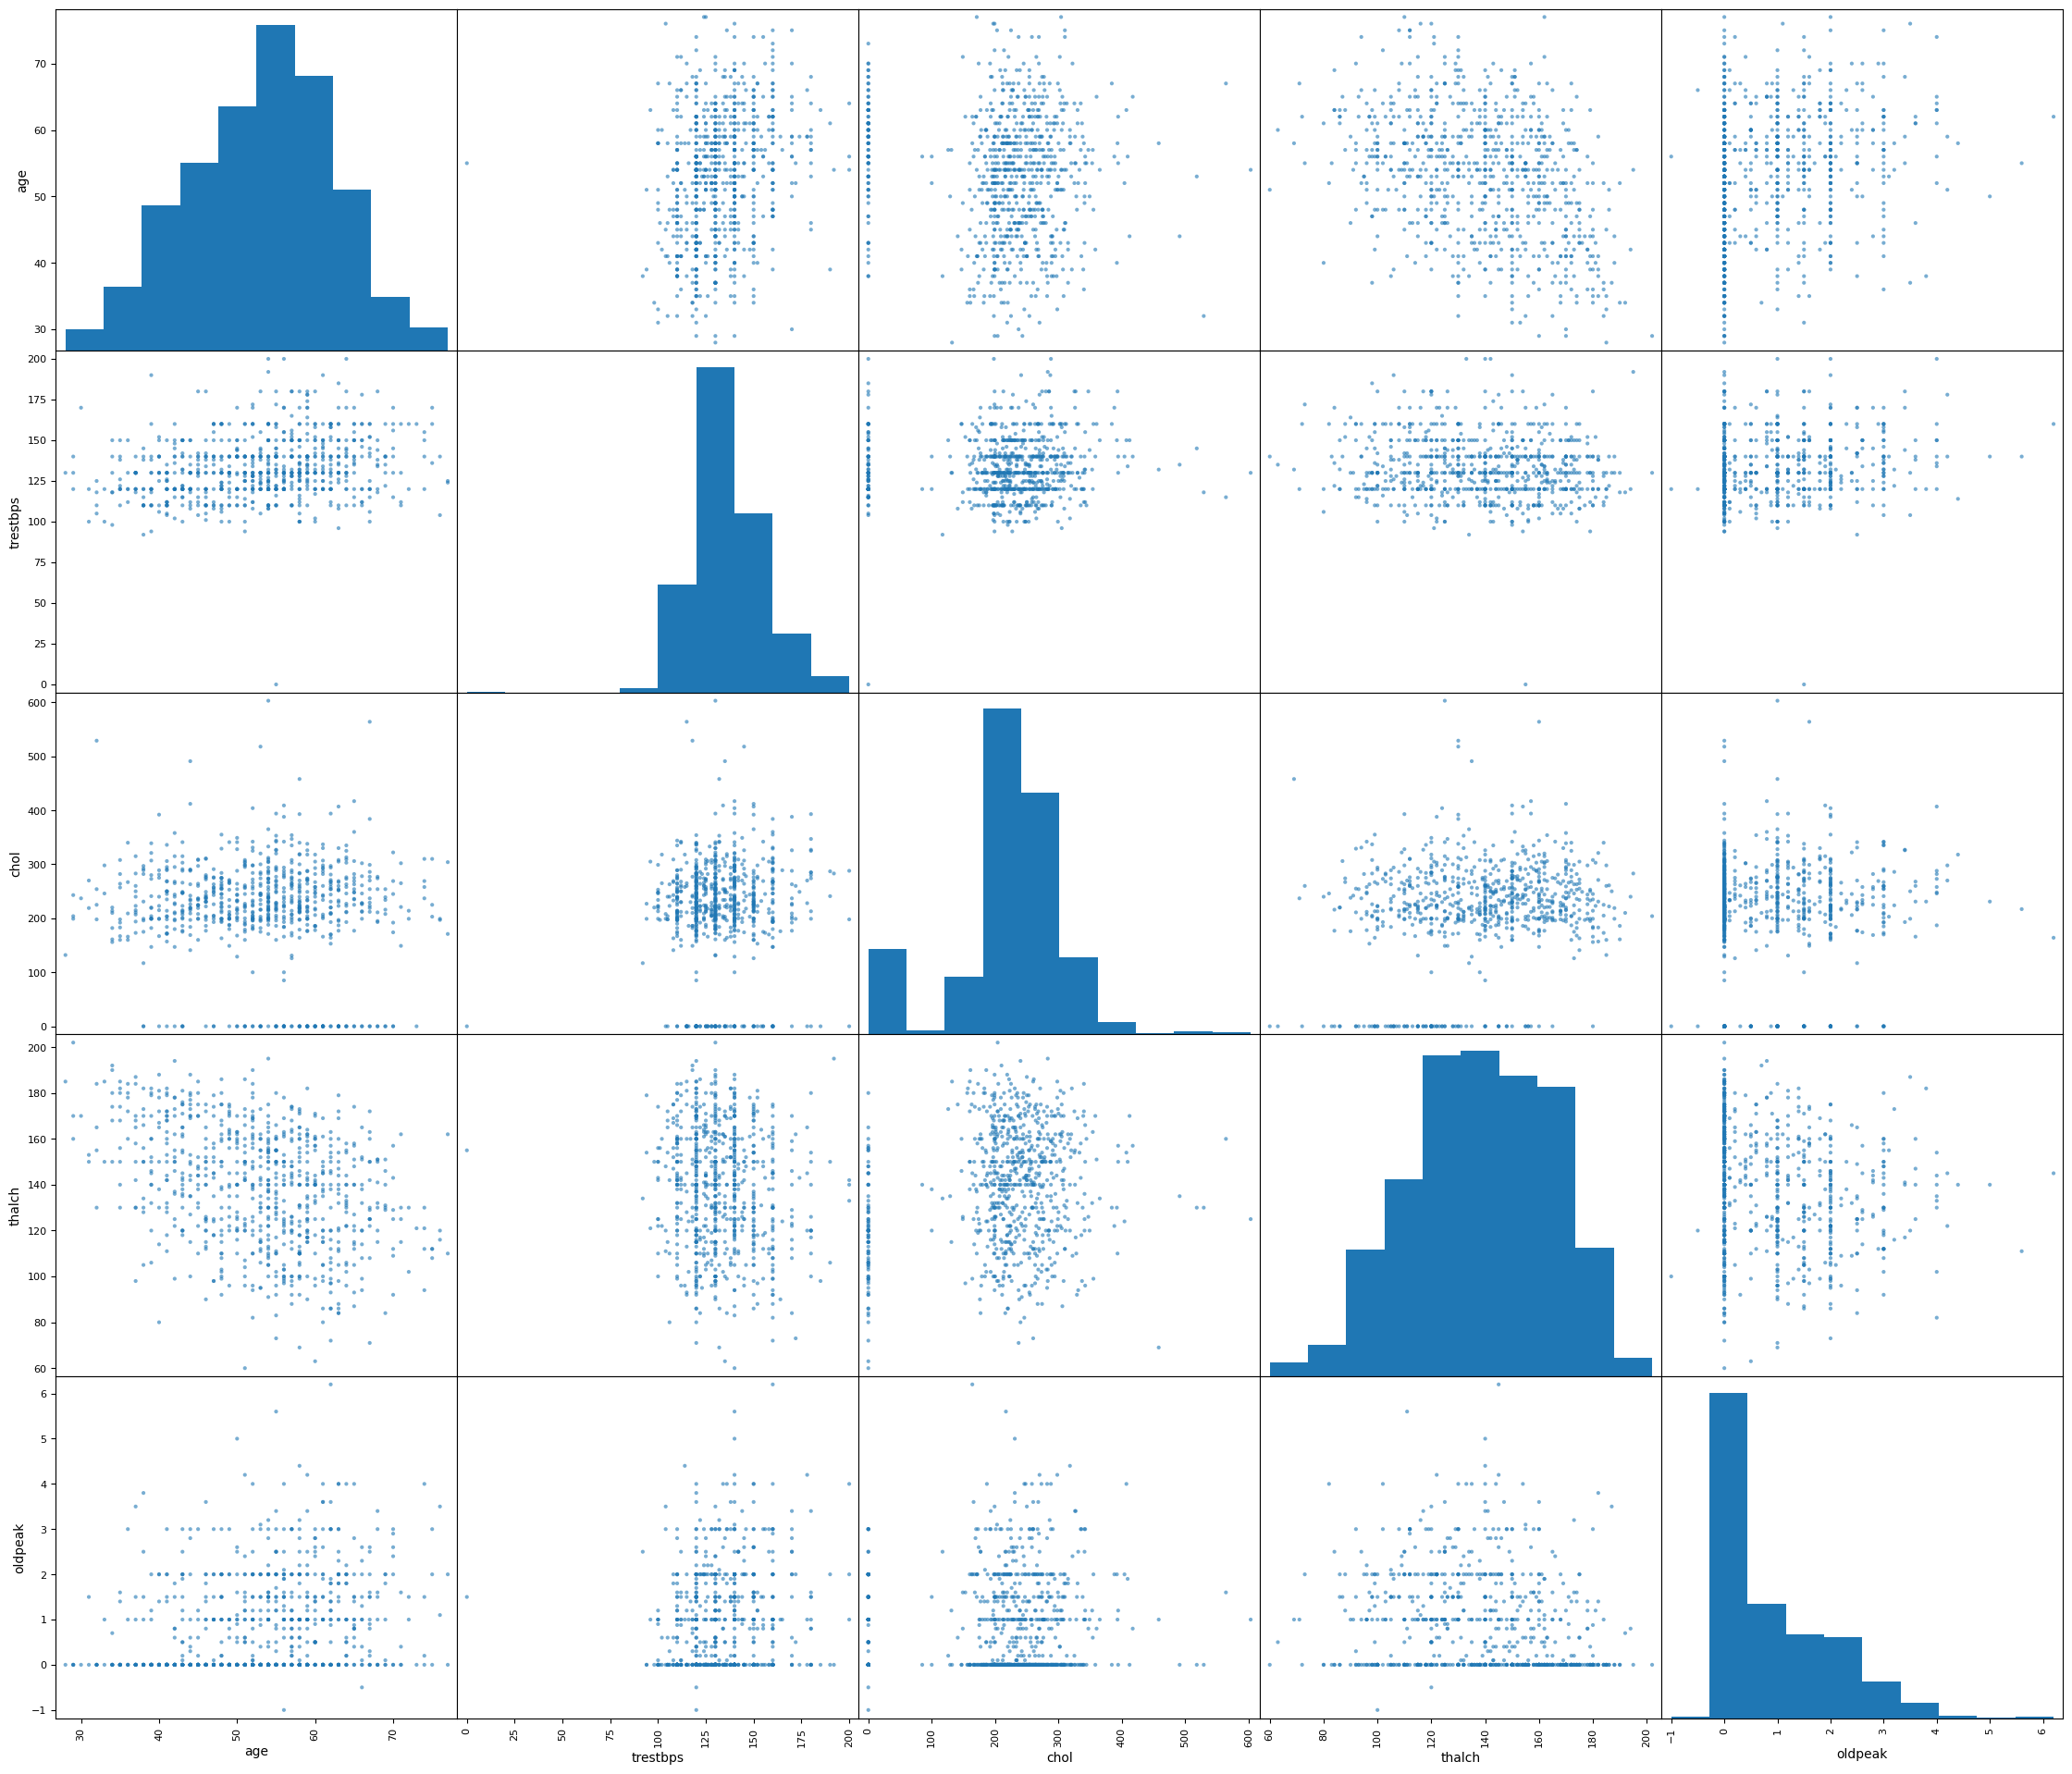

In [27]:
# Scatter plots of numeric values
scatter_matrix(data[train_numeric_cols], figsize=(28, 24)  ,alpha = 0.6)
plt.show()

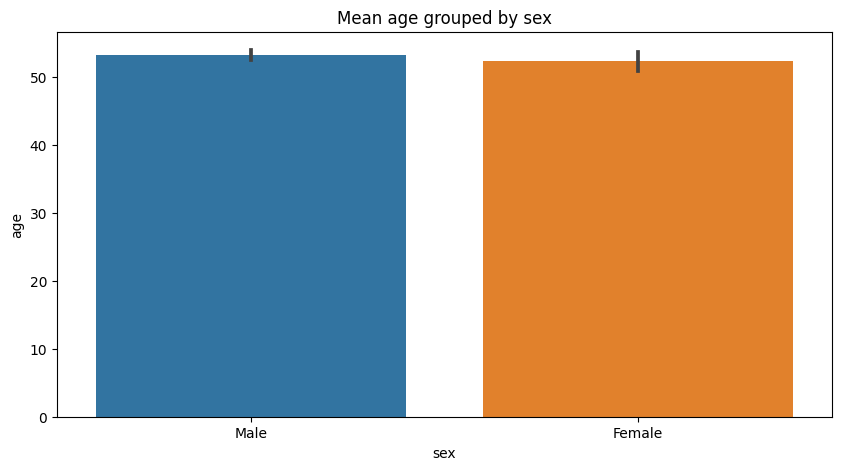

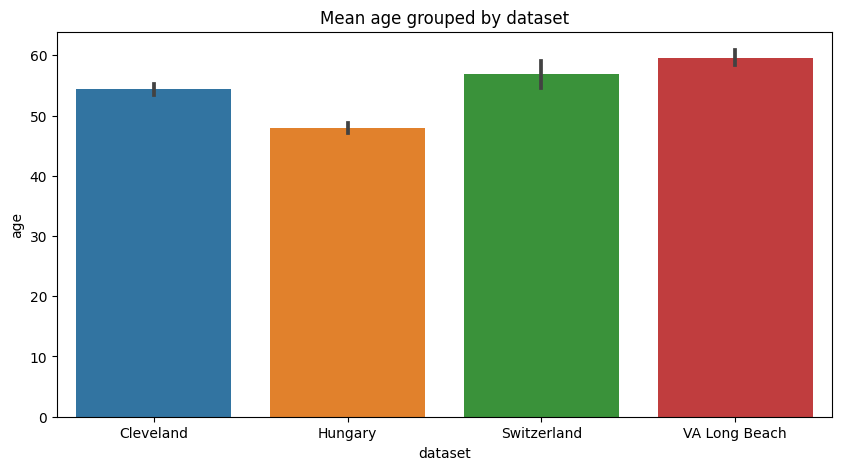

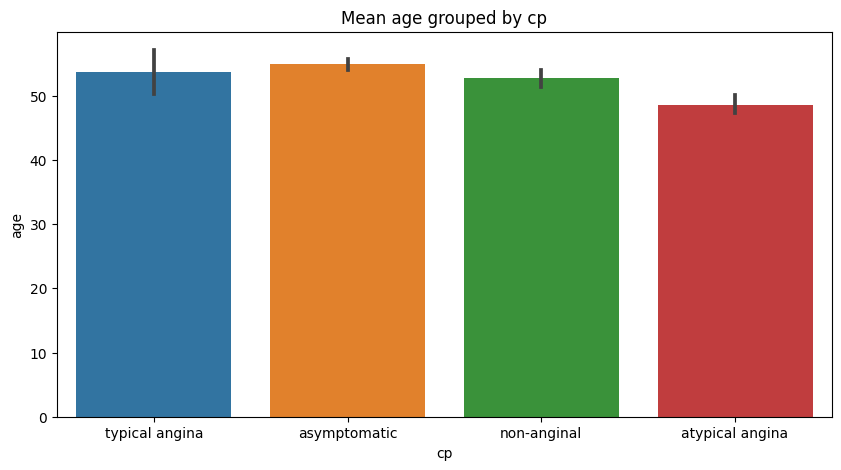

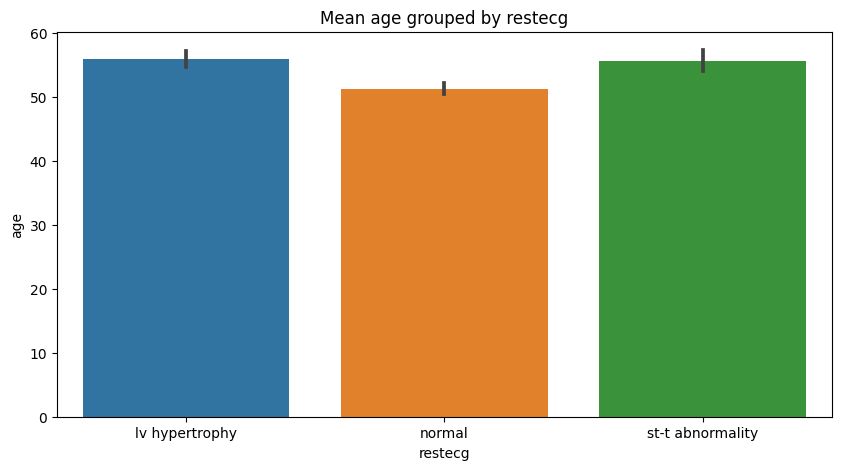

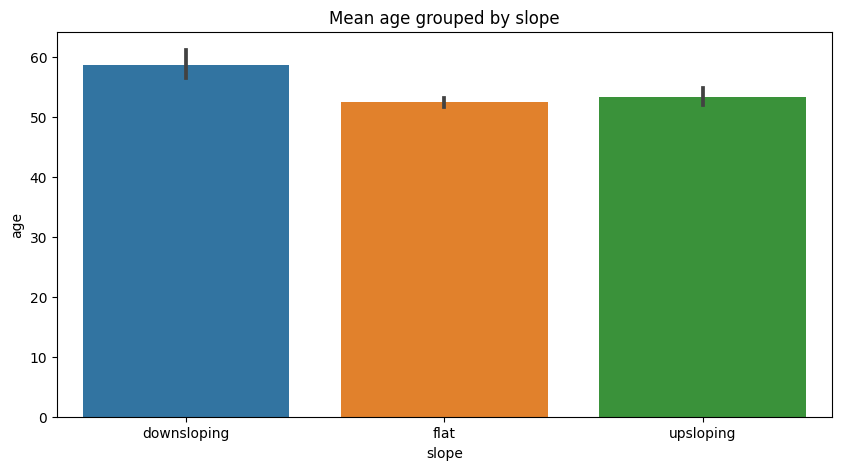

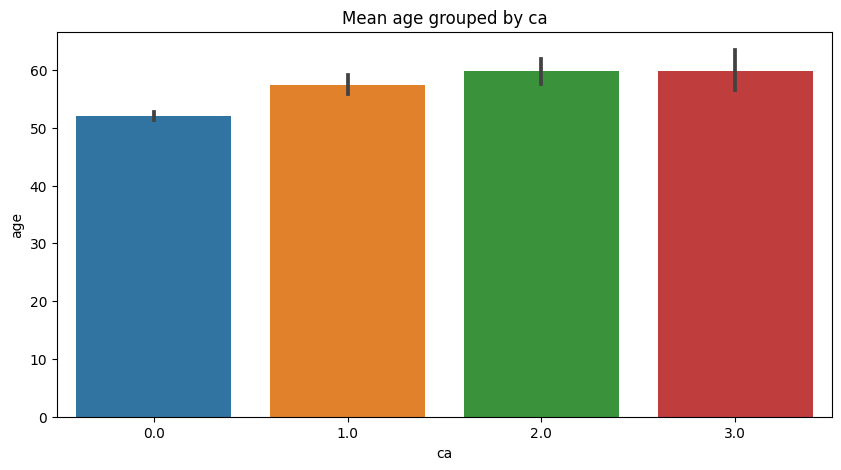

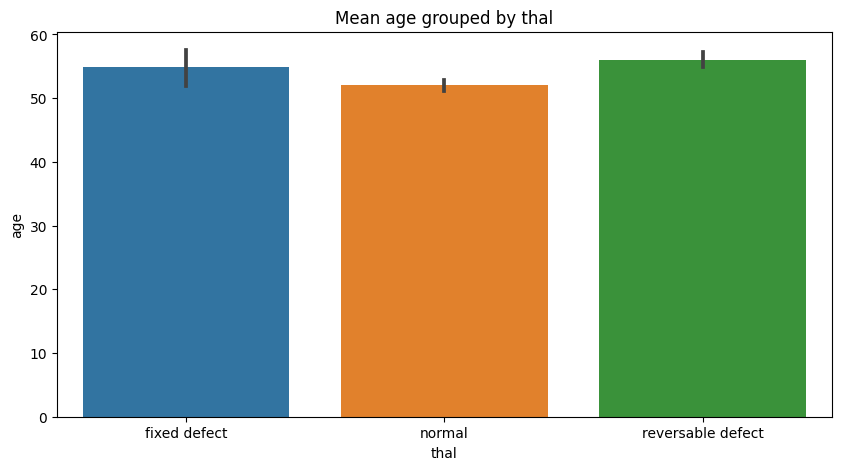

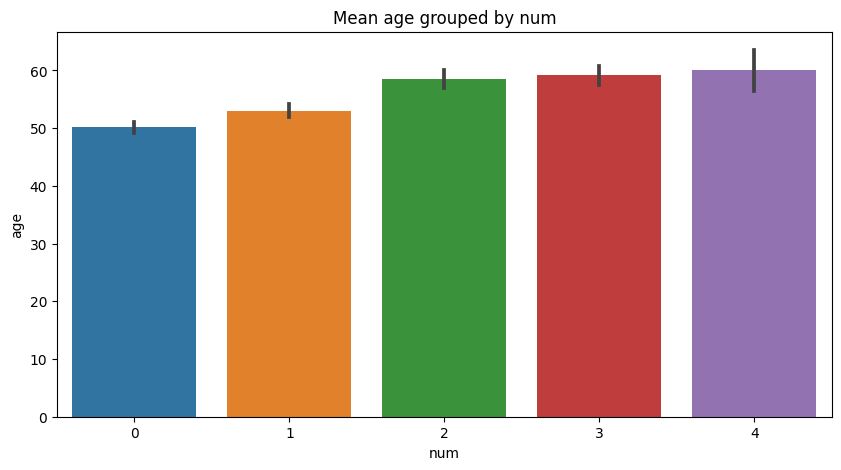

In [28]:
# Barplot showing the mean age by each categorical column
for col in train_categorical_cols:
    if col != 'id':
        plt.figure(figsize=(10, 5))
        sns.barplot(x=data[col], y=data['age'], estimator=np.mean)
        plt.title(f'Mean age grouped by {col}')
        plt.show()


In [54]:
print(f"Mean of Data Set: \n{data.groupby('dataset')['age'].mean()}")
print(f"Median of Data Set: \n{data.groupby('dataset')['age'].median()}")


Mean of Data Set: 
dataset
Cleveland        54.351974
Hungary          47.915493
Switzerland      56.851064
VA Long Beach    59.492857
Name: age, dtype: float64
Median of Data Set: 
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      57.0
VA Long Beach    60.0
Name: age, dtype: float64


<Figure size 1000x500 with 0 Axes>

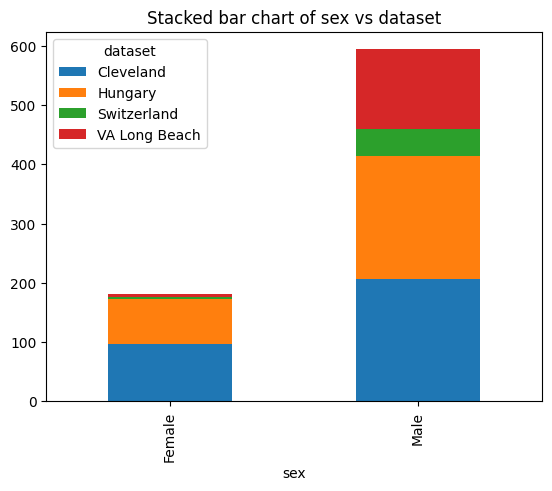

<Figure size 1000x500 with 0 Axes>

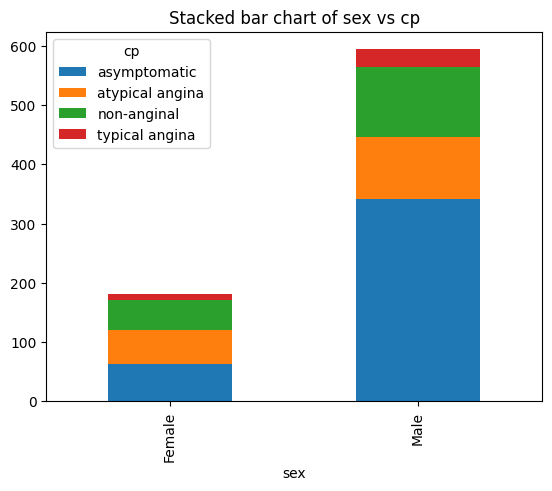

<Figure size 1000x500 with 0 Axes>

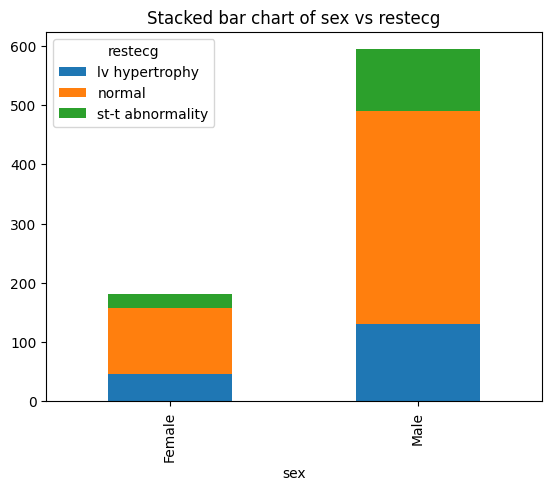

<Figure size 1000x500 with 0 Axes>

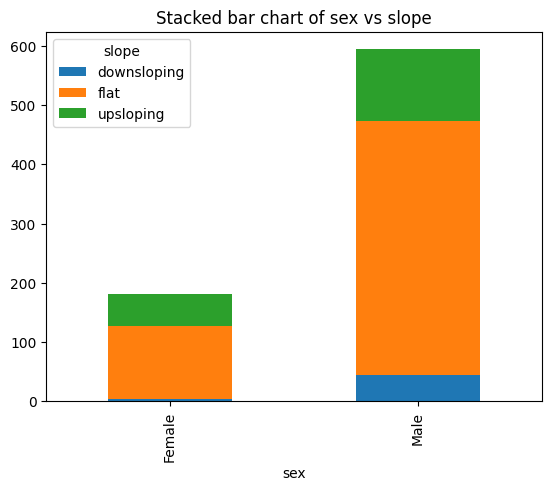

<Figure size 1000x500 with 0 Axes>

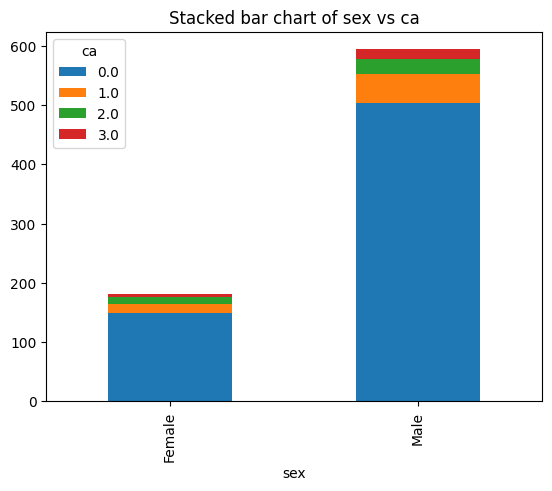

<Figure size 1000x500 with 0 Axes>

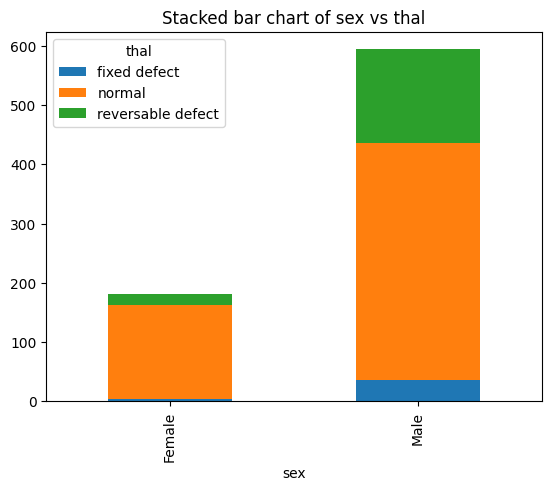

<Figure size 1000x500 with 0 Axes>

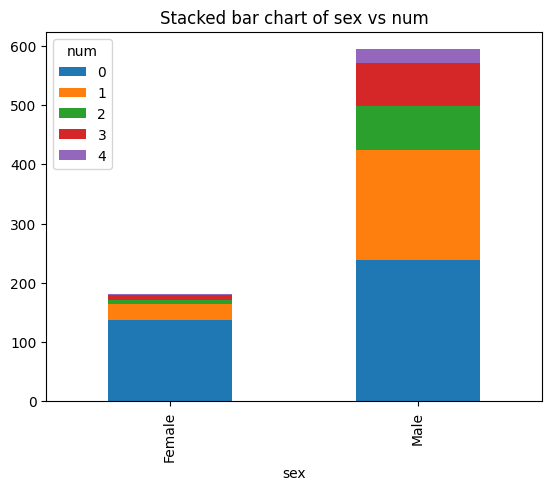

<Figure size 1000x500 with 0 Axes>

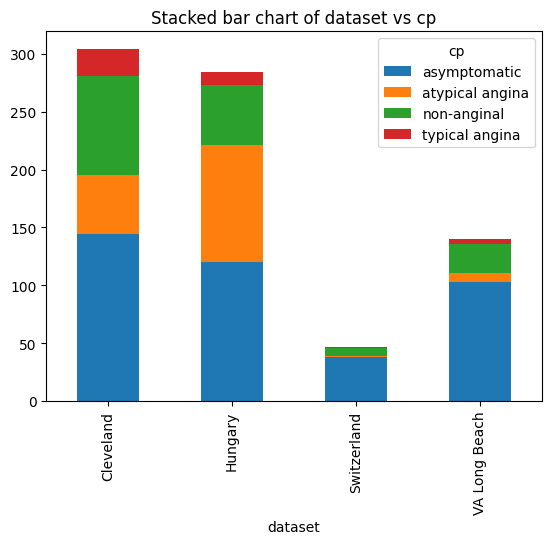

<Figure size 1000x500 with 0 Axes>

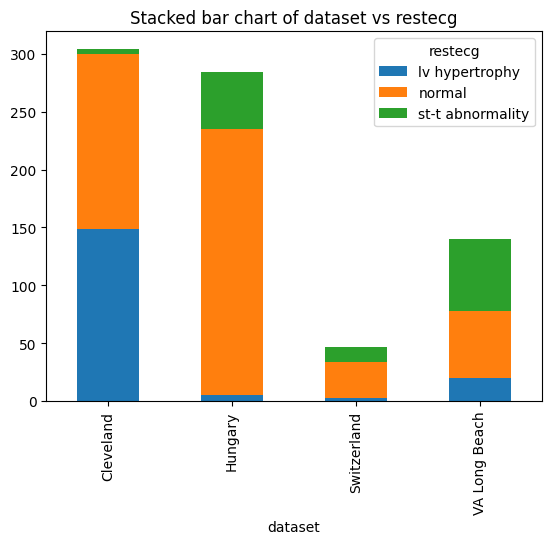

<Figure size 1000x500 with 0 Axes>

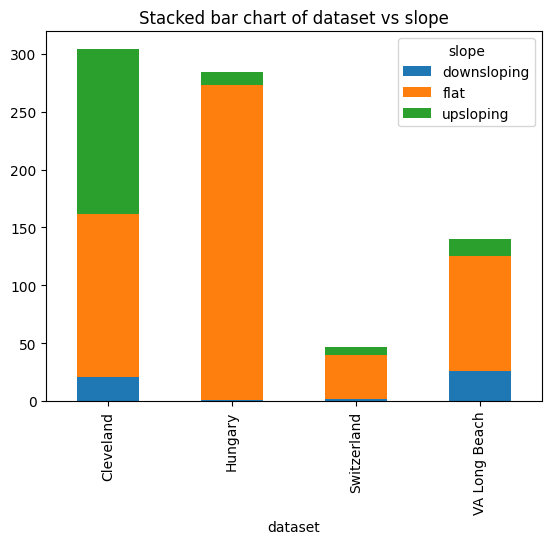

<Figure size 1000x500 with 0 Axes>

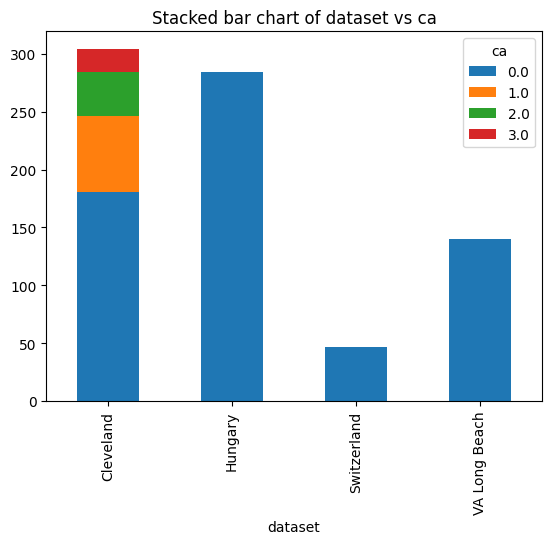

<Figure size 1000x500 with 0 Axes>

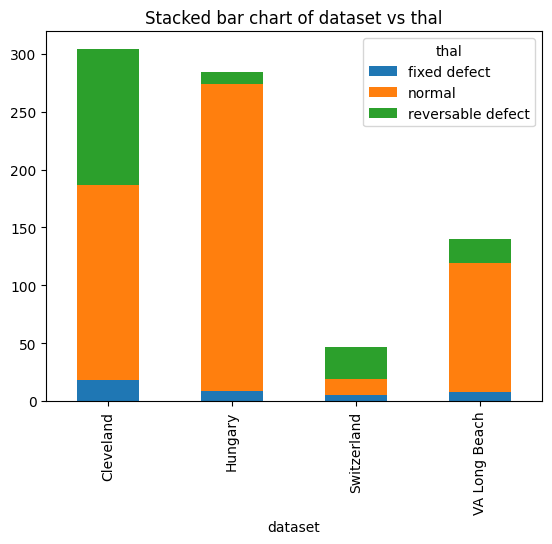

<Figure size 1000x500 with 0 Axes>

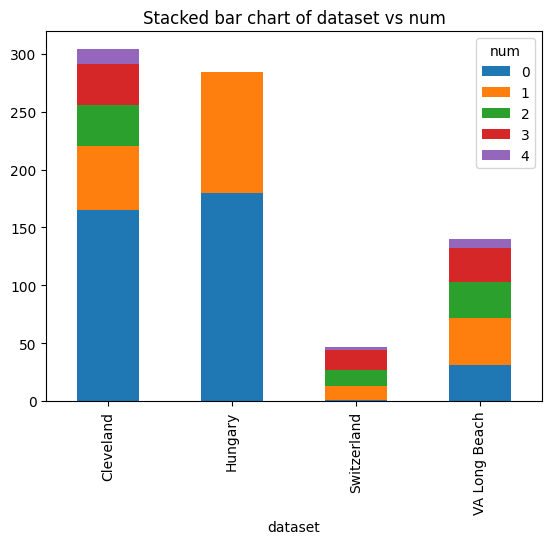

<Figure size 1000x500 with 0 Axes>

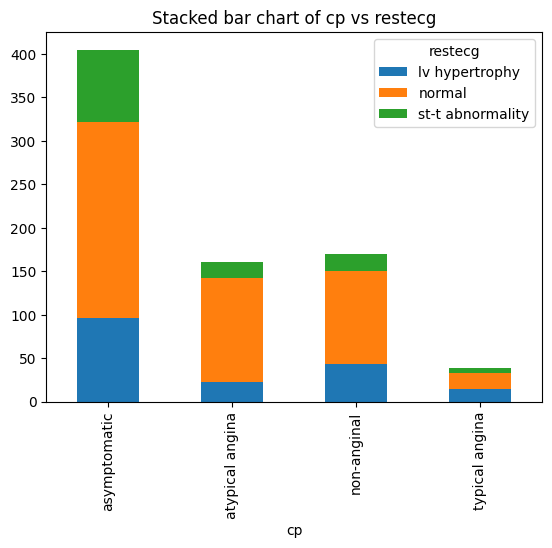

<Figure size 1000x500 with 0 Axes>

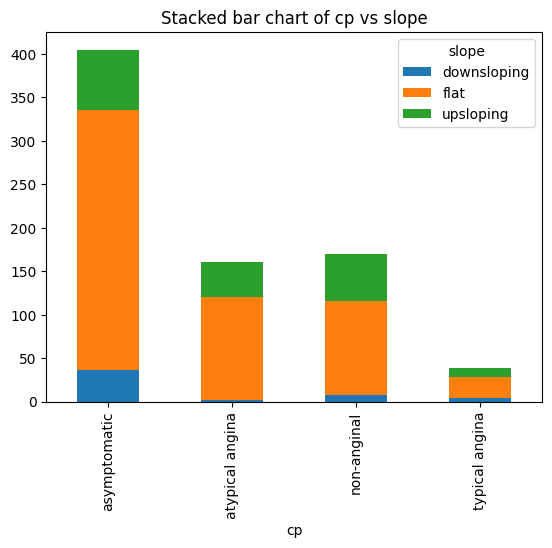

<Figure size 1000x500 with 0 Axes>

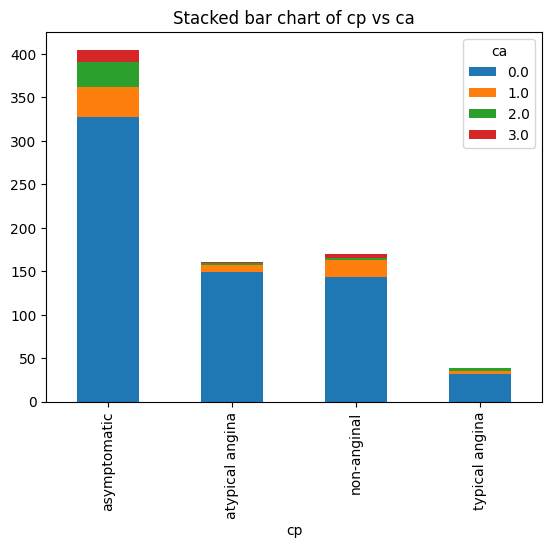

<Figure size 1000x500 with 0 Axes>

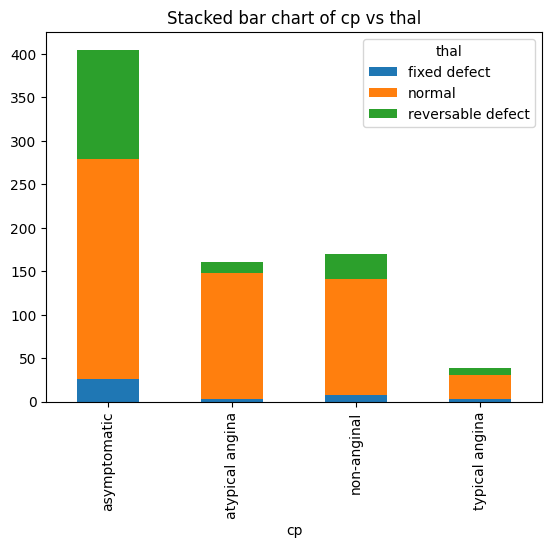

<Figure size 1000x500 with 0 Axes>

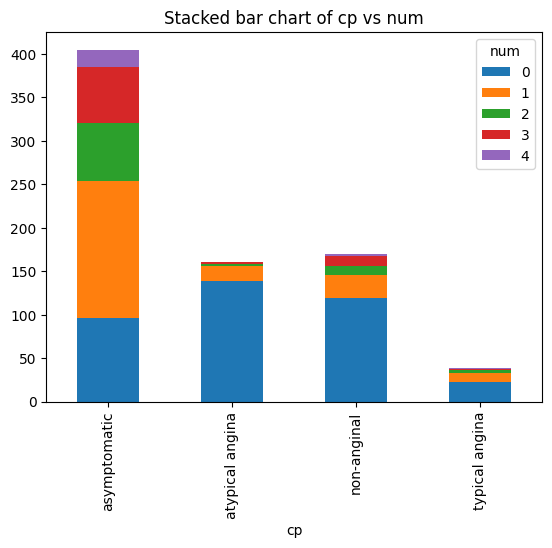

<Figure size 1000x500 with 0 Axes>

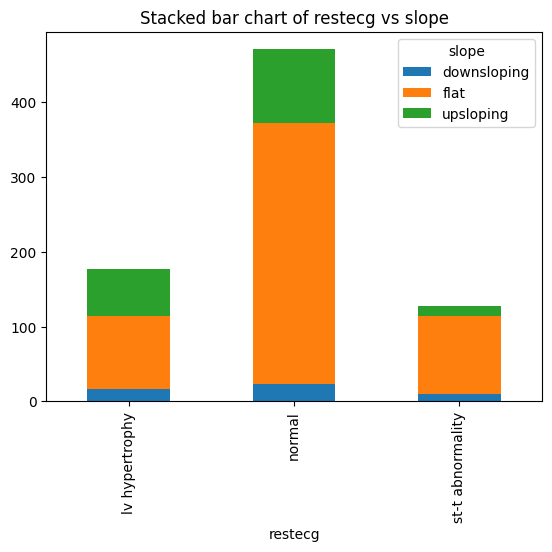

<Figure size 1000x500 with 0 Axes>

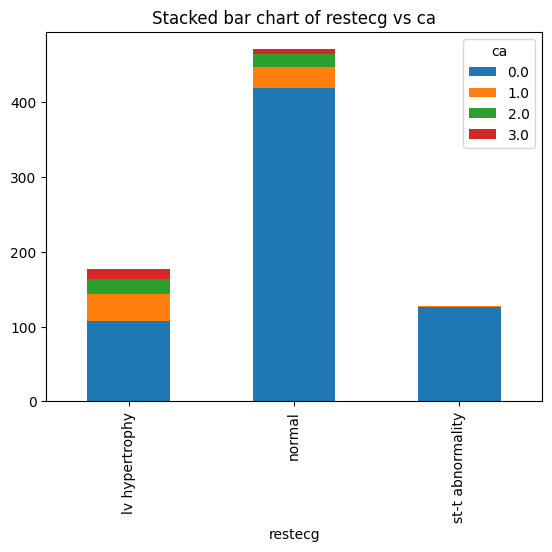

<Figure size 1000x500 with 0 Axes>

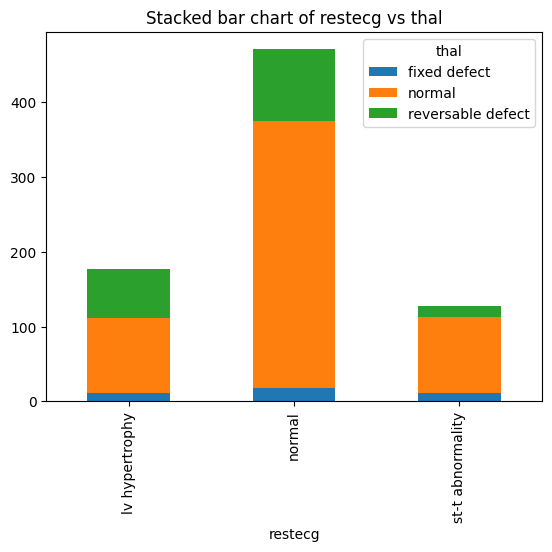

<Figure size 1000x500 with 0 Axes>

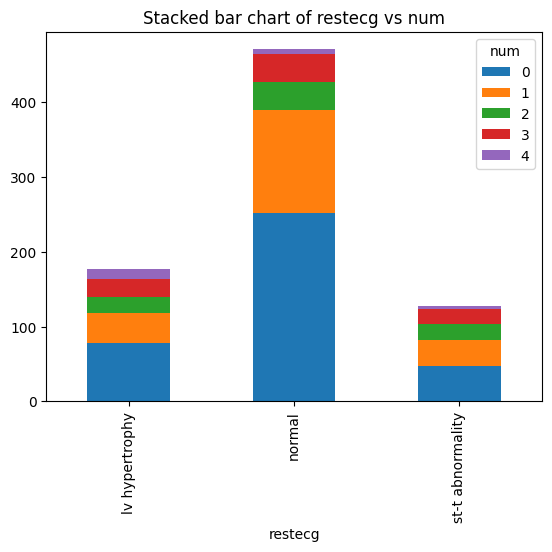

<Figure size 1000x500 with 0 Axes>

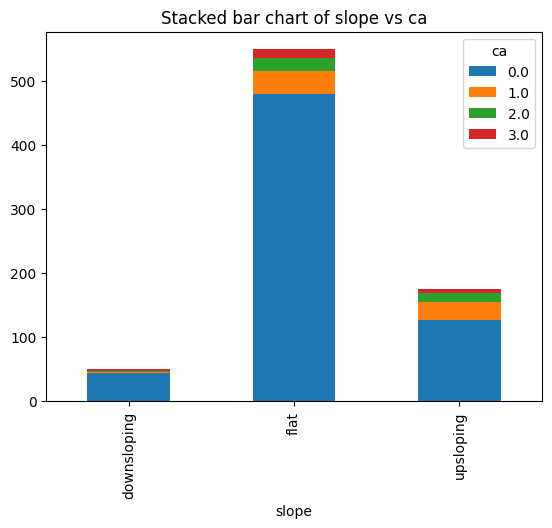

<Figure size 1000x500 with 0 Axes>

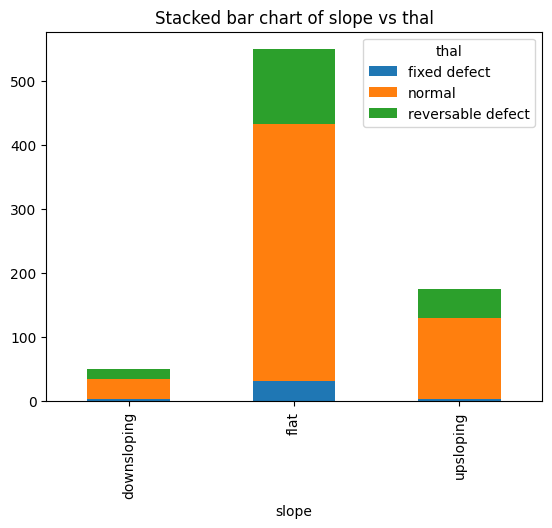

<Figure size 1000x500 with 0 Axes>

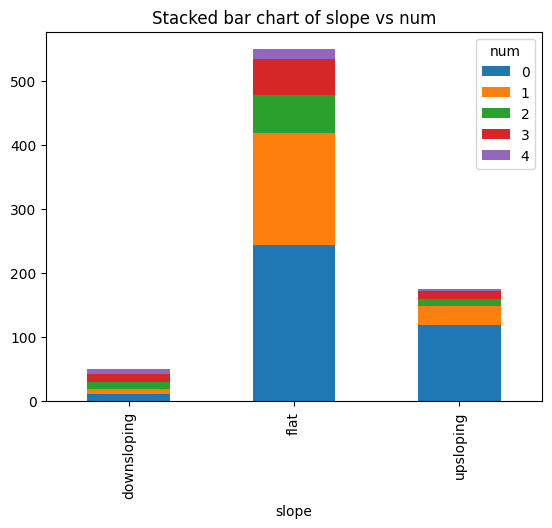

<Figure size 1000x500 with 0 Axes>

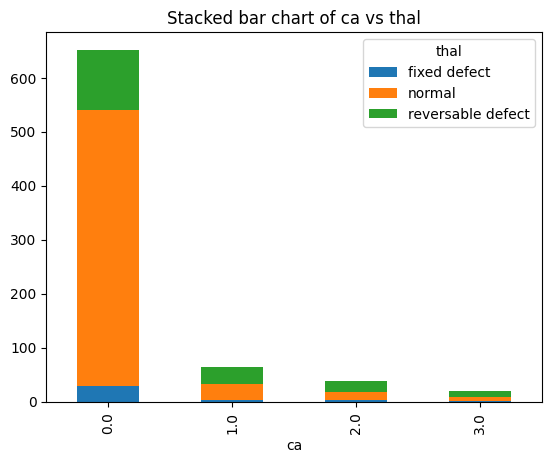

<Figure size 1000x500 with 0 Axes>

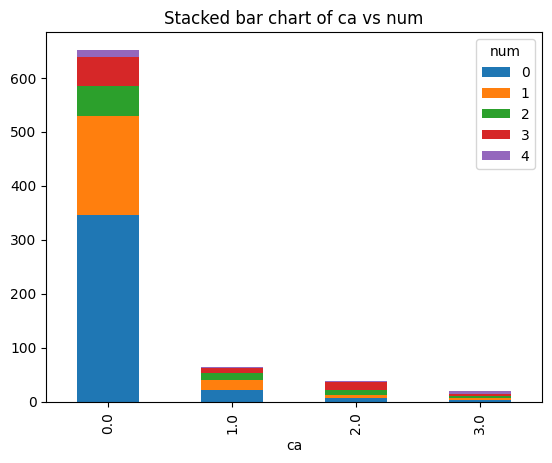

<Figure size 1000x500 with 0 Axes>

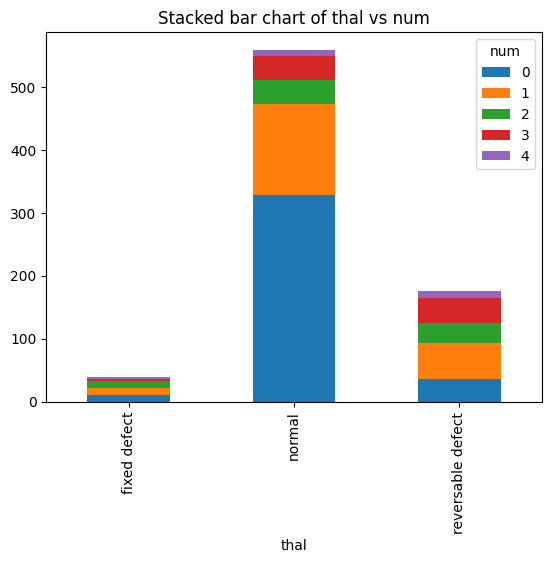

In [24]:
train_categorical_cols.remove('id')
#CATEGORICAL VS CATEGORICAL COLUMNS STACKED BARS
for i in range(len(train_categorical_cols)):
    for j in range(i+1, len(train_categorical_cols)):
        plt.figure(figsize=(10, 5))
        pd.crosstab(data[train_categorical_cols[i]], data[train_categorical_cols[j]]).plot(kind='bar', stacked=True)
        plt.title(f'Stacked bar chart of {train_categorical_cols[i]} vs {train_categorical_cols[j]}')
        plt.show()


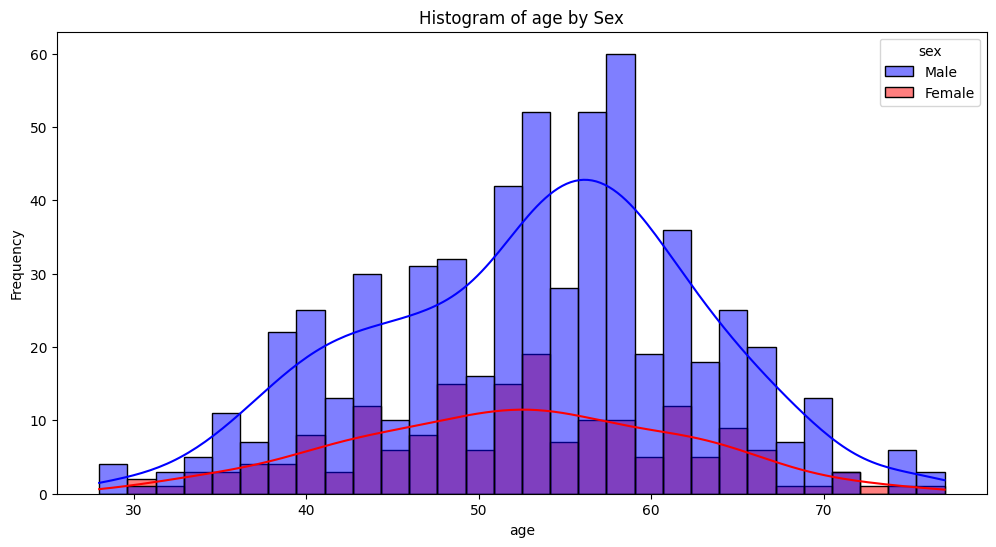

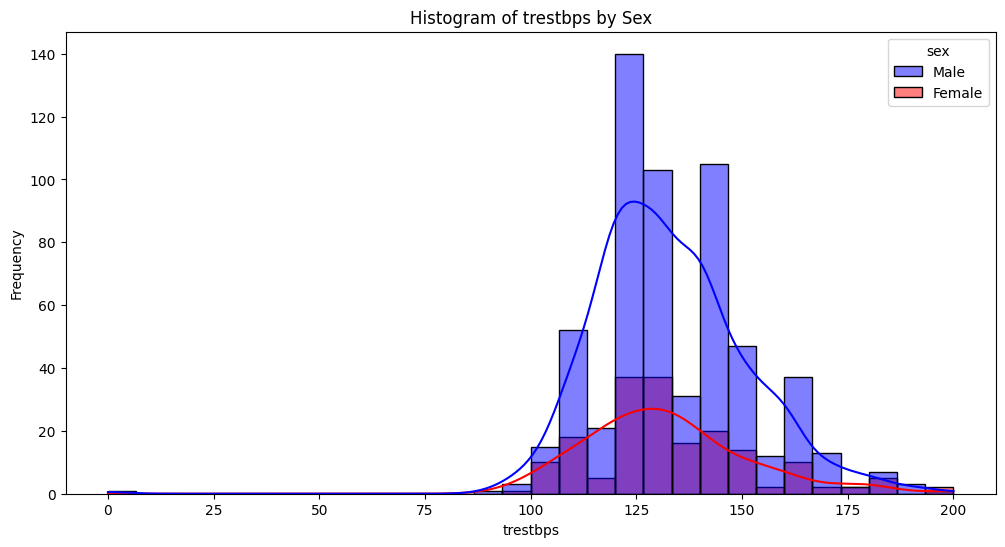

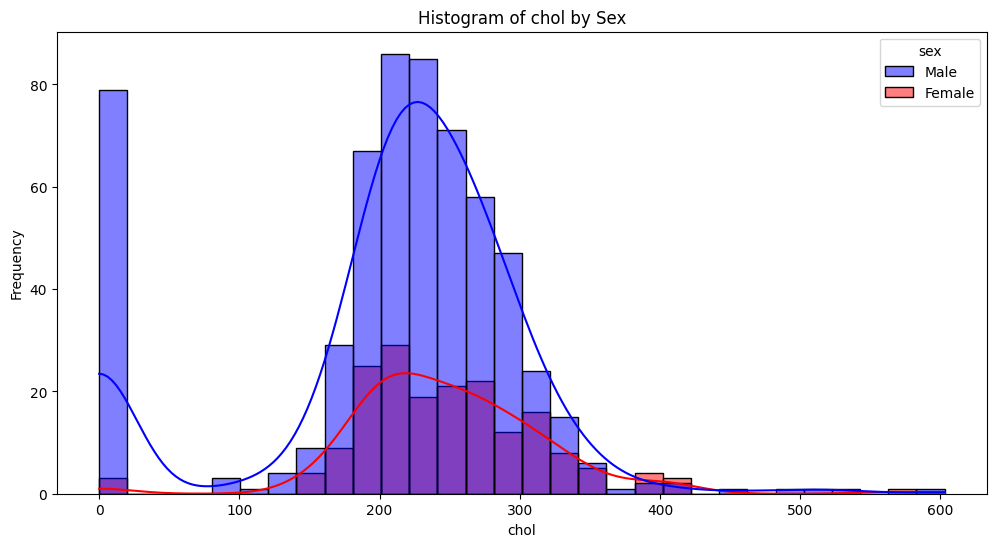

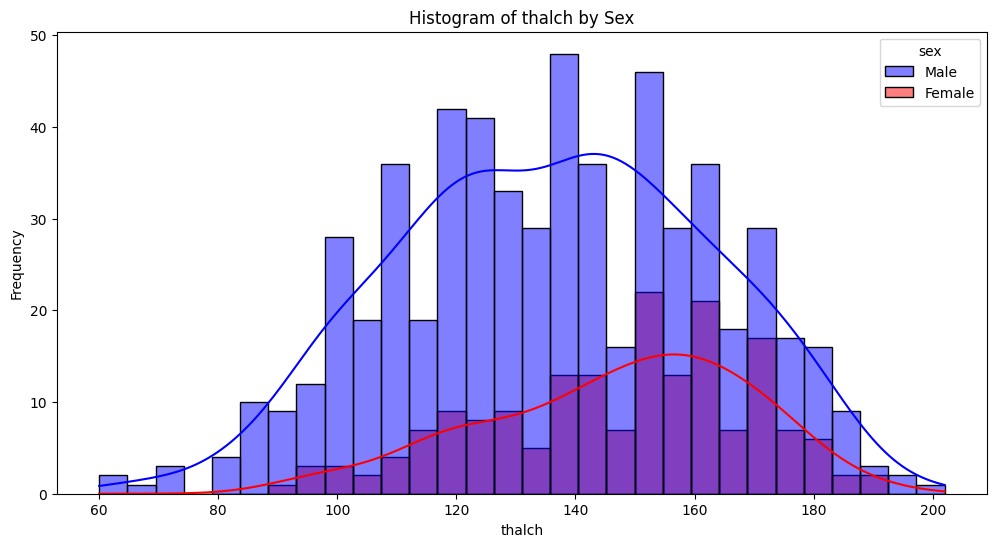

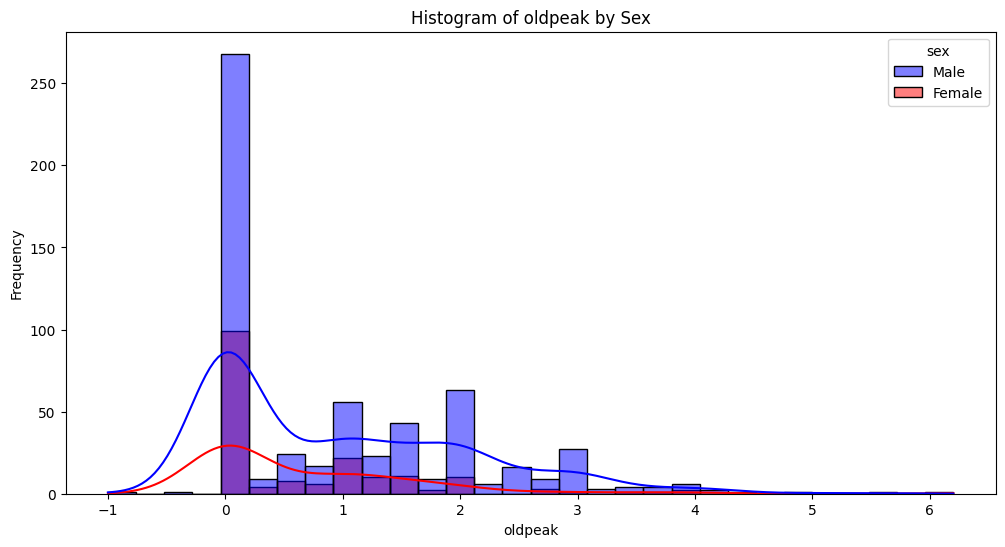

In [34]:
num_numeric_cols = len(train_numeric_cols)
num_rows = num_numeric_cols
#Histograms of each numeric column by sex
#Male -> Blue
#Female -> Red
custom_palette = {'Male': 'blue', 'Female': 'red'}

for col in train_numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=col, hue='sex', kde=True, bins=30, palette=custom_palette)
    plt.title(f'Histogram of {col} by Sex')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

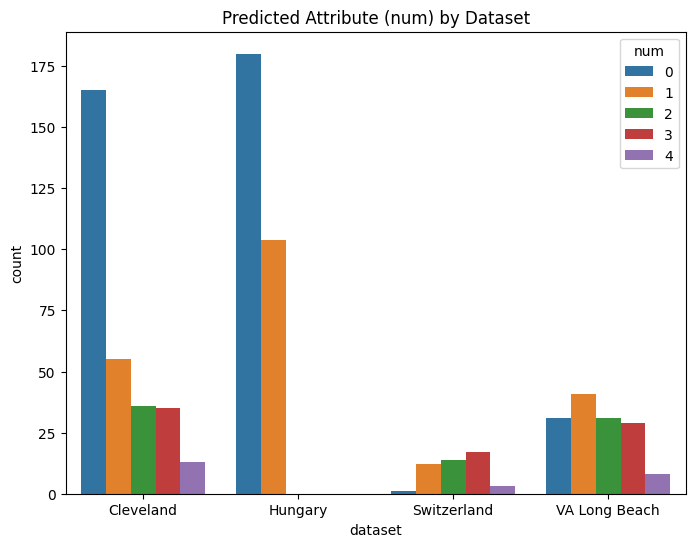

In [115]:
plt.figure(figsize=(8,6))
sns.countplot(x='dataset',hue='num',data=data)
plt.title('Predicted Attribute (num) by Dataset')
plt.show()

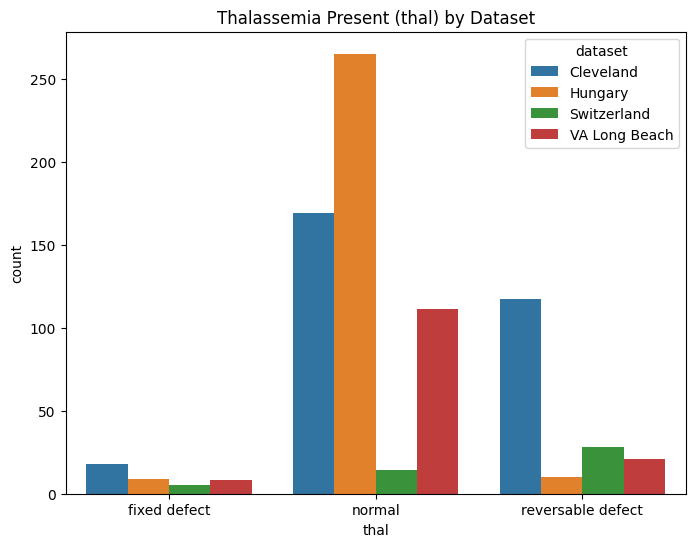

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='dataset', data=data)
plt.title('Thalassemia Present (thal) by Dataset')
plt.show()

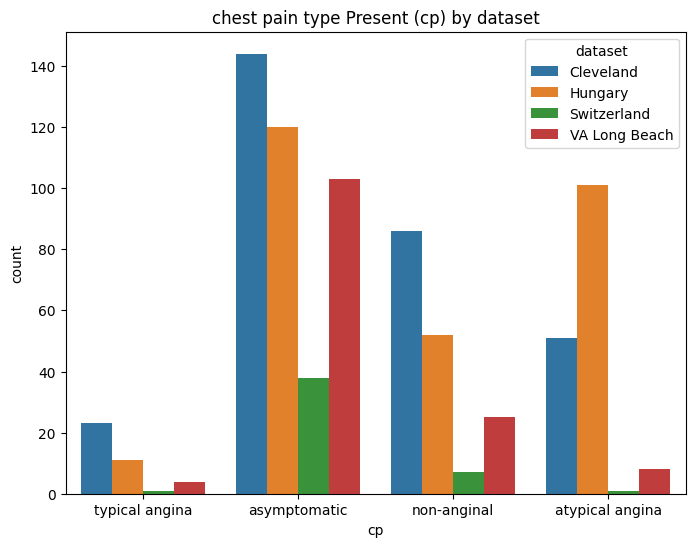

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='dataset', data=data)
plt.title('chest pain type Present (cp) by dataset')
plt.show()

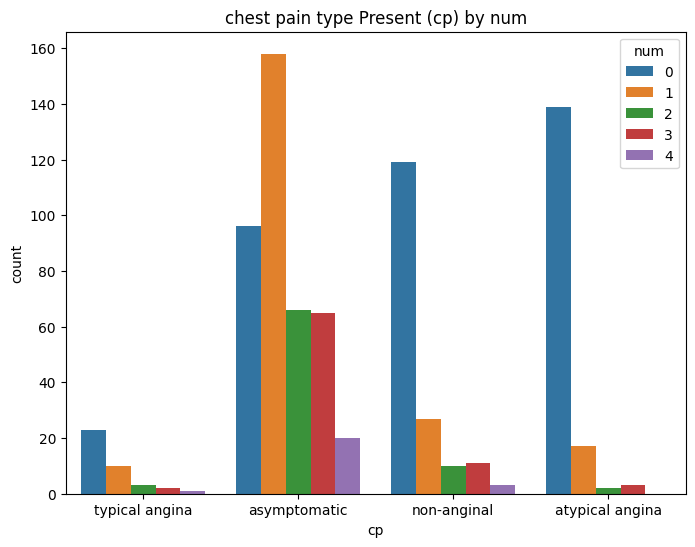

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='num', data=data)
plt.title('chest pain type Present (cp) by num')
plt.show()

### Multivariate analysis

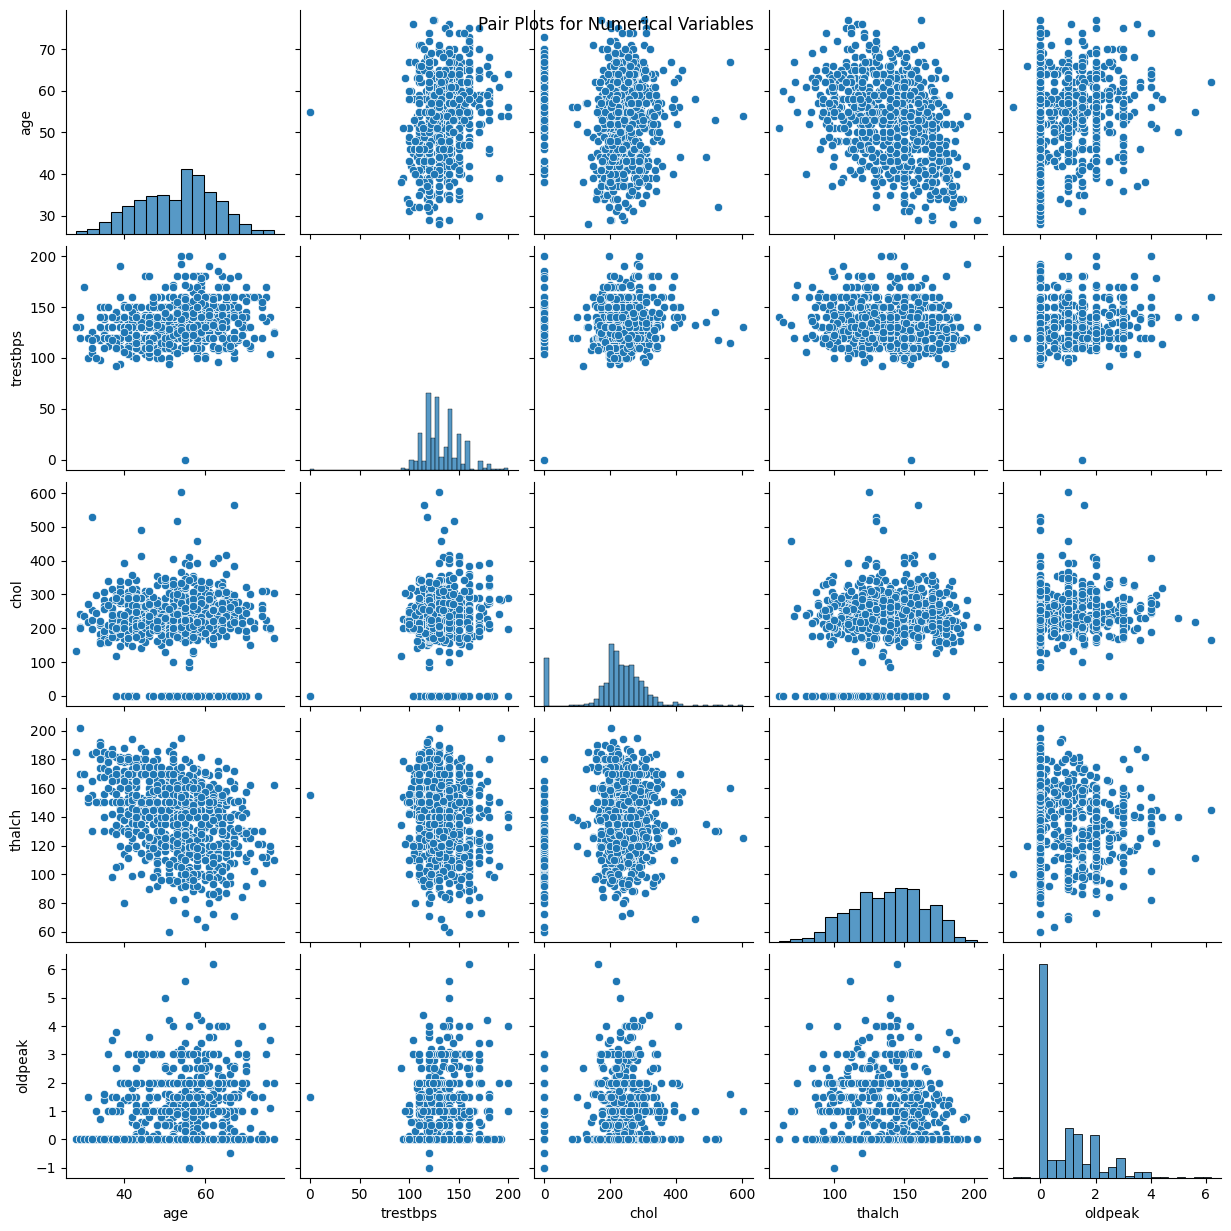

In [29]:
sns.pairplot(data[train_numeric_cols + ['sex']])
plt.suptitle('Pair Plots for Numerical Variables') #pair plots of numerical values
plt.show()

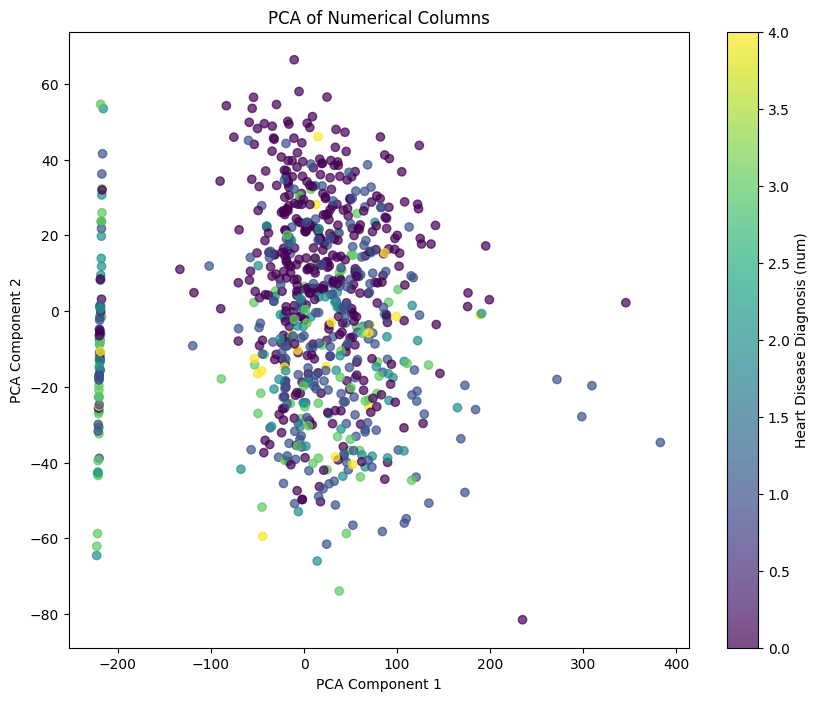

In [116]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[train_numeric_cols].dropna())

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['num'], cmap='viridis', alpha=0.7)
plt.title('PCA of Numerical Columns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Heart Disease Diagnosis (num)')
plt.show()
#PCA OF NUMERICAL COLUMNS USING 2 PCs

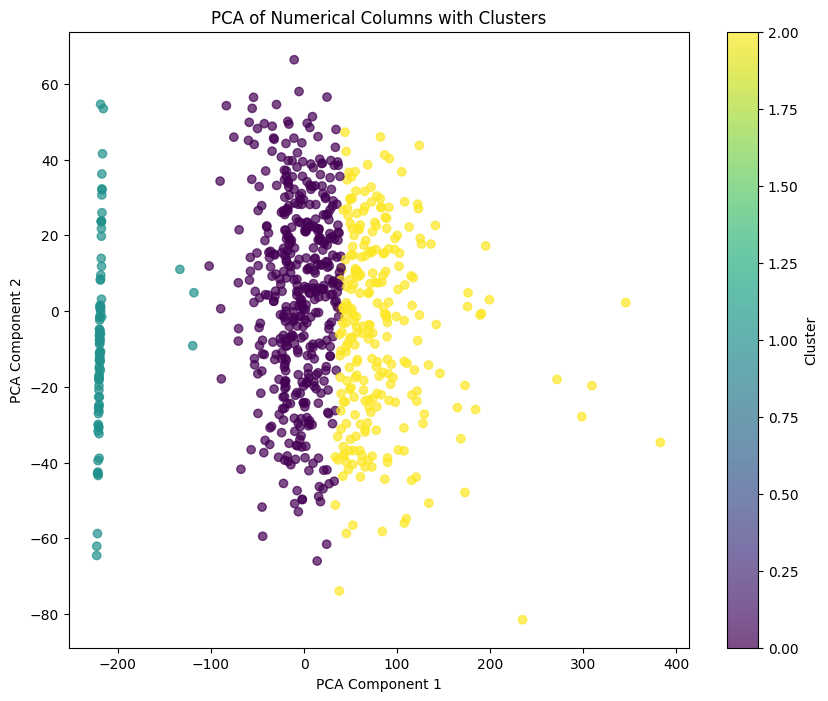

In [117]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[train_numeric_cols].dropna())
data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA of Numerical Columns with Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
#kMeans clustering with3 clusters of 2 PCs

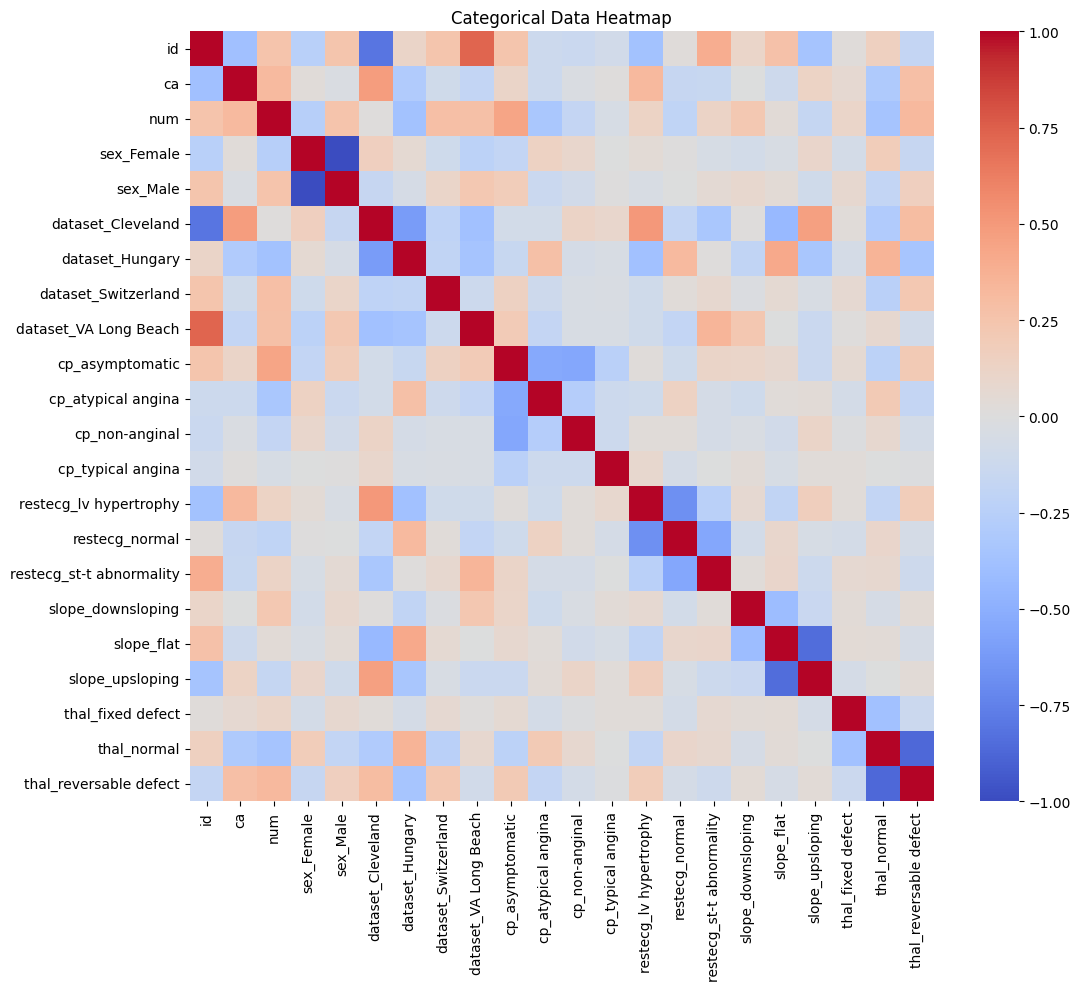

In [119]:
categorical_data = pd.get_dummies(data[train_categorical_cols])
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_data.corr(), annot=False, cmap='coolwarm')
plt.title('Categorical Data Heatmap')
plt.show()


### Outlier Detection

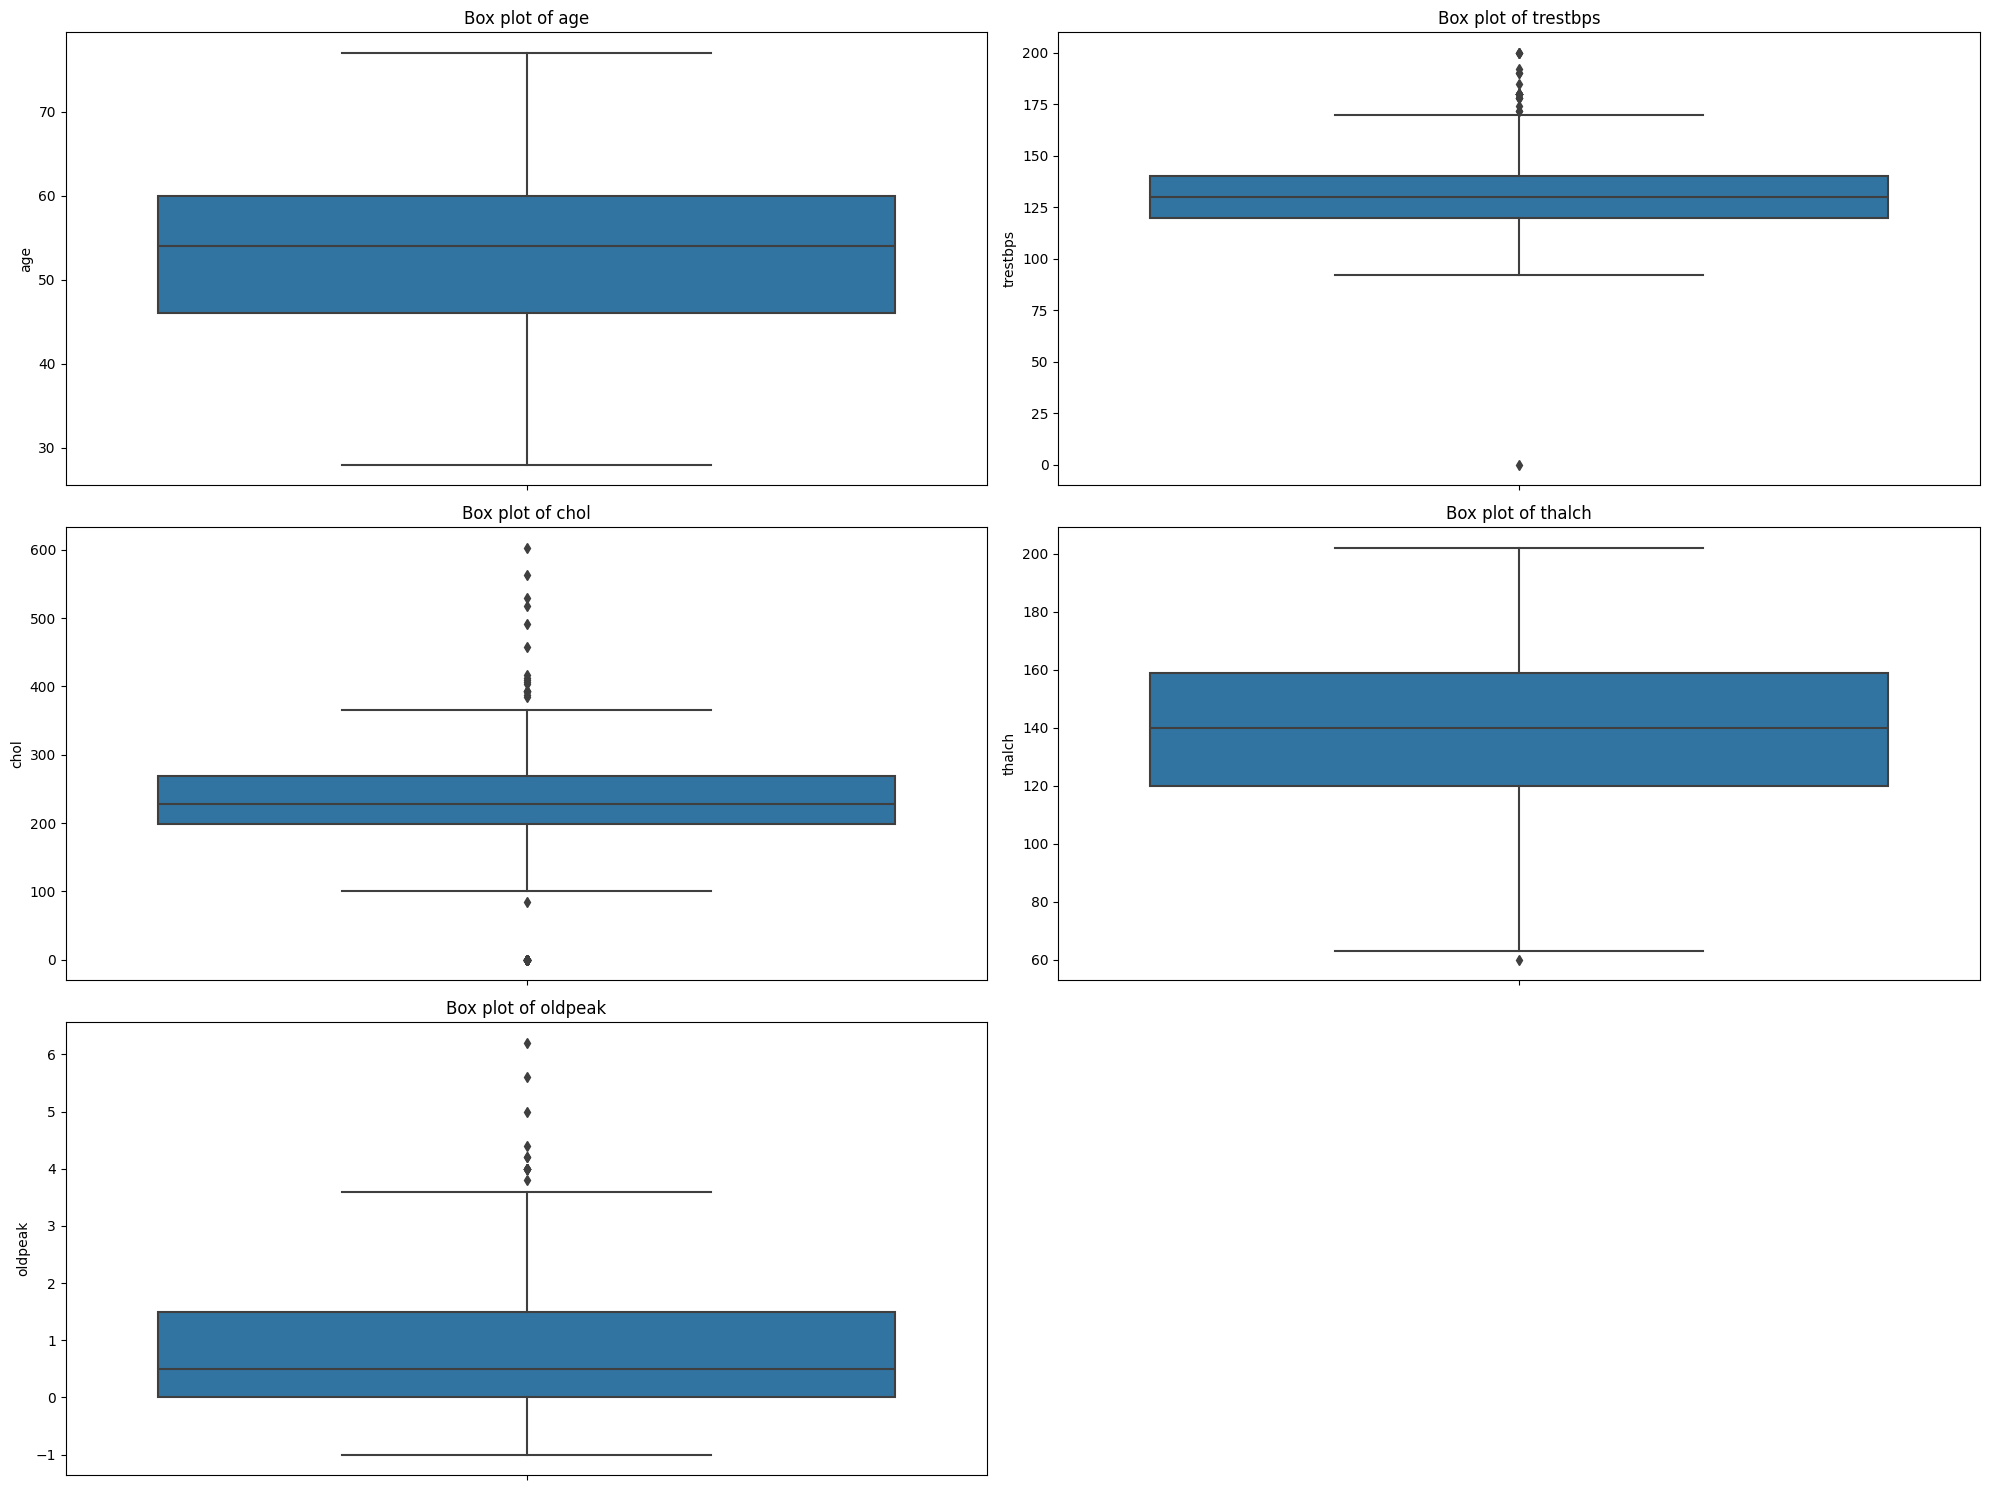

In [35]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(train_numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()
#Detecting outliers using box plot

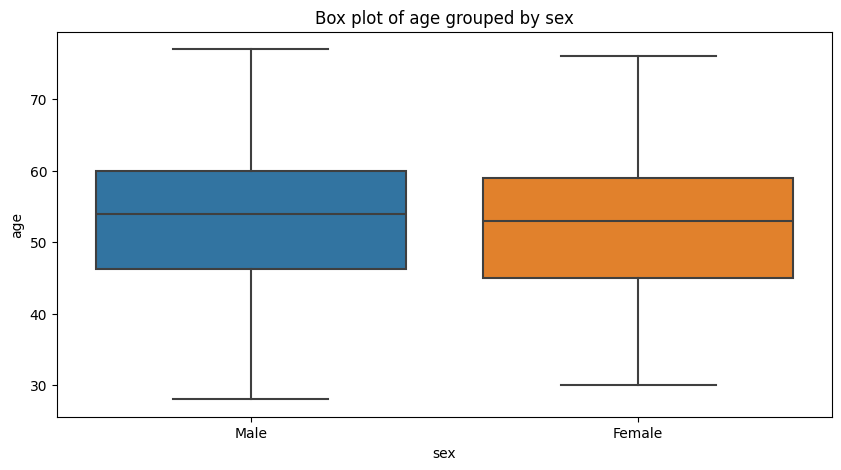

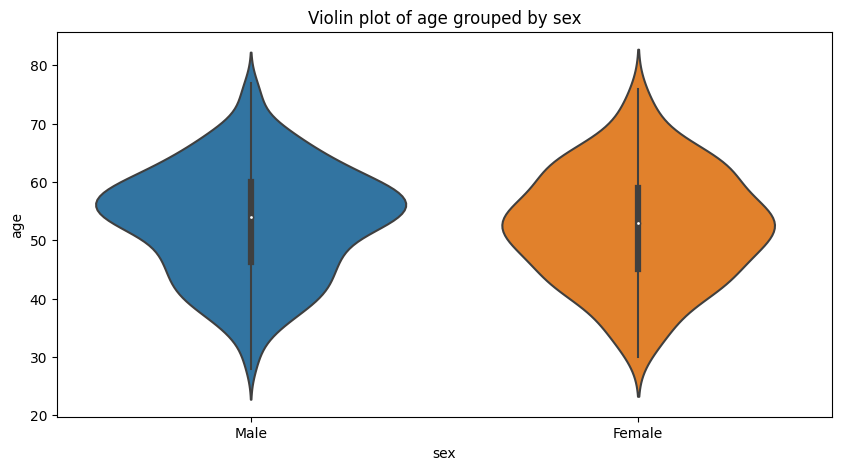

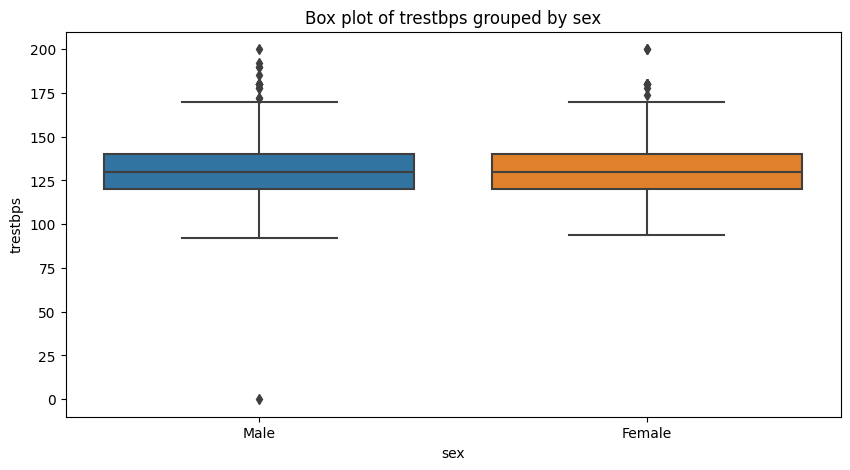

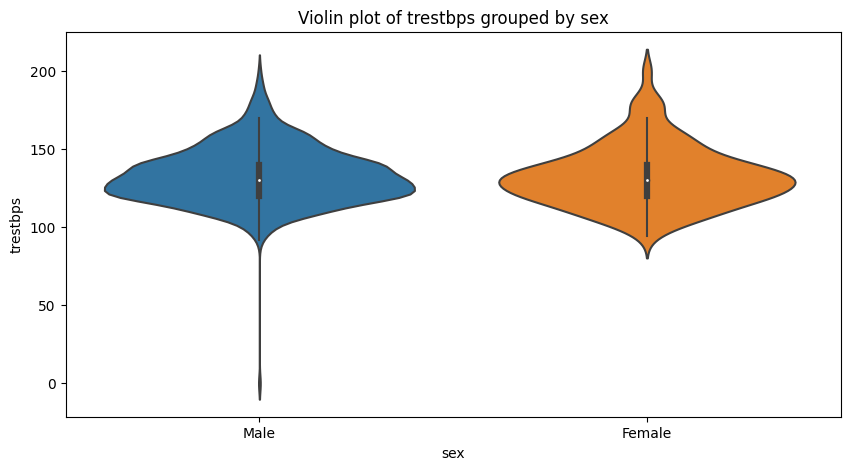

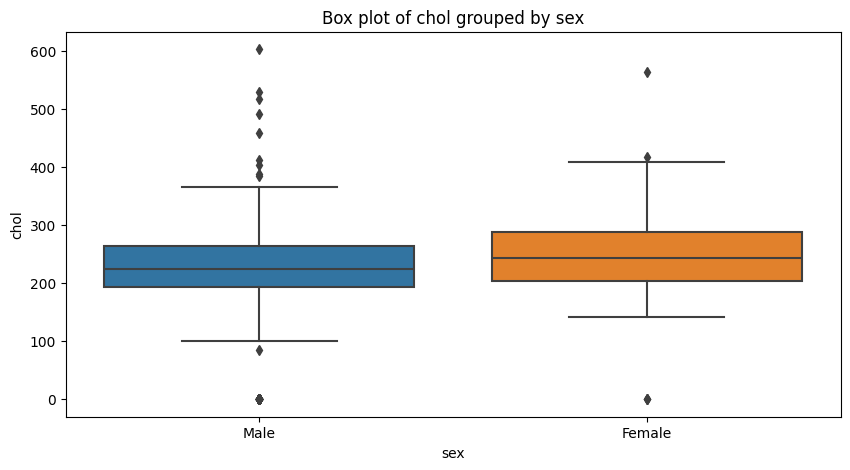

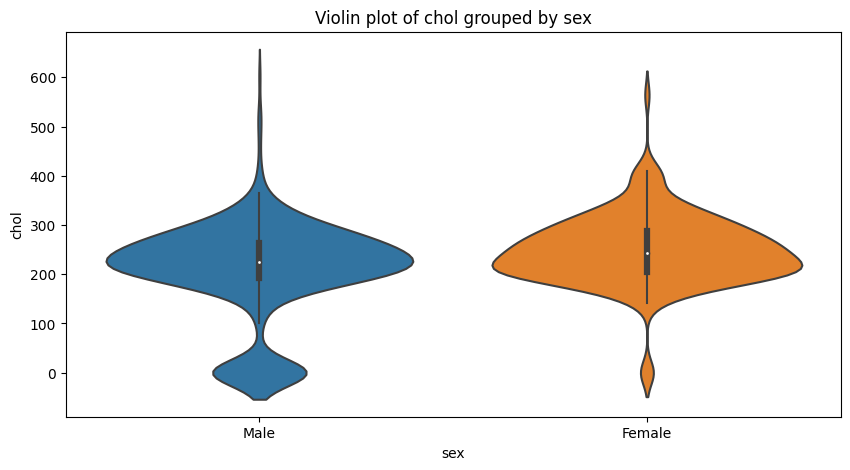

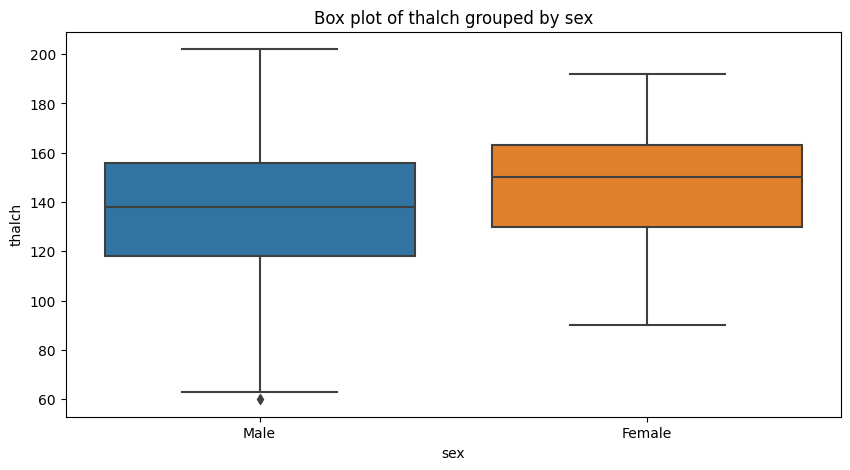

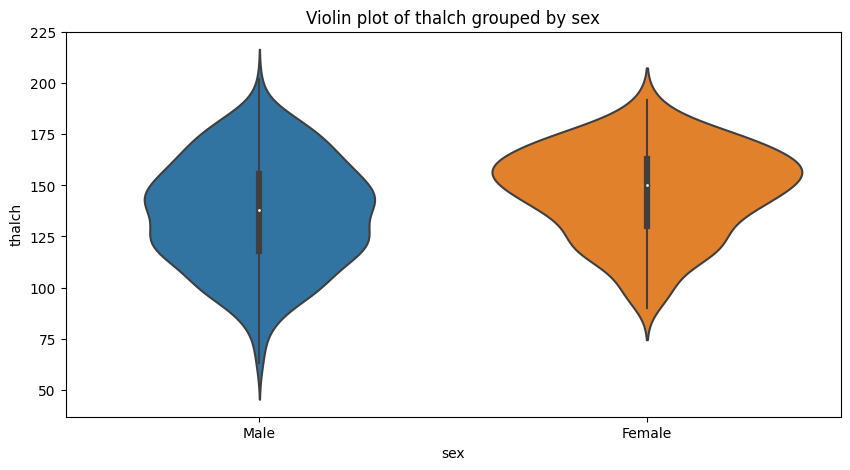

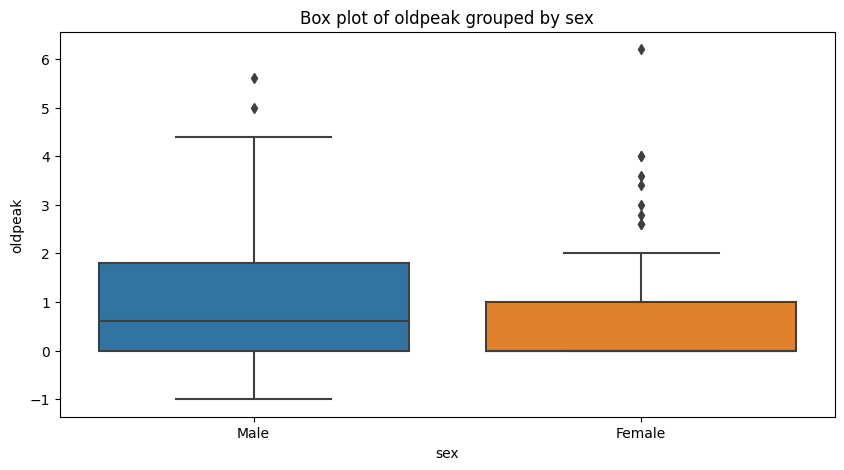

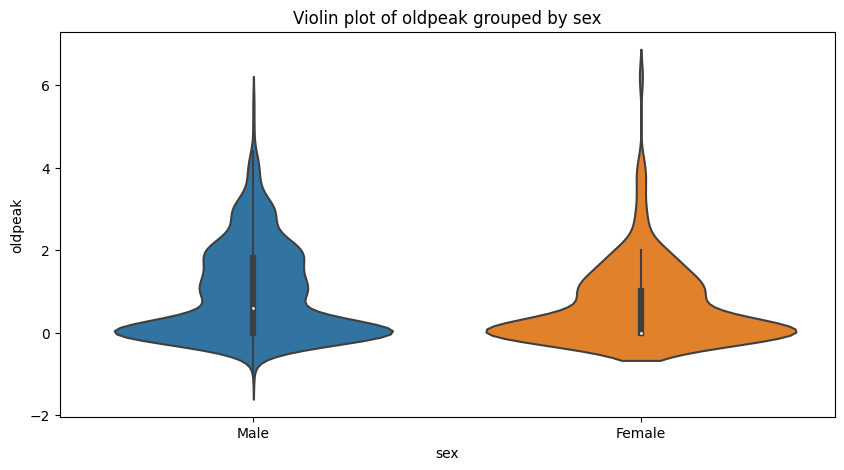

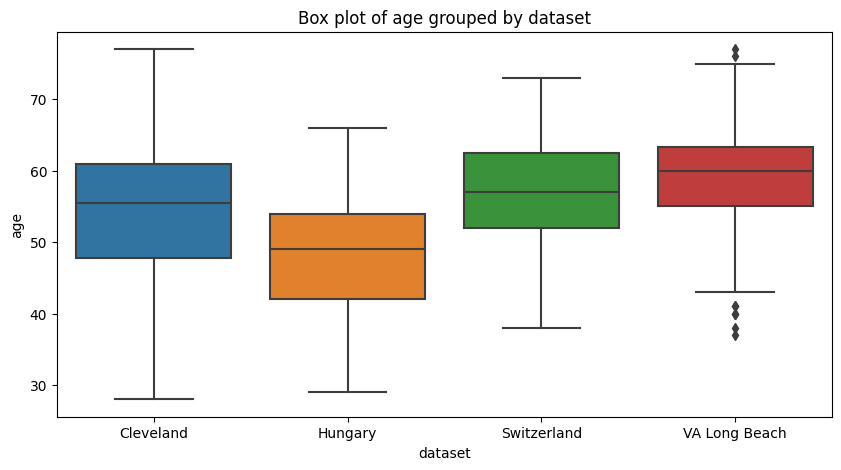

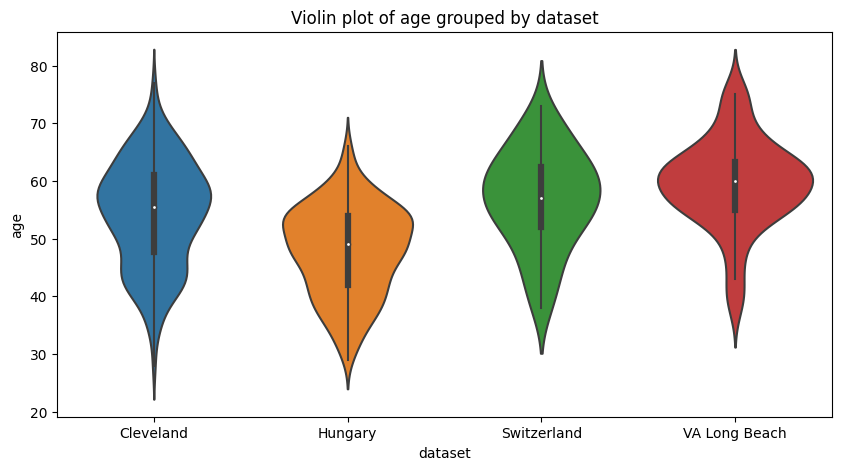

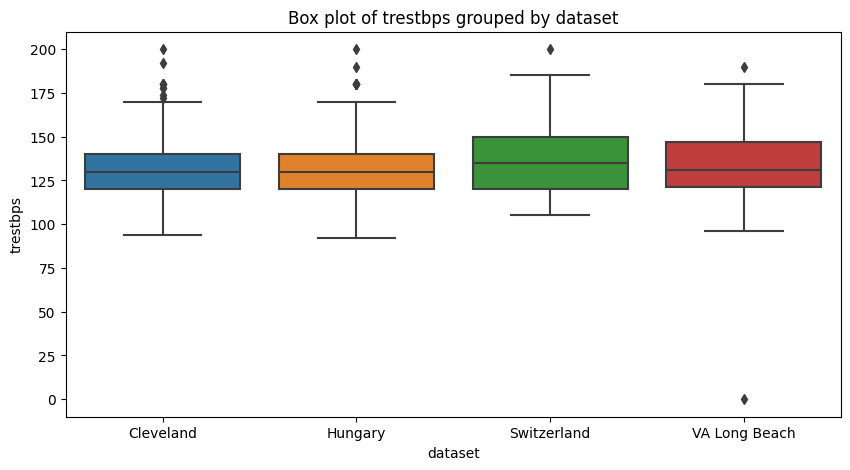

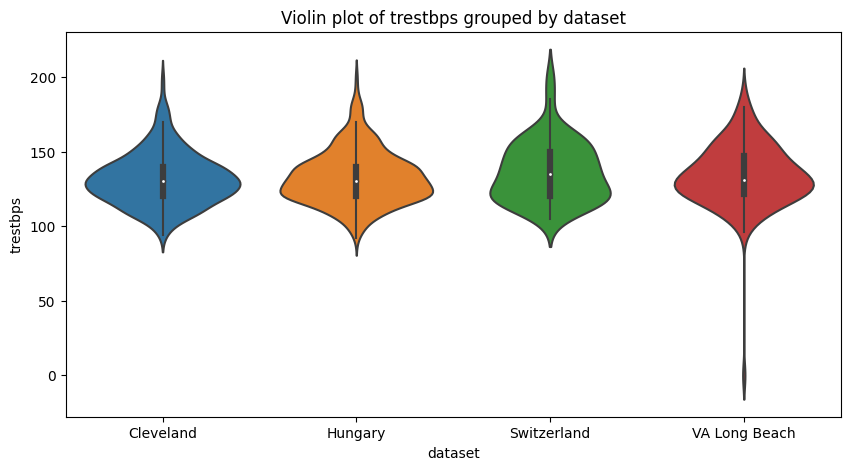

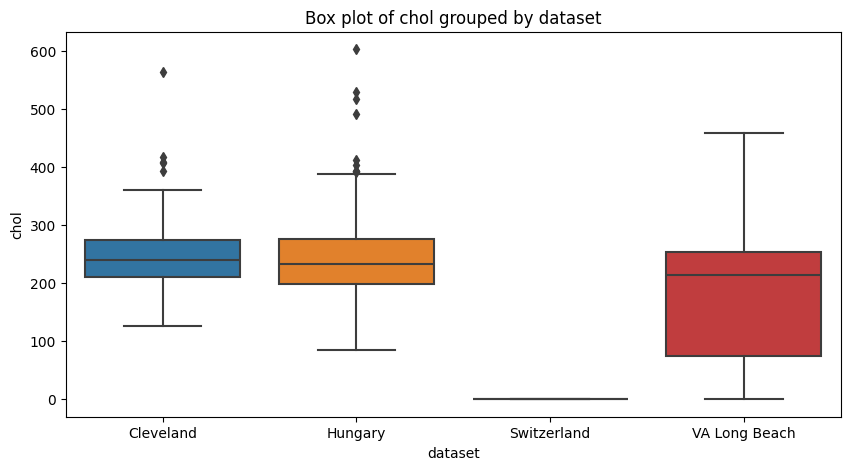

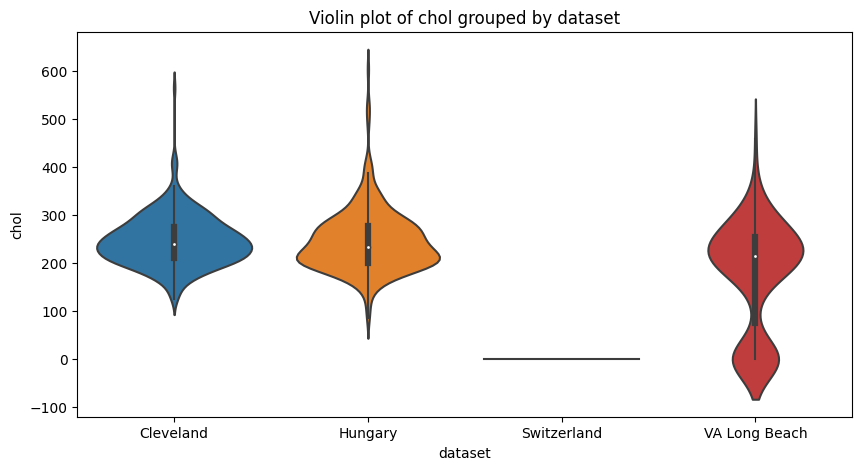

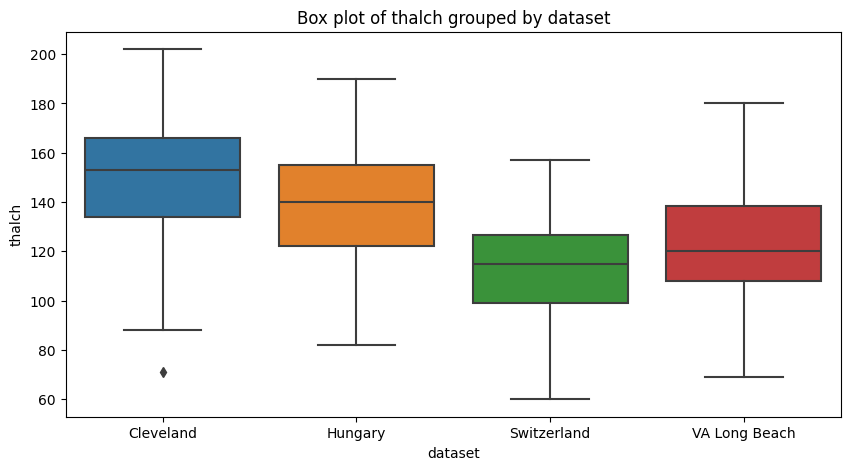

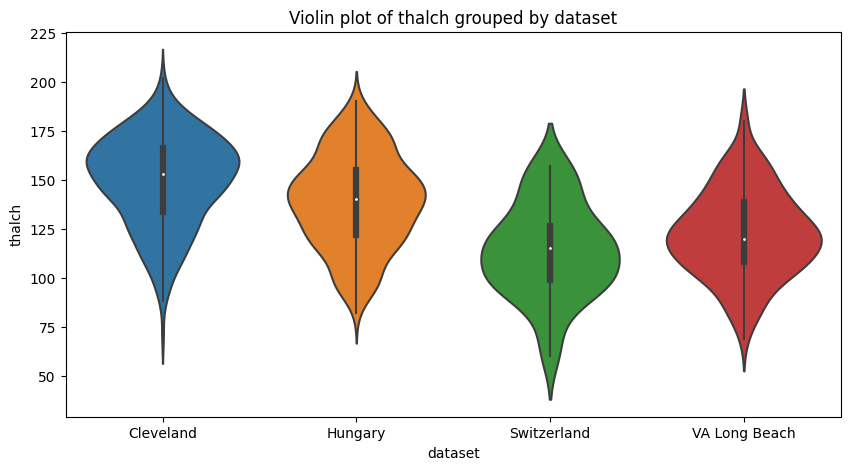

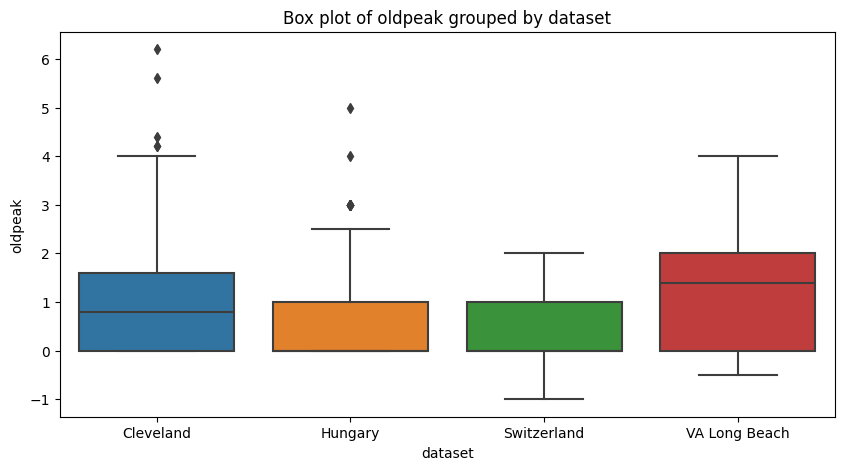

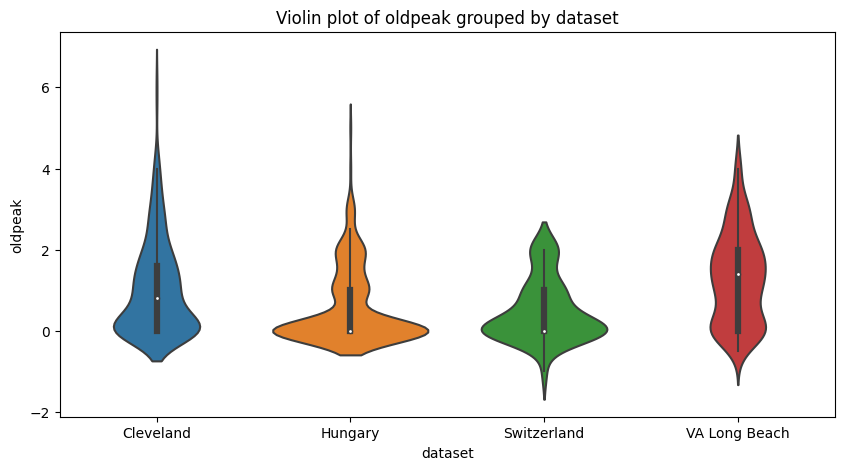

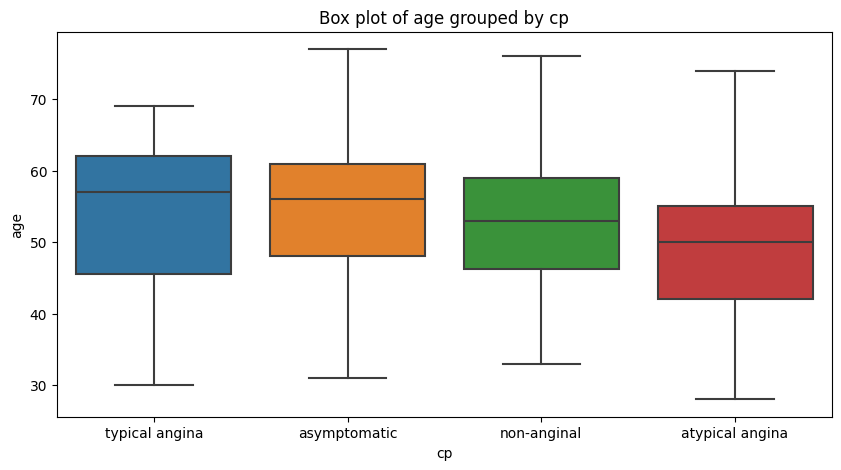

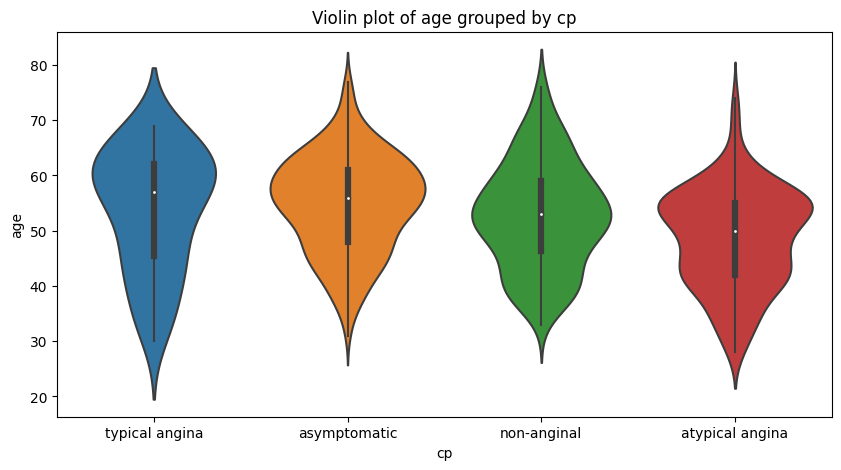

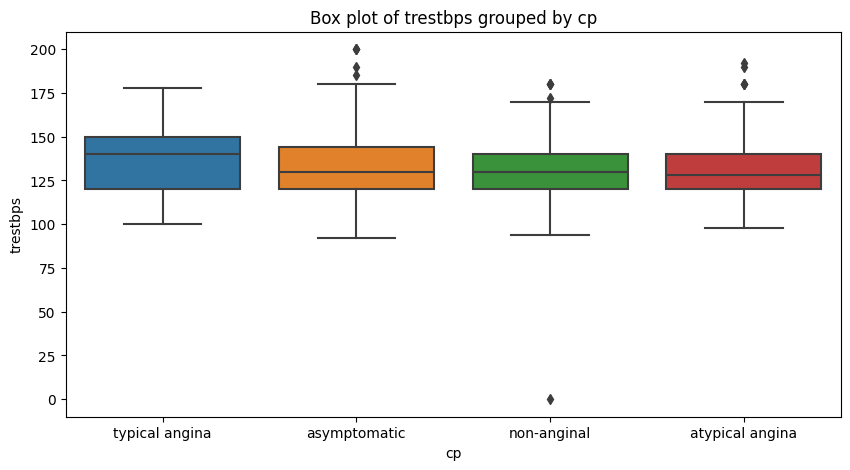

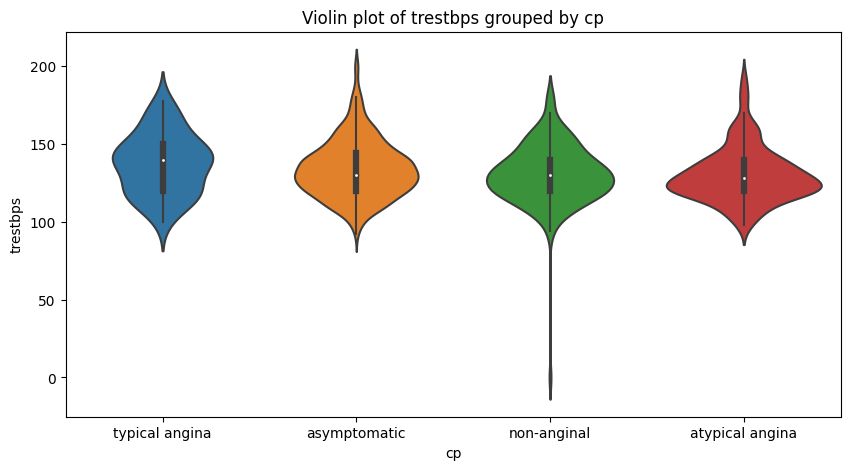

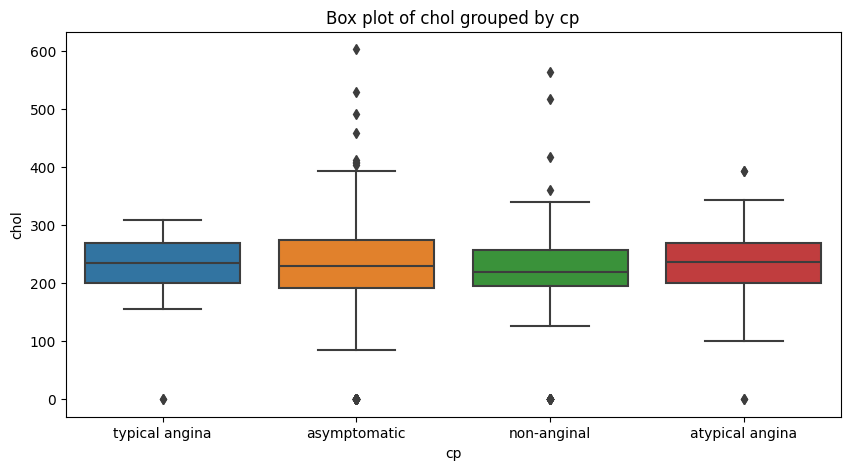

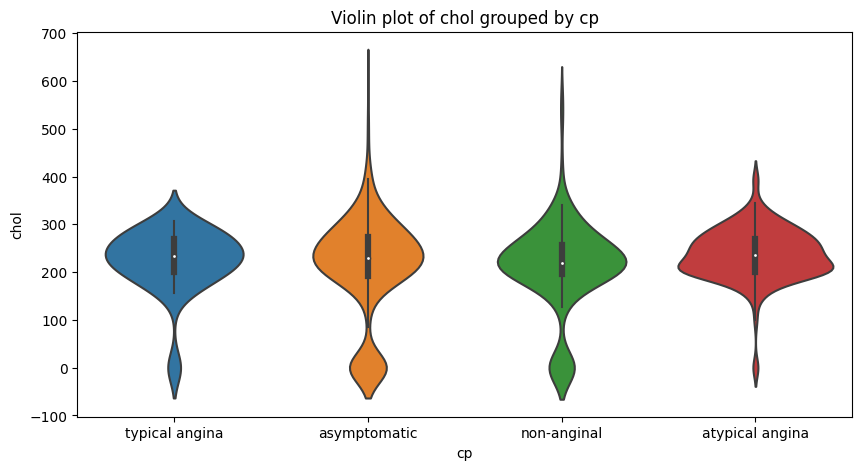

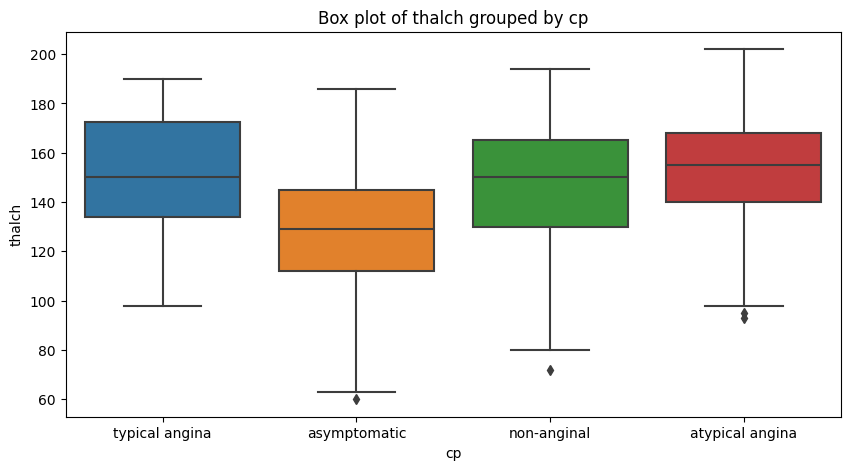

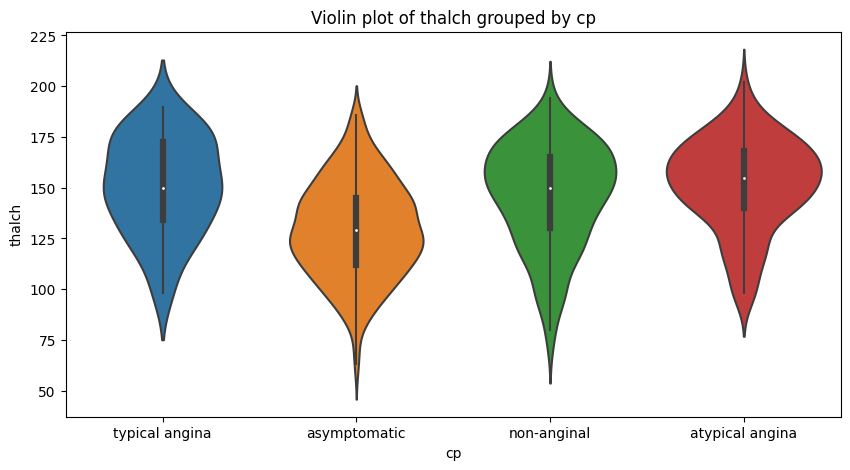

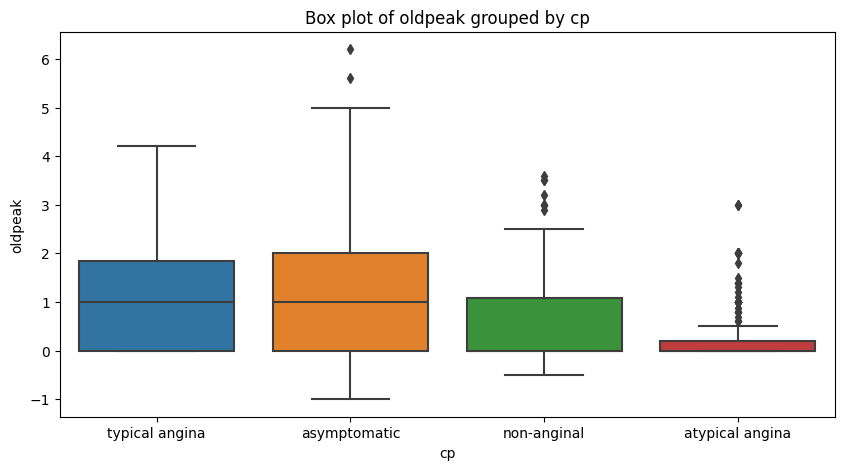

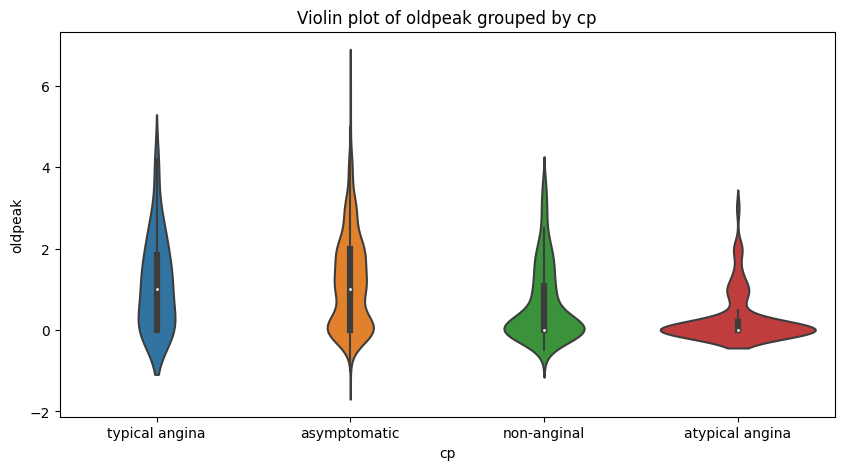

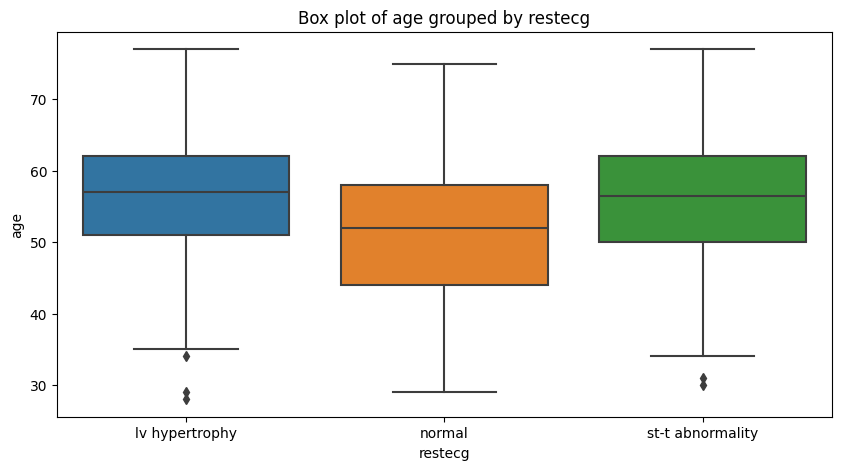

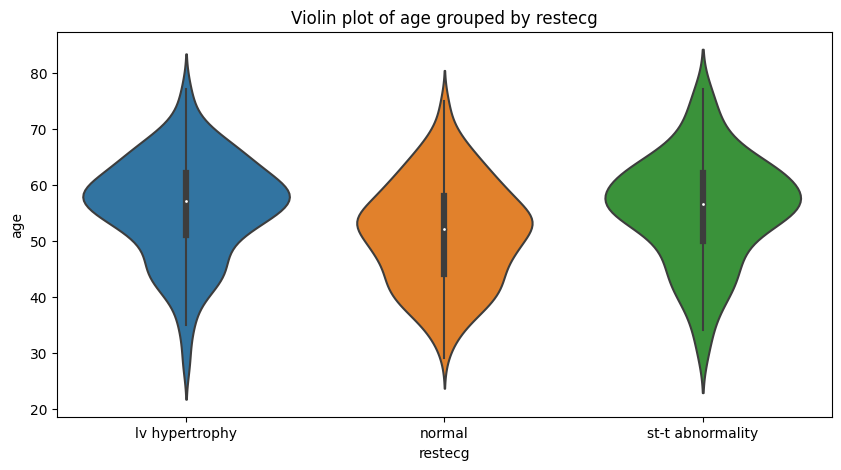

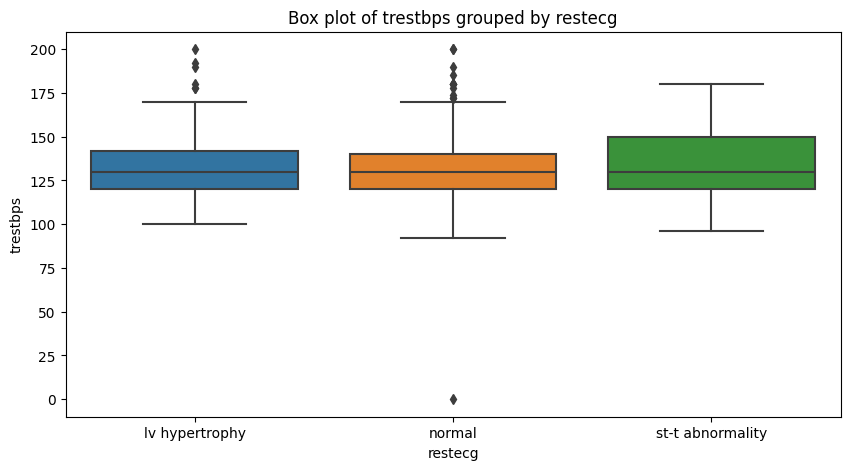

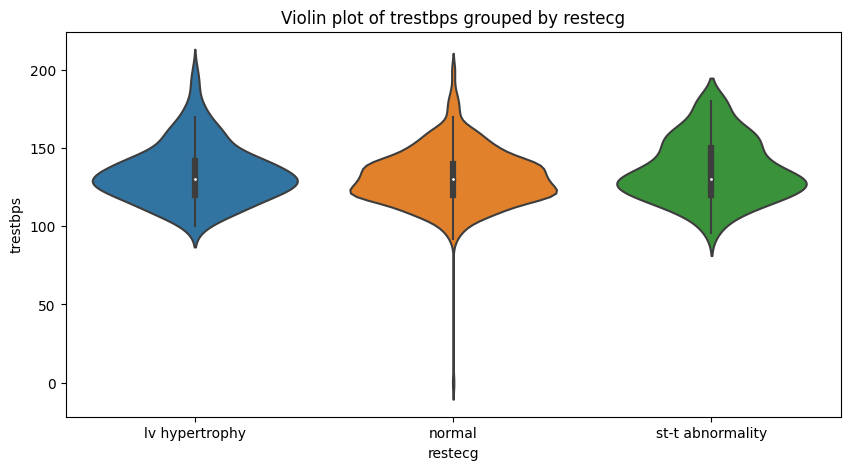

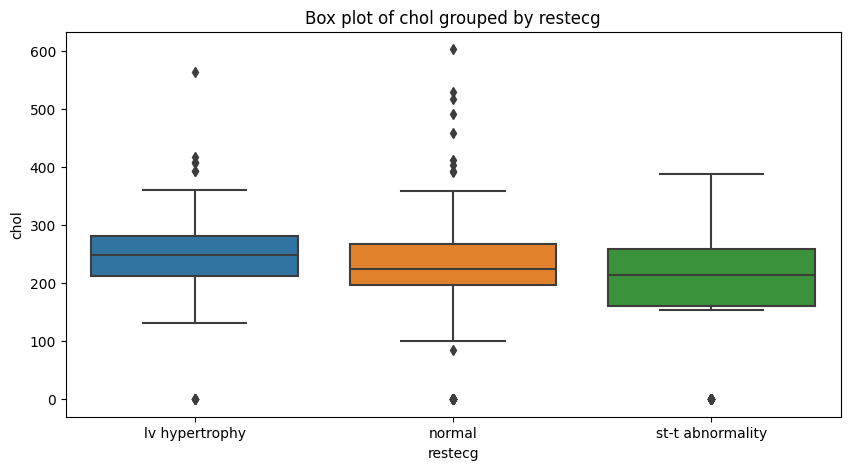

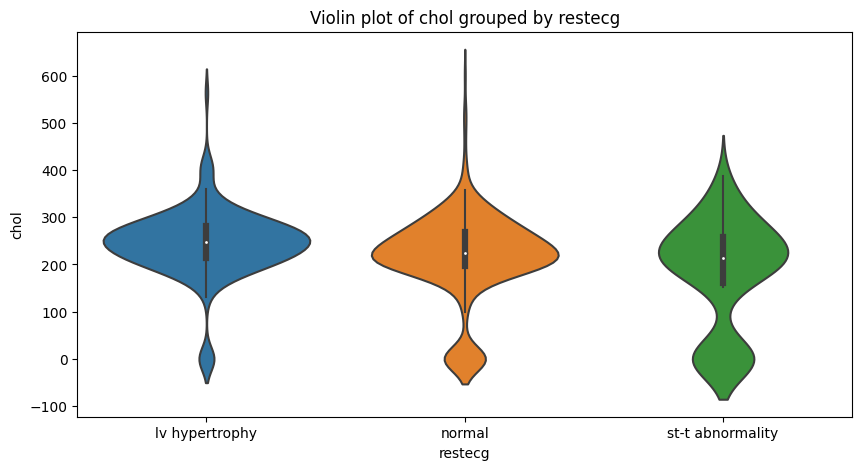

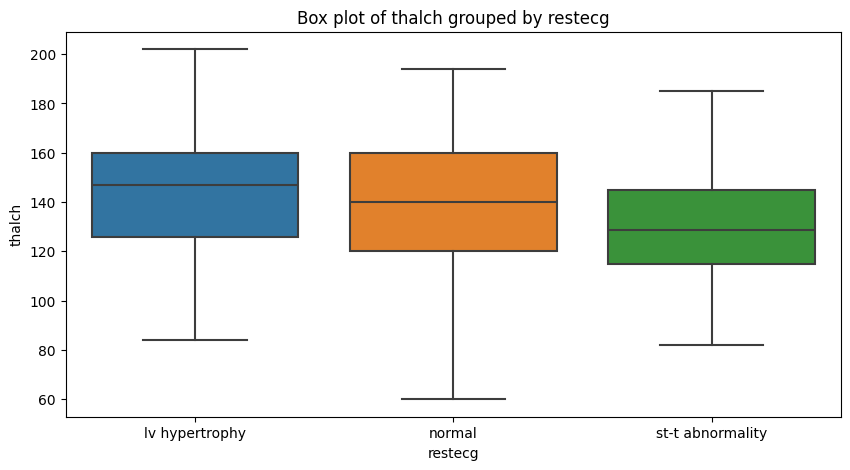

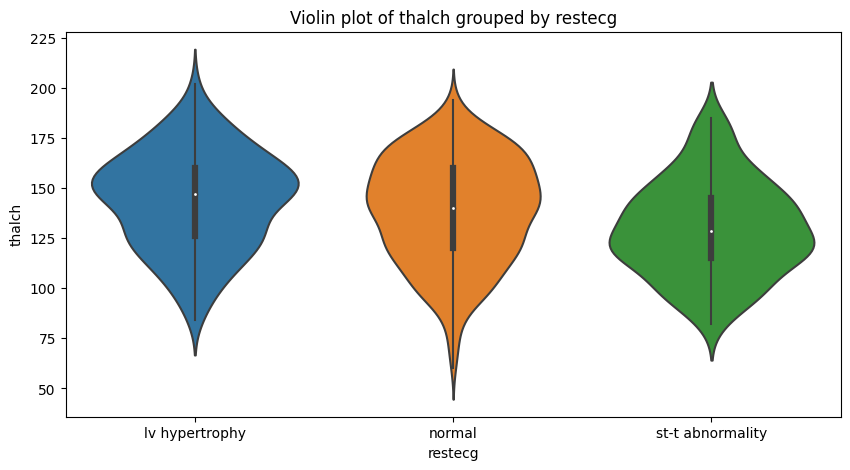

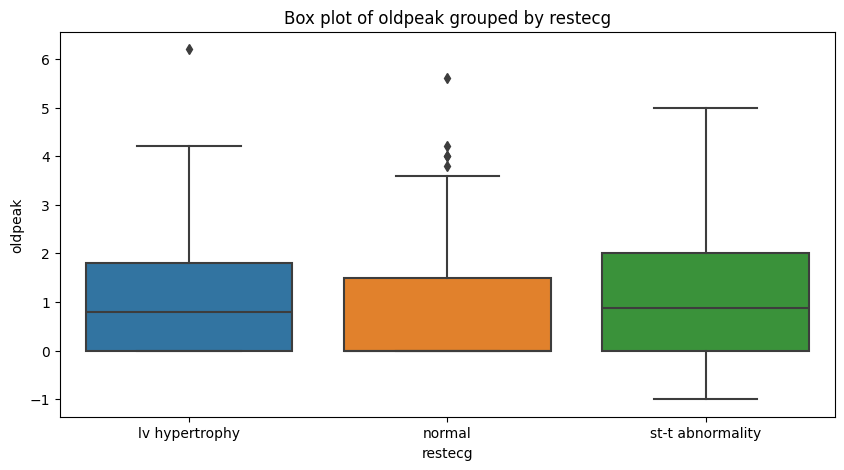

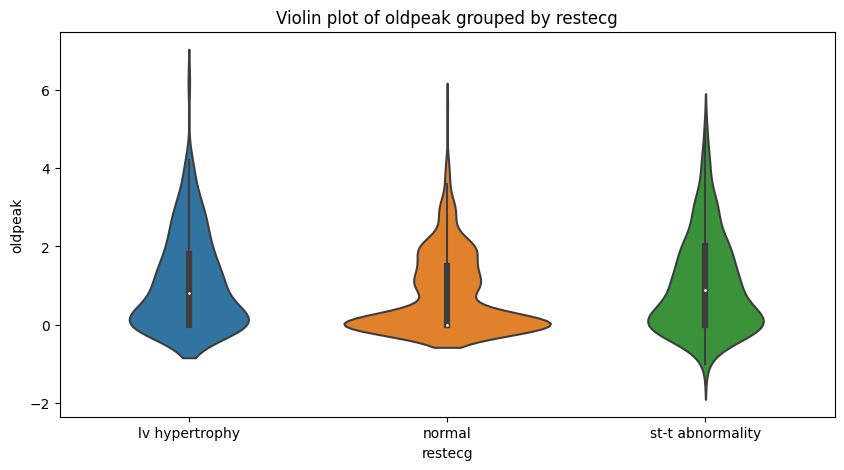

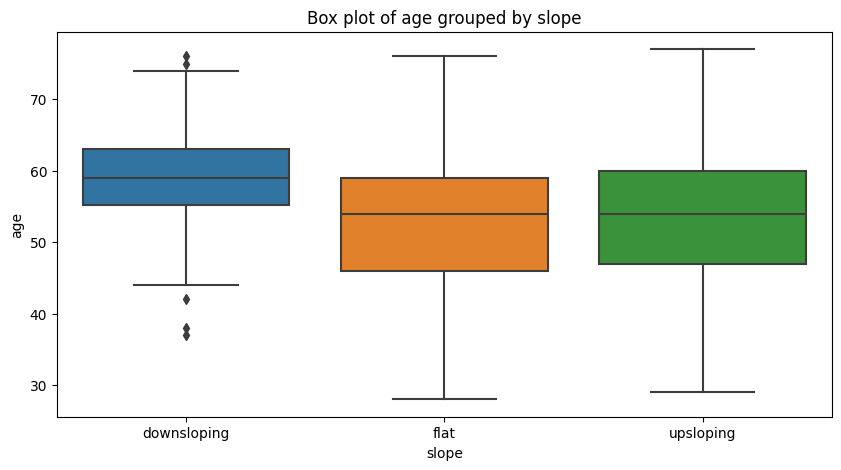

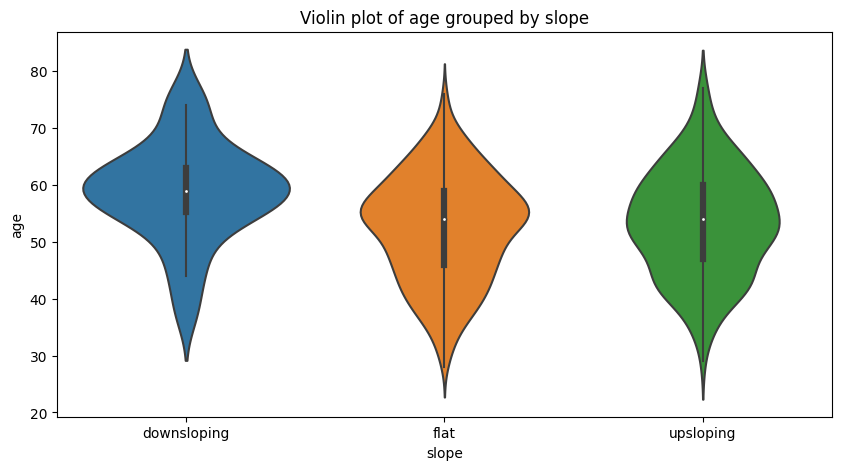

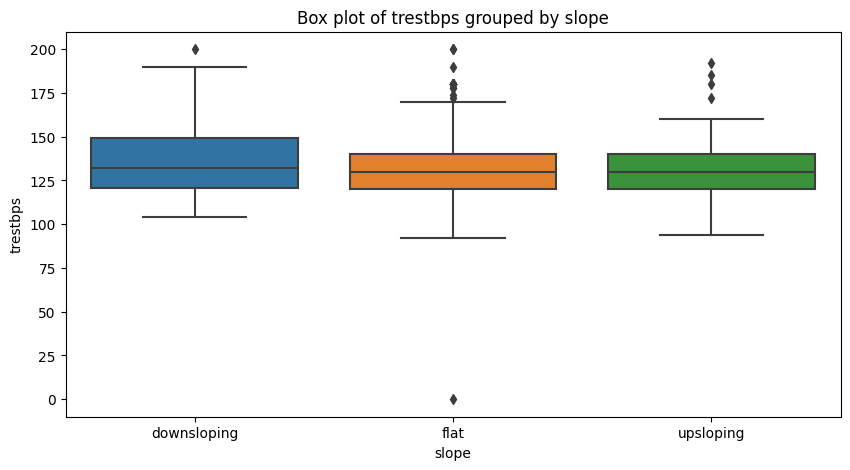

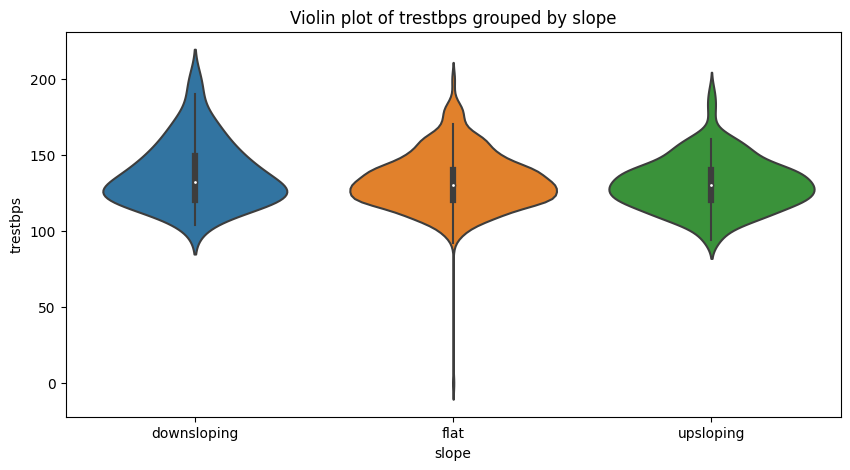

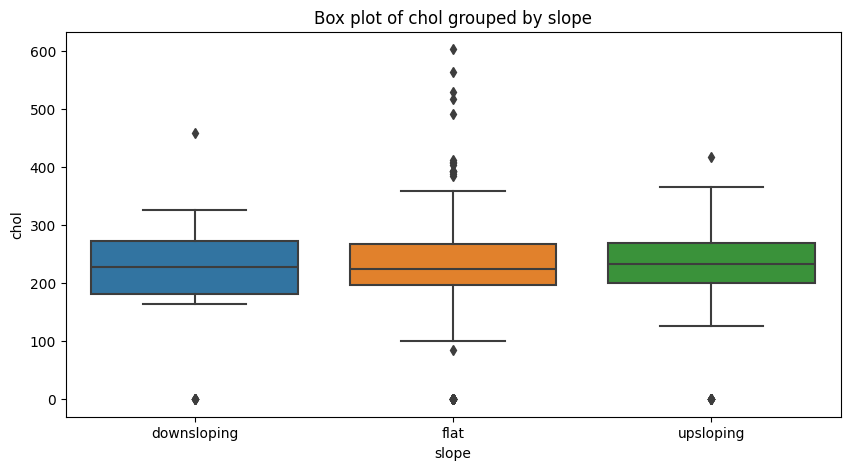

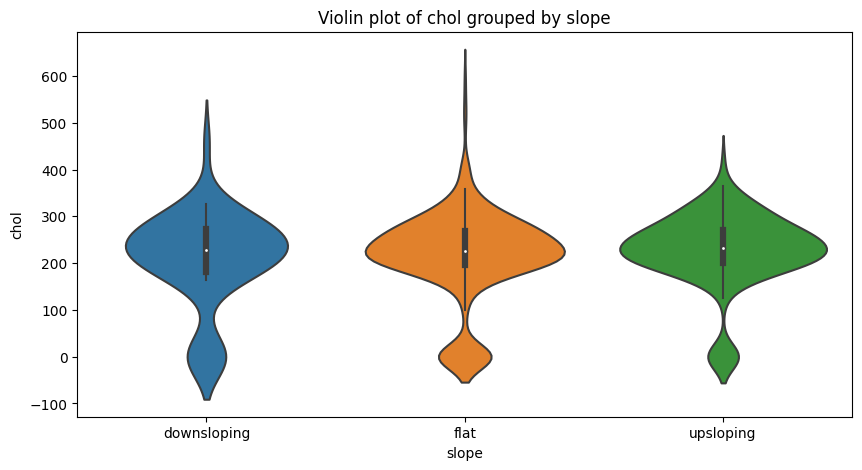

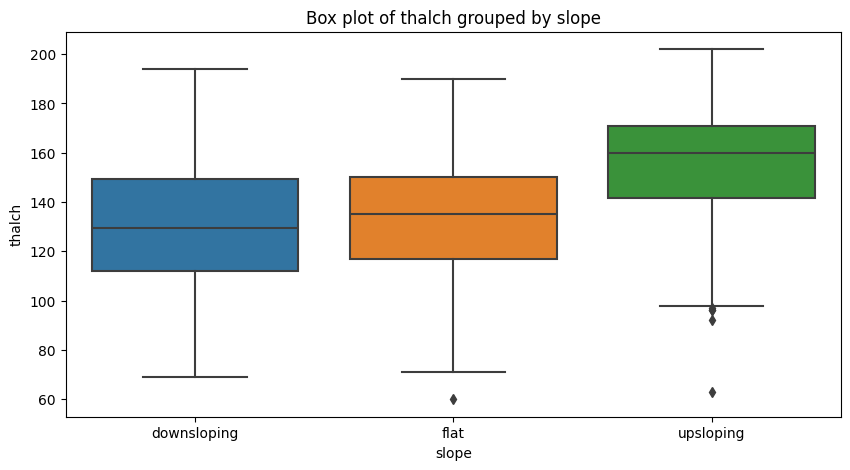

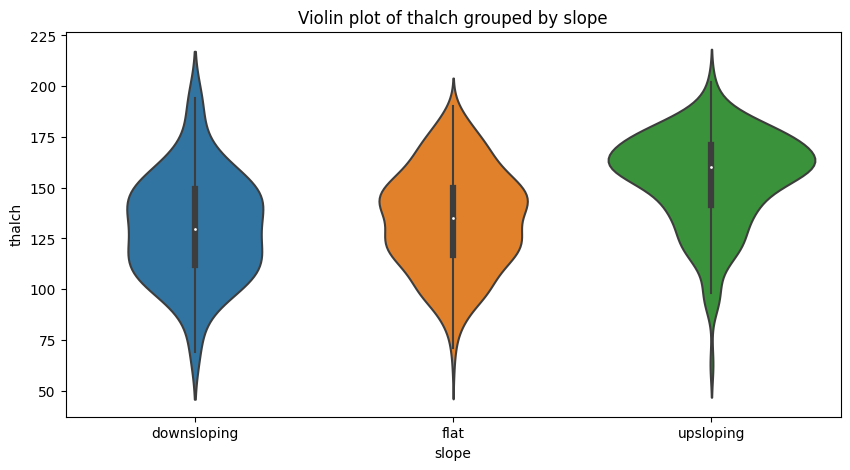

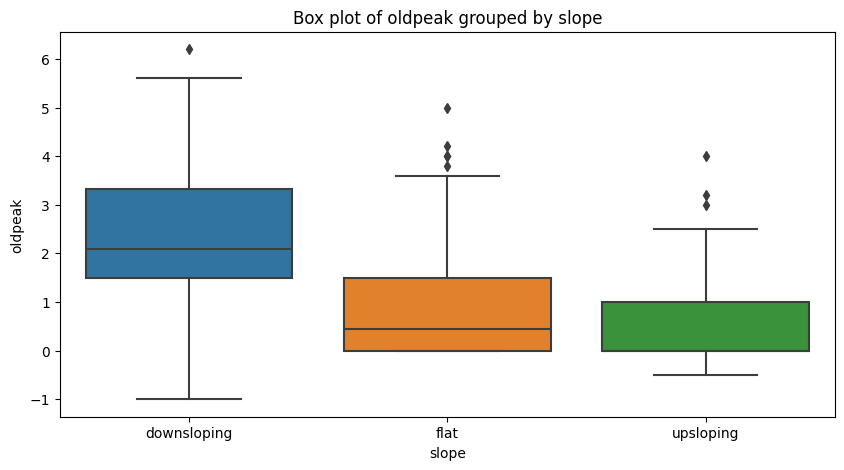

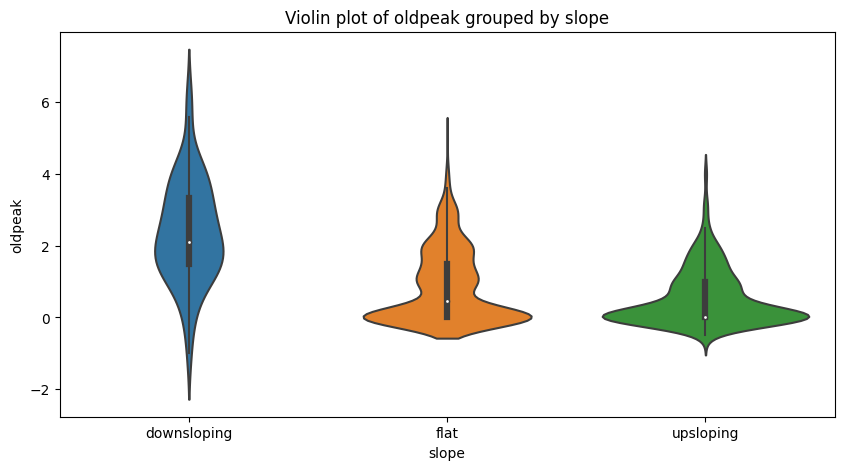

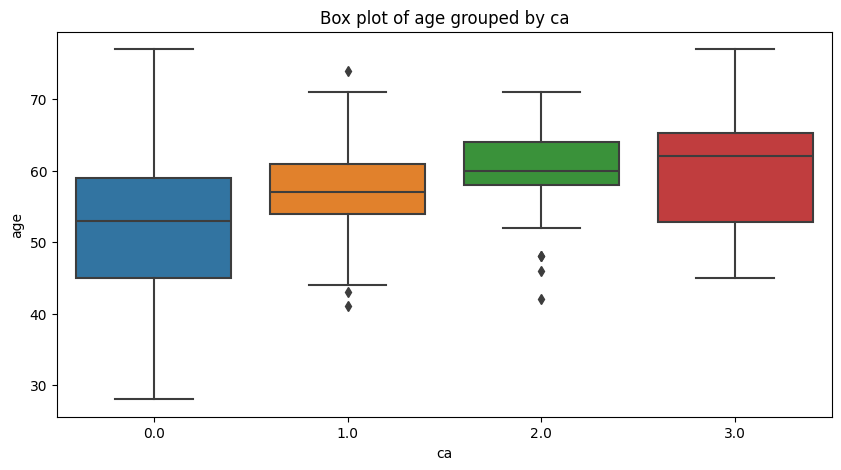

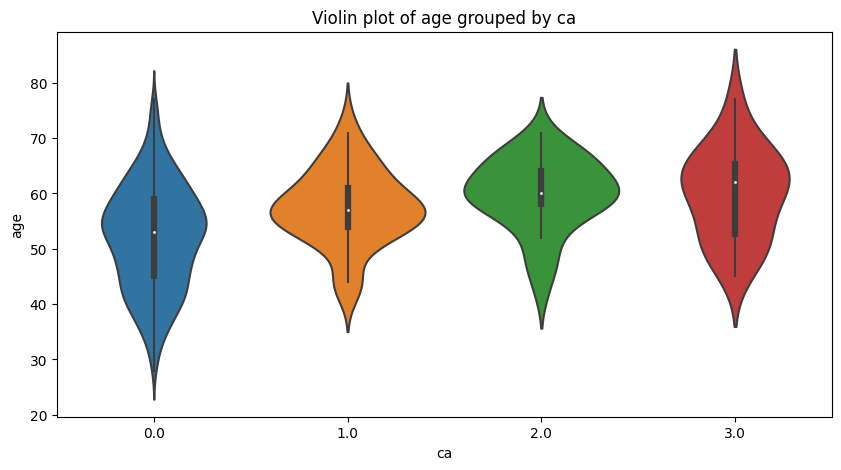

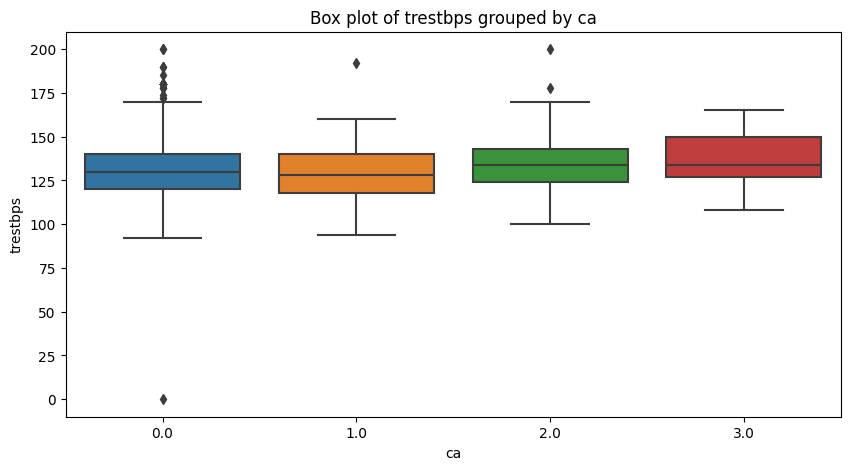

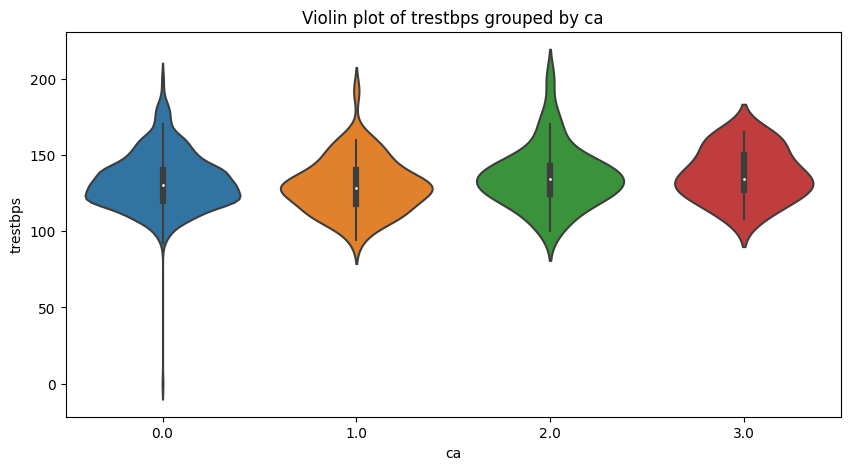

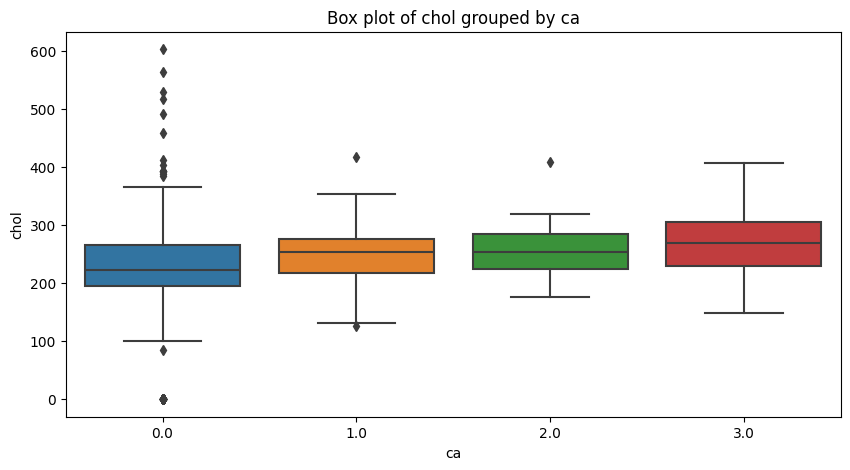

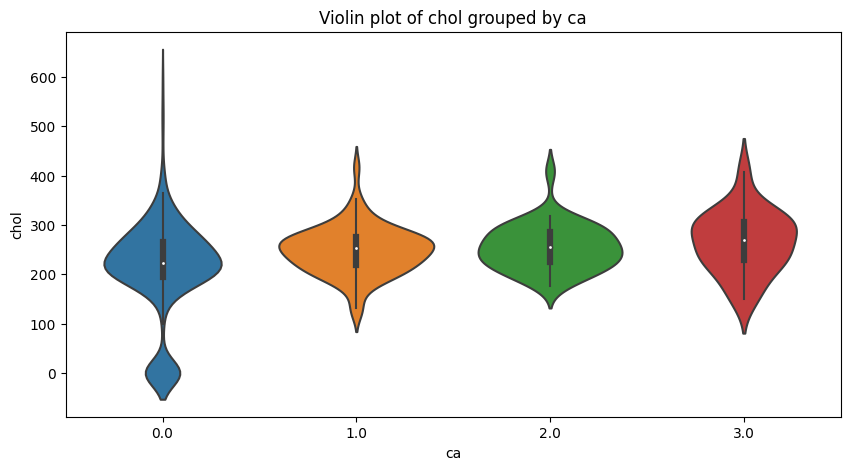

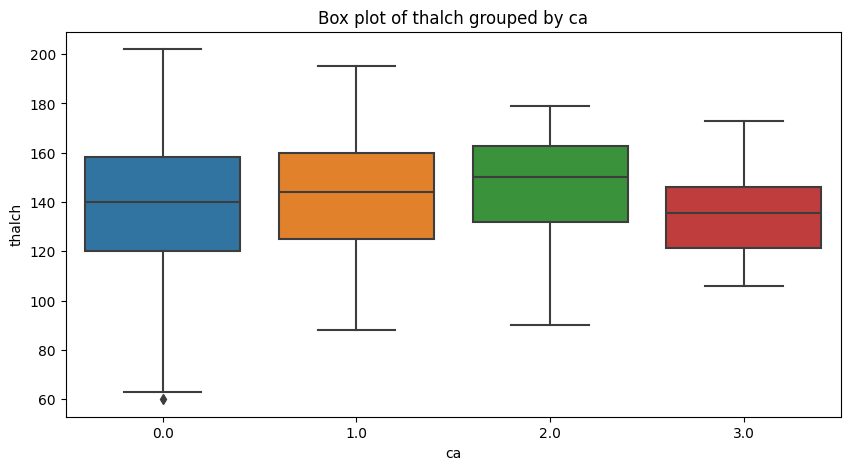

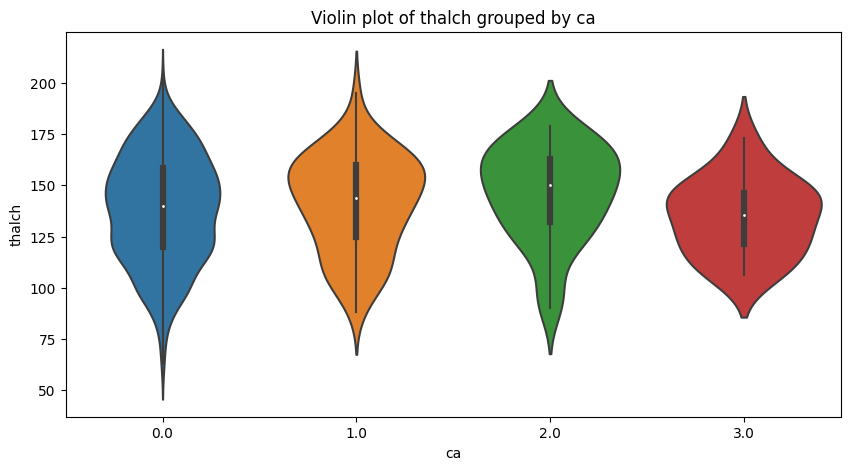

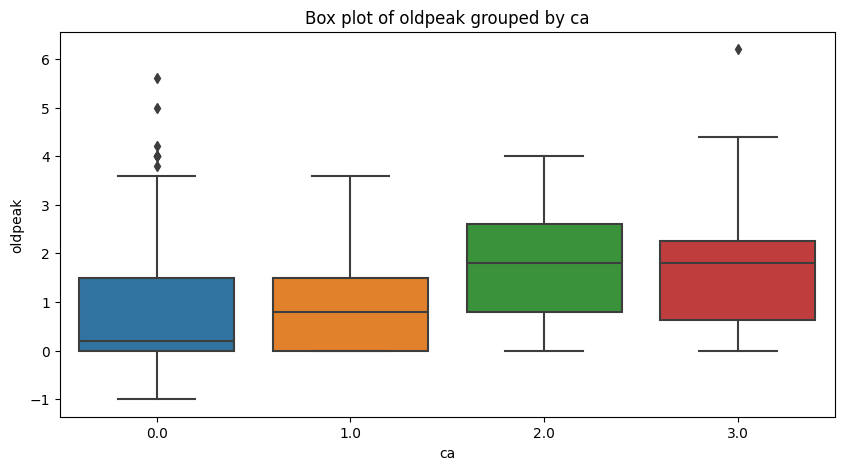

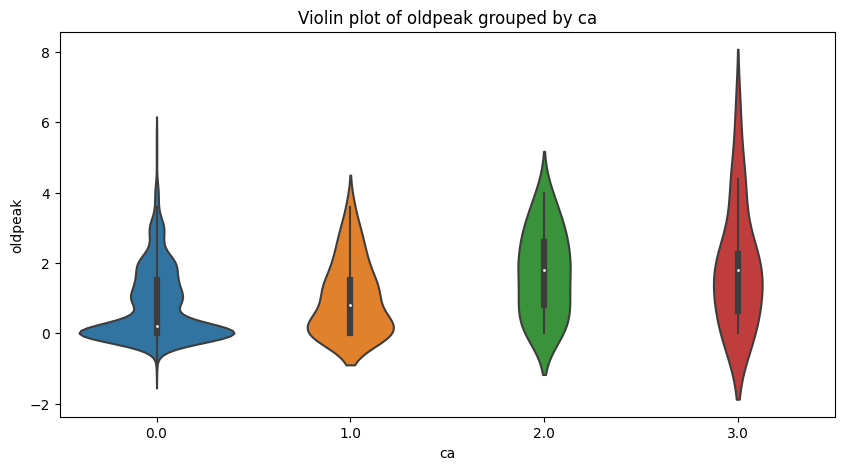

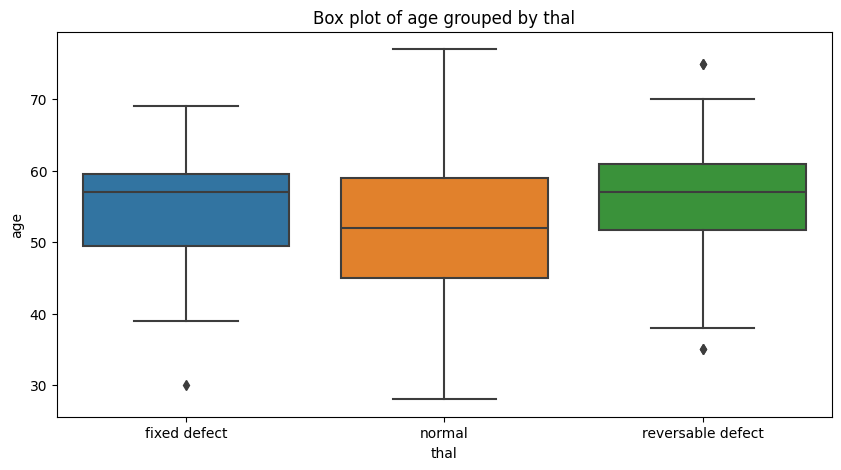

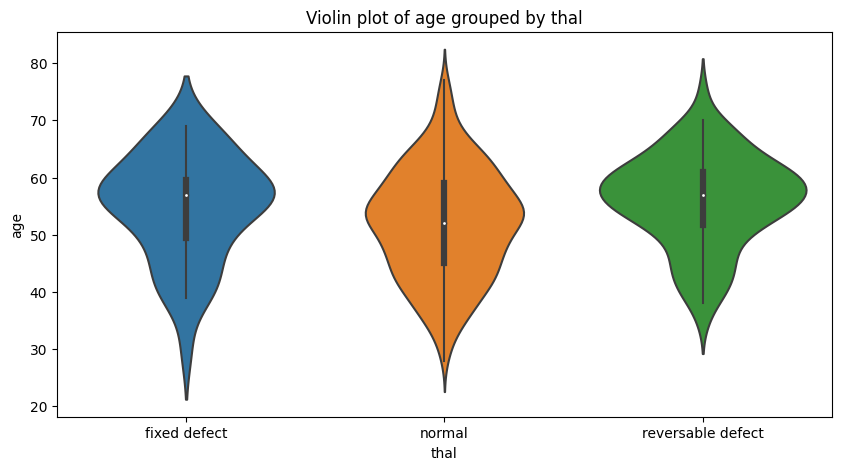

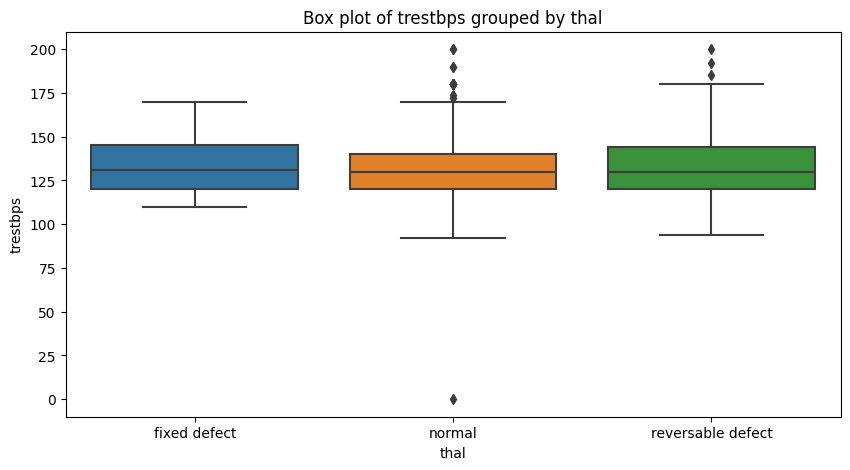

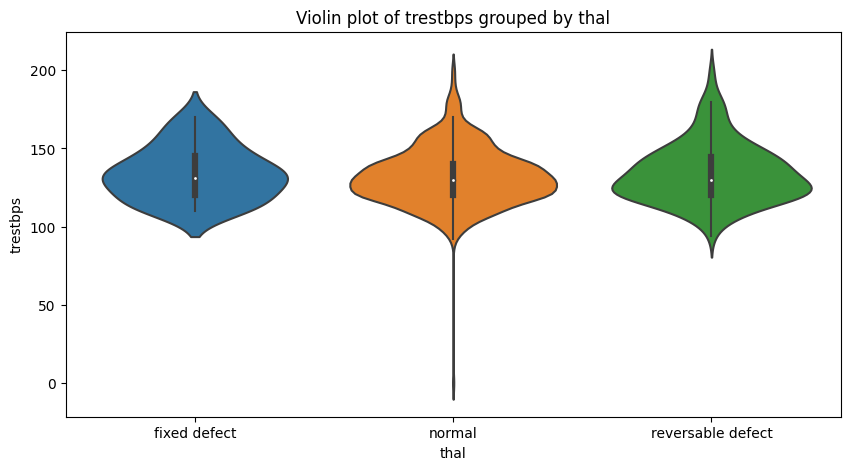

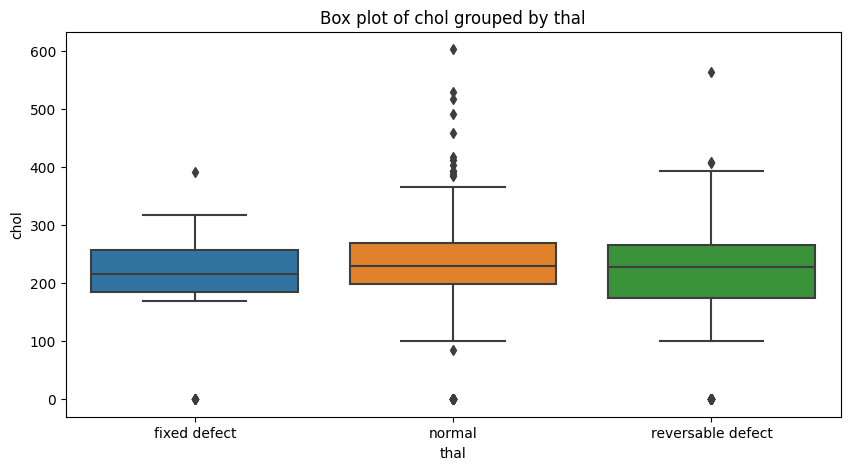

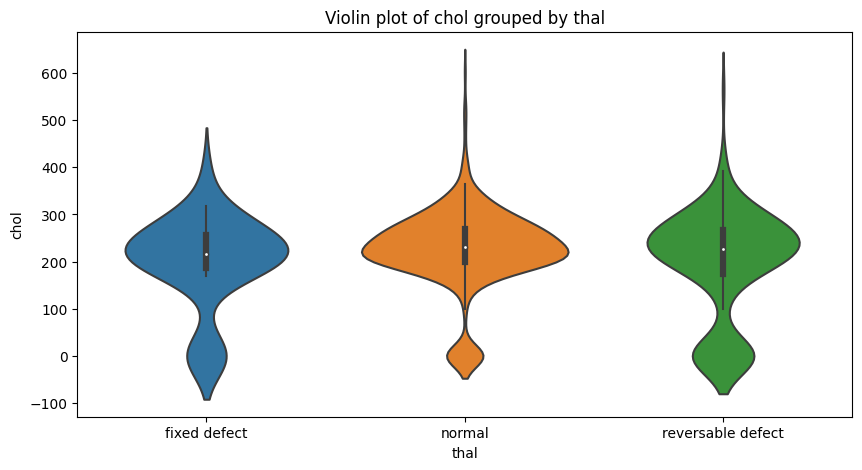

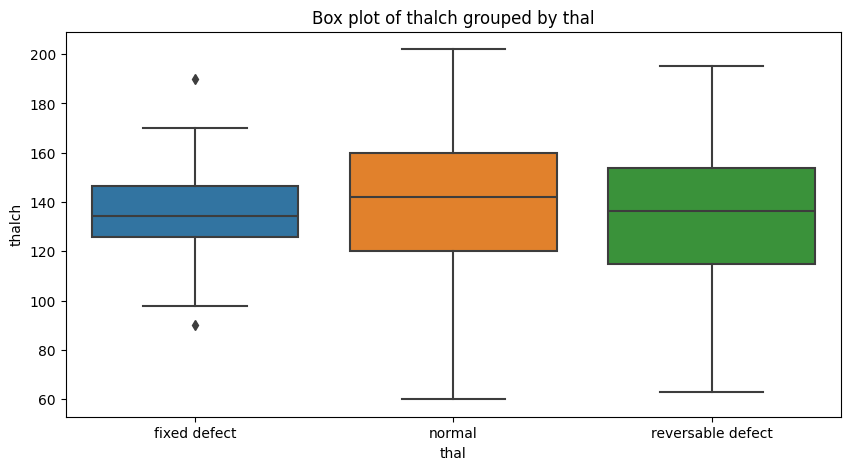

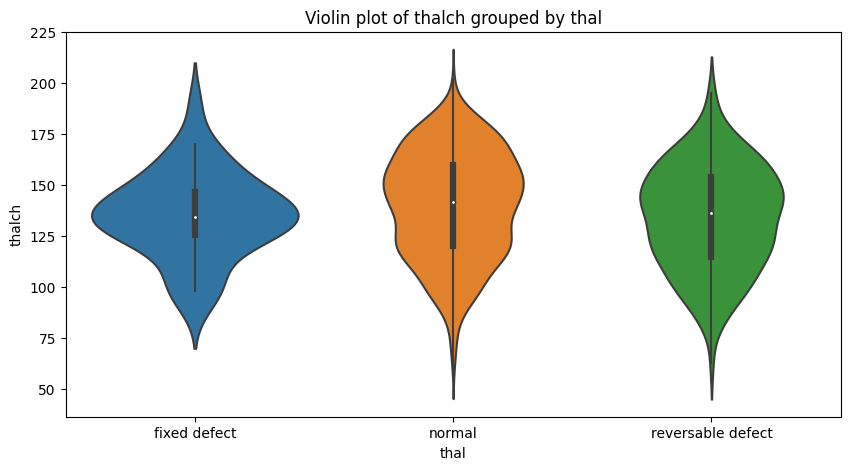

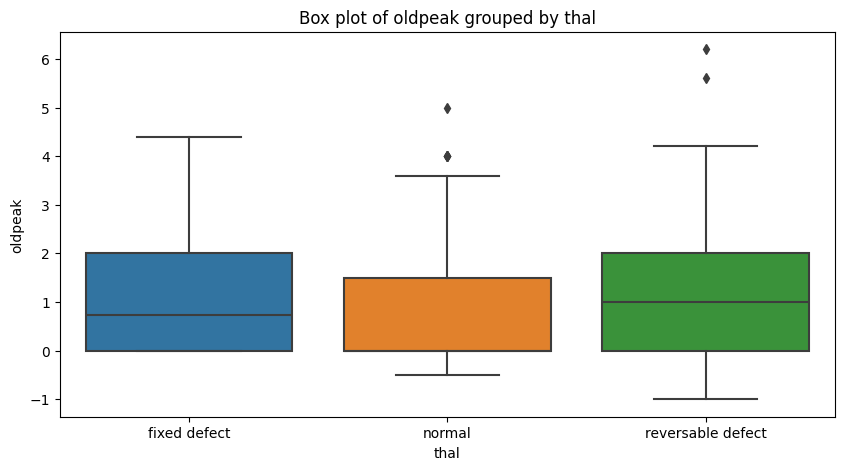

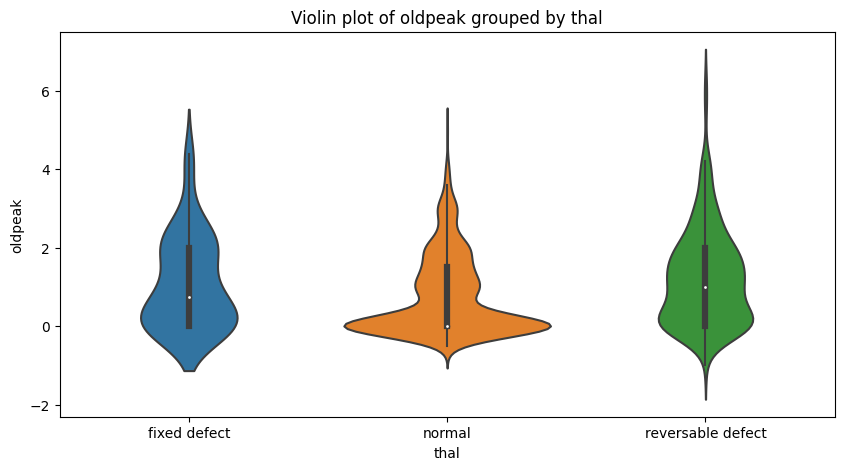

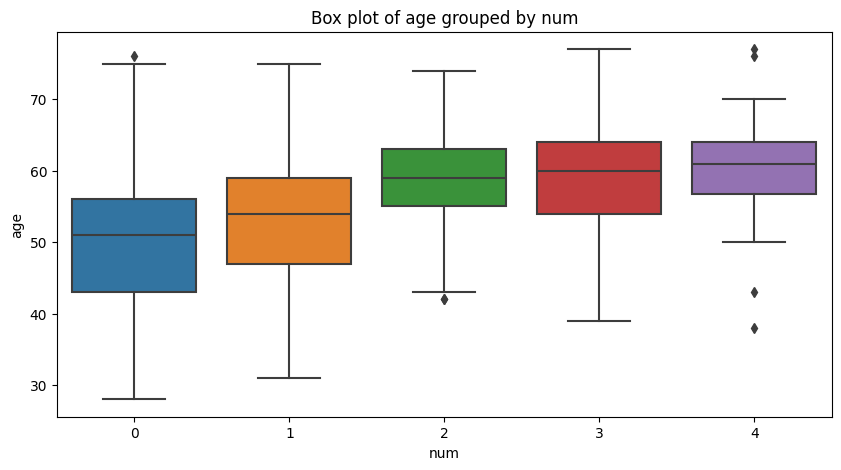

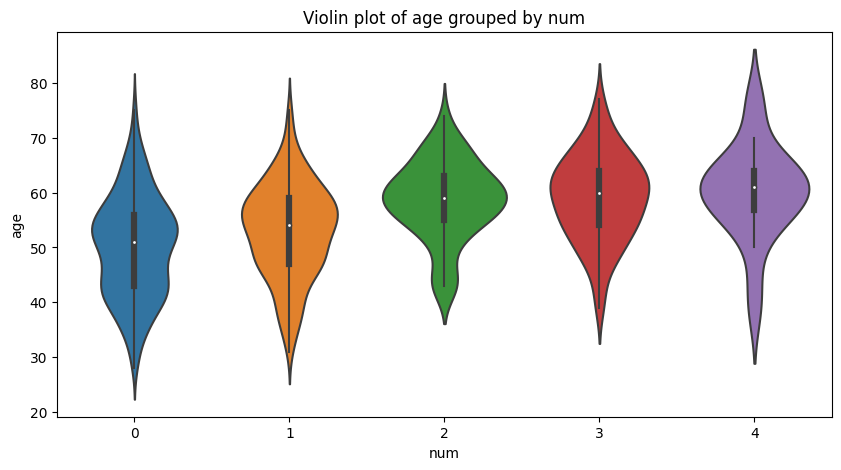

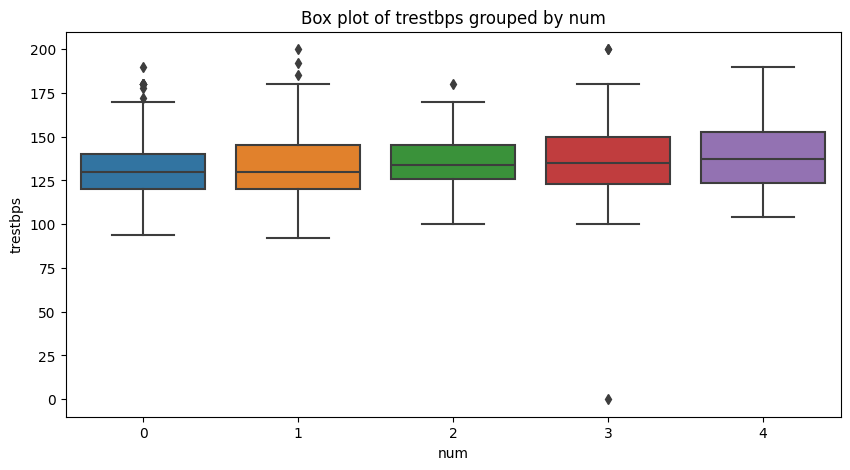

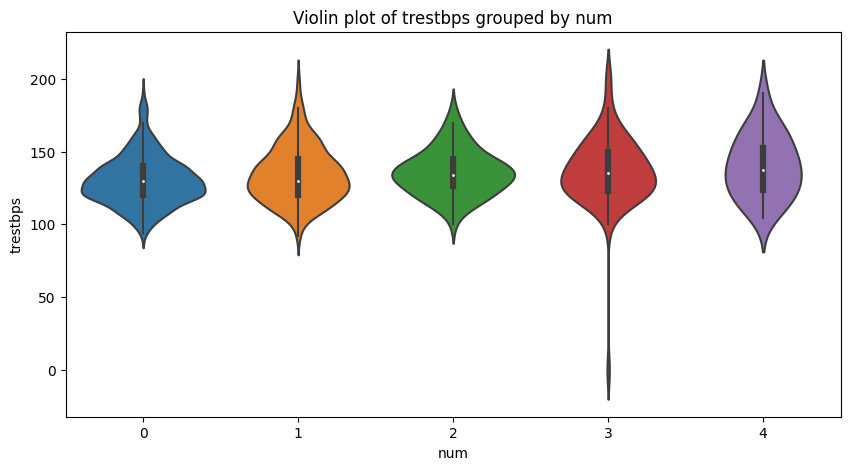

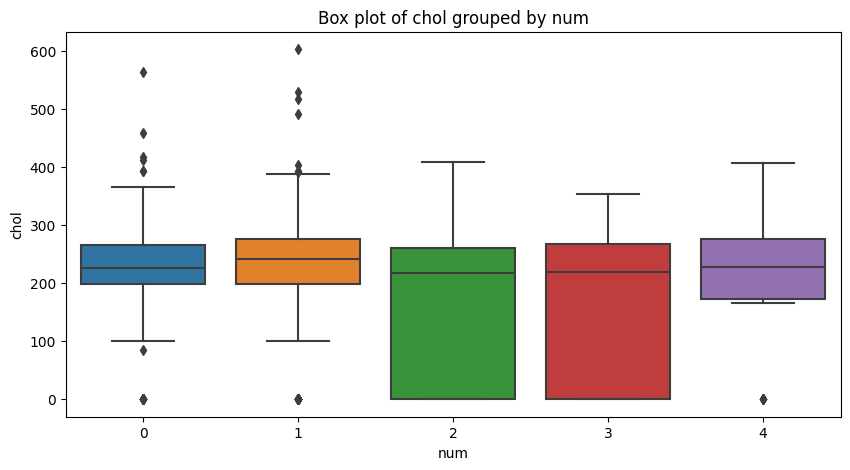

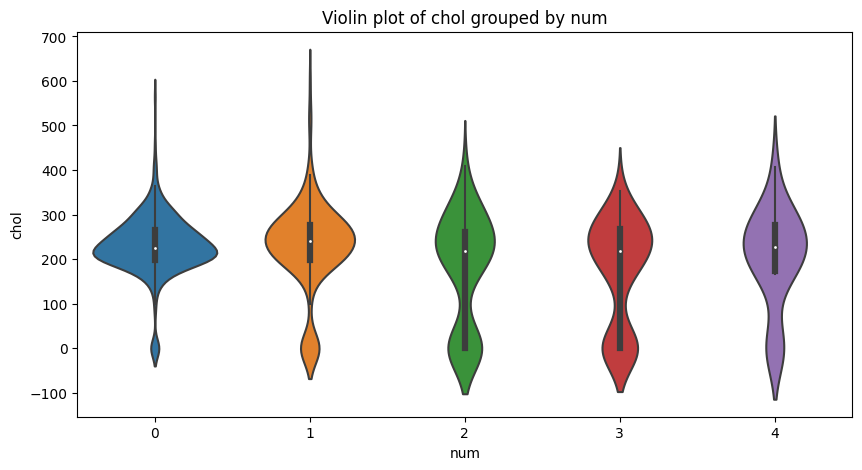

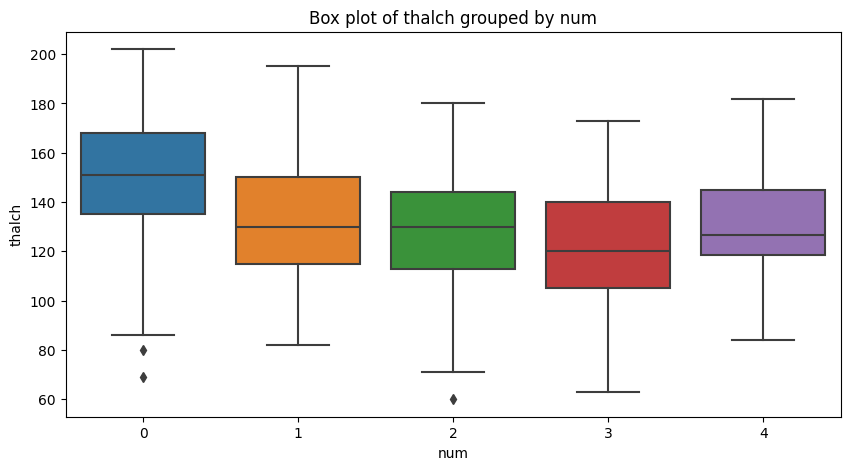

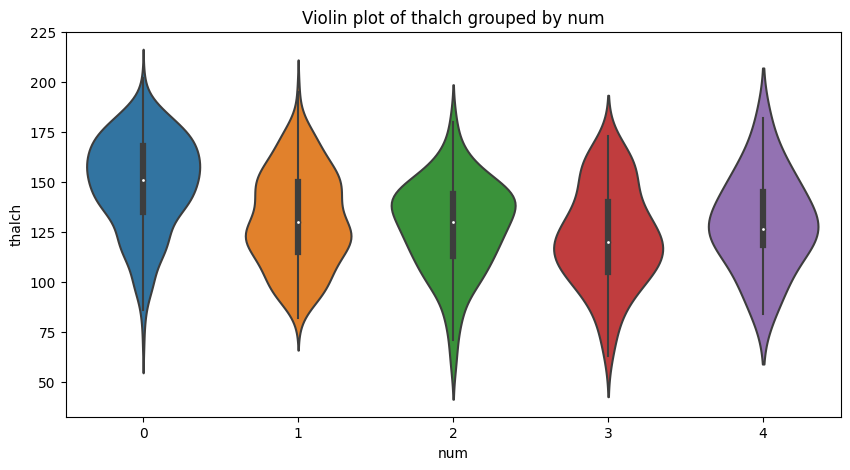

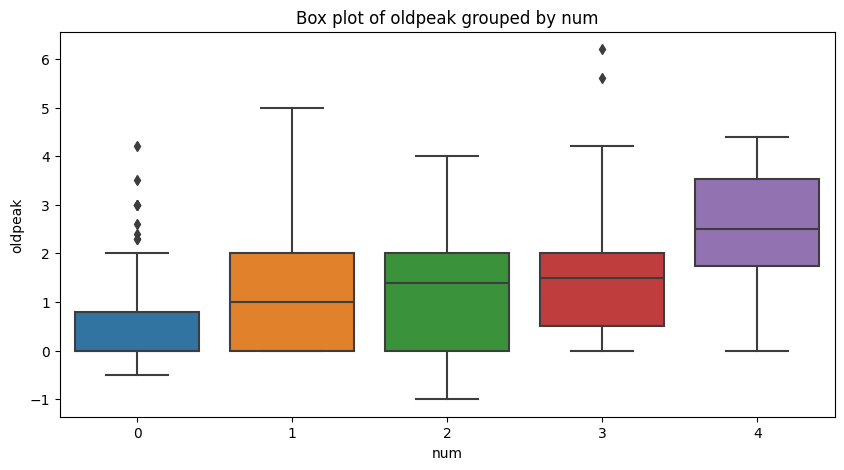

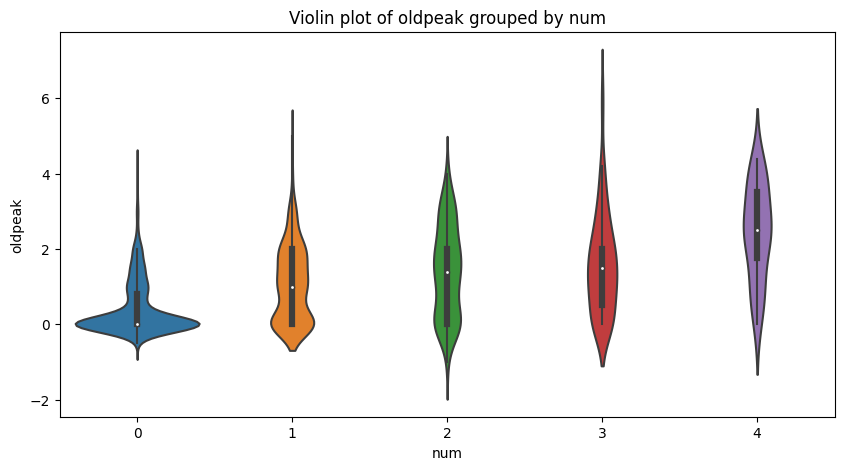

In [120]:
# Num col group by col box and violin plots
for col in train_categorical_cols:
    if col != 'id':
        for num_col in train_numeric_cols:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=data[col], y=data[num_col])
            plt.title(f'Box plot of {num_col} grouped by {col}')
            plt.show()

            plt.figure(figsize=(10, 5))
            sns.violinplot(x=data[col], y=data[num_col])
            plt.title(f'Violin plot of {num_col} grouped by {col}')
            plt.show()


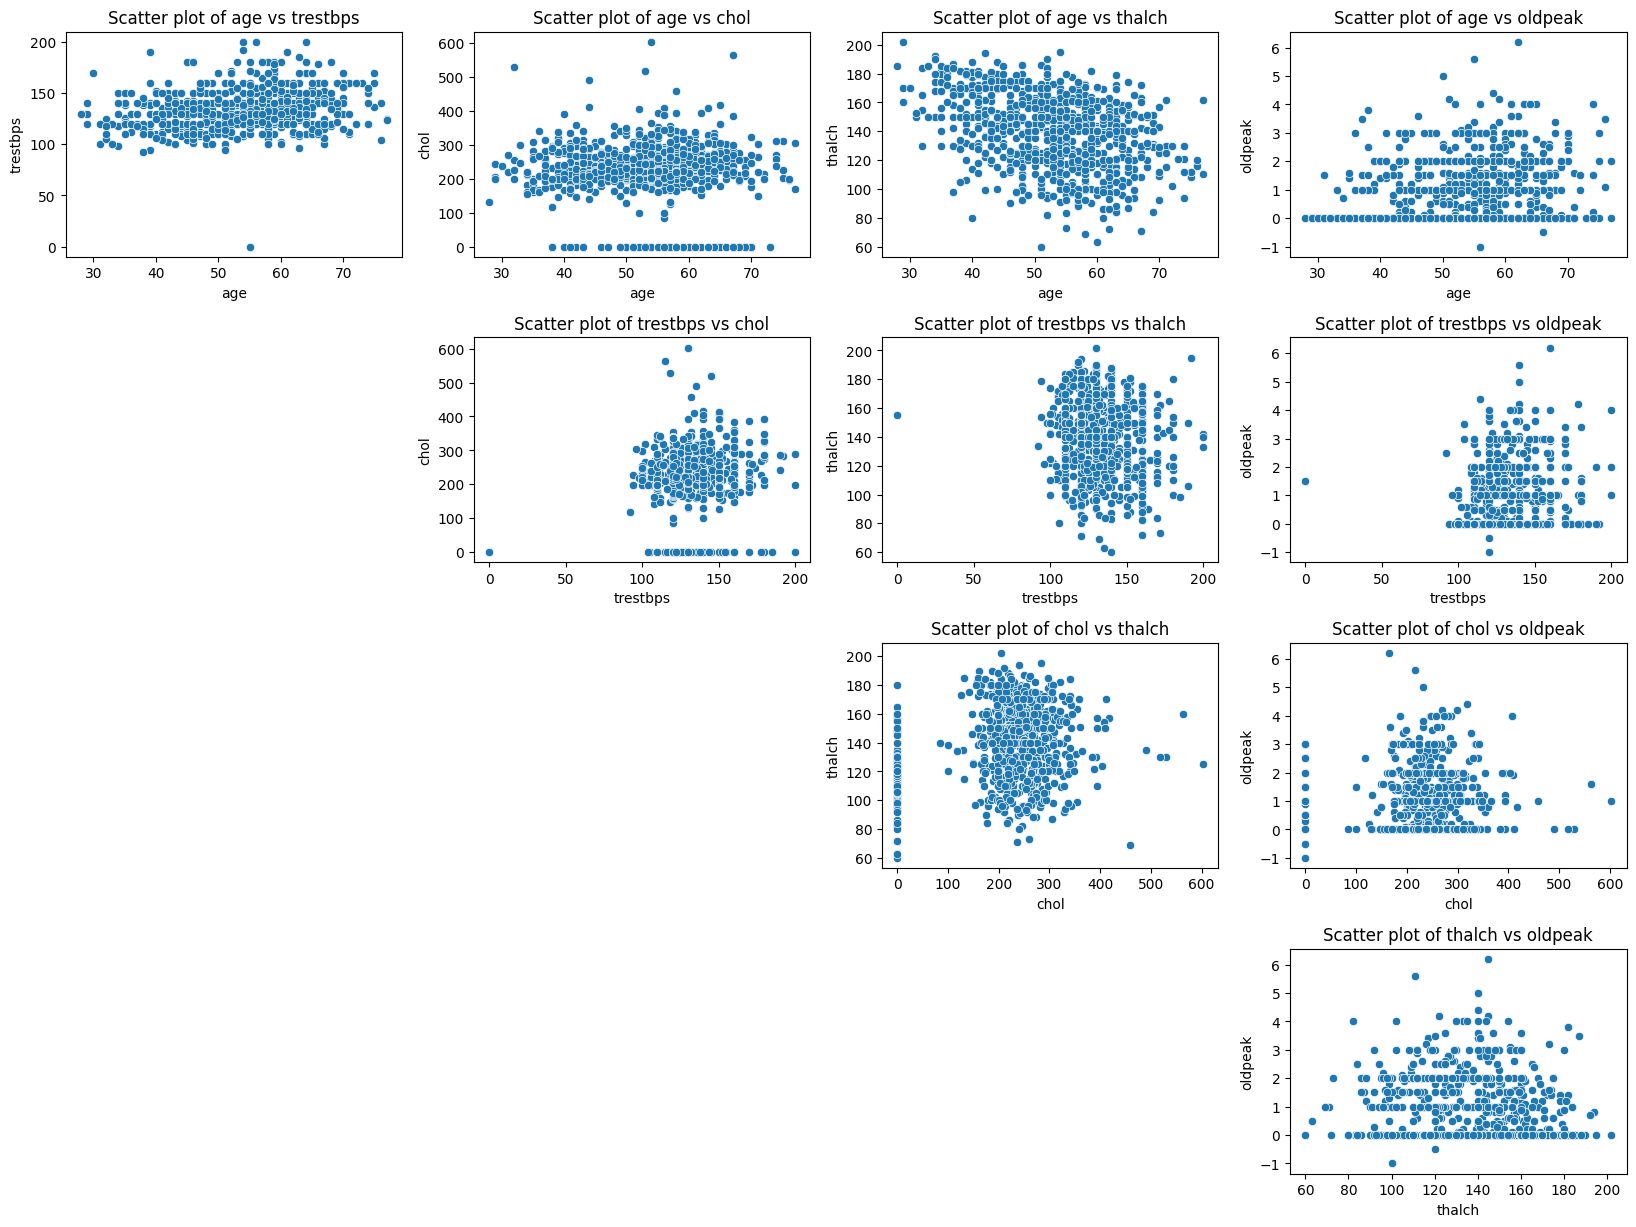

In [121]:
#Scatterplots of 2 numerical columns to see the distribution
plt.figure(figsize=(20, 15))
for i in range(len(train_numeric_cols)):
    for j in range(i + 1, len(train_numeric_cols)):
        plt.subplot(len(train_numeric_cols), len(train_numeric_cols), i * len(train_numeric_cols) + j + 1)
        sns.scatterplot(x=data[train_numeric_cols[i]], y=data[train_numeric_cols[j]])
        plt.xlabel(train_numeric_cols[i])
        plt.ylabel(train_numeric_cols[j])
        plt.title(f'Scatter plot of {train_numeric_cols[i]} vs {train_numeric_cols[j]}')
plt.tight_layout()
plt.show()


In [38]:
z_scores = data[train_numeric_cols].apply(zscore)
outliers_z = (z_scores.abs() > 3).sum()

print("Number of outliers detected in each numerical column using Z-score method:")
print(outliers_z)


Number of outliers detected in each numerical column using Z-score method:
age         0
trestbps    7
chol        4
thalch      1
oldpeak     6
dtype: int64


In [39]:
Q1 = data[train_numeric_cols].quantile(0.25)
Q3 = data[train_numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data[train_numeric_cols] < (Q1 - 1.5 * IQR)) | (data[train_numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers detected in each numerical column using IQR method:")
print(outliers_iqr)


Number of outliers detected in each numerical column using IQR method:
age           0
trestbps     25
chol        100
thalch        1
oldpeak      15
dtype: int64


## Feature Engineering

In [124]:
if 'cluster' in data.columns:
    data = data.drop(columns=['cluster'])
#remove cluster col and show data columns    
print(data.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [125]:
target_column = 'num'
#split features and target
X = data.drop(columns=[target_column, 'id'])  #features
y = data[target_column] #target

In [126]:
target_column = 'num'
train_categorical_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'ca', 'thal']
train_bool_cols = ['fbs', 'exang']
train_numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
print("Columns in X:", X.columns.tolist())

Columns in X: ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [127]:
# Preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for boolean columns
bool_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', dtype=int))
])

# Preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Merge all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, train_numeric_cols),
        ('cat', categorical_transformer, train_categorical_cols),
        ('bool', bool_transformer, train_bool_cols)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)
print(f"Preprocessed data shape: {X_preprocessed.shape}")

Preprocessed data shape: (775, 32)


In [128]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'dataset', 'cp', 'restecg', 'slope',
                                  'ca', 'thal']),
                                ('bool',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'))]),
                                 ['fbs', 'exang'])])

In [50]:
print(X)

     age     sex        dataset               cp  trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina     145.0  233.0   True   
1     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3     37    Male      Cleveland      non-anginal     130.0  250.0  False   
4     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
913   62    Male  VA Long Beach     asymptomatic     158.0  170.0  False   
914   46    Male  VA Long Beach     asymptomatic     134.0  310.0  False   
915   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertroph

## Feature Selection

### Split the data

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42) 
#20% of the data will be used for testing, and 80% will be used for training

In [141]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

column_names = preprocessor.get_feature_names_out()

#get train and test set after preprocessing steps
X_train_pre = pd.DataFrame(X_train_pre, columns=column_names)
X_test_pre = pd.DataFrame(X_test_pre, columns=column_names)

In [143]:
# Feature Selection using the RandomForestClassifier (RFC) model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_preprocessed, y)

selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train_pre)
X_test_selected = selector.transform(X_test_pre)


print(f"X_selected features shape: {X_selected.shape}")

selected_feature_i = selector.get_support(indices=True)

# numerical, categorical and boolean feature names
num_feature_names = train_numeric_cols
cat_feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(train_categorical_cols))
bool_feature_names = list(preprocessor.named_transformers_['bool']['onehot'].get_feature_names_out(train_bool_cols))
feature_names = num_feature_names + cat_feature_names + bool_feature_names

selected_feature_names = [feature_names[i] for i in selected_feature_i]

print("Selected features:")
print(selected_feature_names)

X_selected features shape: (775, 9)
Selected features:
['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'dataset_Hungary', 'cp_asymptomatic', 'exang_False', 'exang_True']


## Model Development

In [144]:
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (620, 14)
Testing shape: (155, 14)


In [145]:
print(X_train.head()) # first 5 rows of X_train

     age   sex        dataset               cp  trestbps   chol    fbs  \
133   51  Male      Cleveland     asymptomatic     140.0  261.0  False   
893   74  Male  VA Long Beach      non-anginal     140.0  237.0   True   
55    54  Male      Cleveland     asymptomatic     124.0  266.0  False   
408   49  Male        Hungary  atypical angina     100.0  253.0  False   
767   51  Male  VA Long Beach     asymptomatic     128.0    0.0  False   

            restecg  thalch  exang  oldpeak      slope   ca               thal  
133  lv hypertrophy   186.0   True      0.0  upsloping  0.0             normal  
893          normal    94.0  False      0.0       flat  0.0             normal  
55   lv hypertrophy   109.0   True      2.2       flat  1.0  reversable defect  
408          normal   174.0  False      0.0       flat  0.0             normal  
767          normal   107.0  False      0.0       flat  0.0             normal  


### 1) Logistic Regression

In [147]:
# Logistic Regression with selected features
LR_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, multi_class='ovr') #initialise
LR_model.fit(X_train_selected, y_train) #train the model
LR_predictions = LR_model.predict(X_test_selected)
LR_proba = LR_model.predict_proba(X_test_selected)

gini_coefficients = {} #dict for each class 4 entries
for class_label in range(LR_proba.shape[1]):
    class_proba = LR_proba[:, class_label]
    gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1

average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, LR_predictions)
accuracy = accuracy_score(y_test, LR_predictions)
precision = precision_score(y_test, LR_predictions, average='weighted')
recall = recall_score(y_test, LR_predictions, average='weighted')
f1 = f1_score(y_test, LR_predictions, average='weighted')
# Training accuracy
train_predictions = LR_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

In [148]:
# dictionary of evaluation metrics
LR_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy (Test)': f"{accuracy * 100:.2f}%",
    'Accuracy (Train)': f"{train_accuracy * 100:.2f}%",
    'Precision': f"{precision * 100:.2f}%",
    'Recall': f"{recall * 100:.2f}%",
    'F1 Score': f"{f1 * 100:.2f}%",
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
for metric_name, metric_value in LR_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Logistic Regression:
Confusion Matrix: [[63  3  1  2  0]
 [18 22  3  8  0]
 [ 1  9  1  5  0]
 [ 4  5  3  3  0]
 [ 1  1  1  1  0]]
Accuracy (Test): 57.42%
Accuracy (Train): 64.52%
Precision: 53.01%
Recall: 57.42%
F1 Score: 54.40%
Gini Coefficients: {'Class 0': 0.8308055274688237, 'Class 1': 0.4536199095022624, 'Class 2': 0.5791366906474822, 'Class 3': 0.5295238095238095, 'Class 4': 0.804635761589404}
Average Gini Coefficient: 0.6395443397463565


In [151]:
feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': LR_model.coef_[0]
})
print("Feature Importance of each coefficient:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Feature Importance of each coefficient:
           Feature  Coefficient
7      exang_False     0.903977
5  dataset_Hungary     0.411674
3           thalch     0.410784
2             chol     0.189302
8       exang_True    -0.103149
1         trestbps    -0.125740
0              age    -0.239561
4          oldpeak    -0.617310
6  cp_asymptomatic    -1.413895


In [76]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pre, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the best model
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train_pre, y_train)

# Make predictions
y_train_pred = best_logreg_model.predict(X_train_pre)
y_test_pred = best_logreg_model.predict(X_test_pre)
y_test_proba = best_logreg_model.predict_proba(X_test_pre)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics
LR_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
for metric_name, metric_value in LR_metrics.items():
    print(f"{metric_name}: {metric_value}")


Best parameters found: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Evaluation Metrics for Logistic Regression:
Confusion Matrix: [[62  3  1  3  0]
 [15 24  3  9  0]
 [ 2  6  0  8  0]
 [ 2  4  5  4  0]
 [ 0  2  1  1  0]]
Accuracy: 0.5806451612903226
Precision: 0.5587060012866465
Recall: 0.5806451612903226
F1 Score: 0.5628387096774193
Gini Coefficients: {'Class 0': 0.8641725648803504, 'Class 1': 0.5052790346907994, 'Class 2': 0.5215827338129497, 'Class 3': 0.5952380952380953, 'Class 4': 0.7317880794701985}
Average Gini Coefficient: 0.6436121016184787


In [77]:
# ALSO AFTER THE IMPROVEMENTS VALUES STAY THE SAME

### 2) Decision Trees

In [79]:
# Train a Decision Tree model
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_pre, y_train)

# Predictions
y_train_pred = dtree_model.predict(X_train_pre)
y_test_pred = dtree_model.predict(X_test_pre)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.00%
Test Accuracy: 49.03%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        69
           1       0.42      0.39      0.40        51
           2       0.13      0.12      0.13        16
           3       0.14      0.20      0.17        15
           4       0.00      0.00      0.00         4

    accuracy                           0.49       155
   macro avg       0.29      0.29      0.29       155
weighted avg       0.49      0.49      0.49       155

Confusion Matrix (Test):
[[51 14  2  2  0]
 [13 20  6 11  1]
 [ 5  4  2  4  1]
 [ 0  7  5  3  0]
 [ 0  3  0  1  0]]


In [ ]:
# 100% SHOWS THAT IS OVERFITTING THE DATA
## EXPLAIN WHY IT IS OVERFITTING AND STRATEGIES

In [81]:
# Hyperparameter tuning to prevent overfitting
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pre, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_model.predict(X_train_pre)
y_test_pred = best_model.predict(X_test_pre)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print accuracy as percentages
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print classification report and confusion matrix
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Store evaluation metrics in a dictionary
DT_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print evaluation metrics
print("Evaluation Metrics for Decision Tree:")
for metric_name, metric_value in DT_metrics.items():
    print(f"{metric_name}: {metric_value}")

Training Accuracy: 72.10%
Test Accuracy: 56.77%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        69
           1       0.54      0.49      0.52        51
           2       0.25      0.31      0.28        16
           3       0.27      0.27      0.27        15
           4       0.00      0.00      0.00         4

    accuracy                           0.57       155
   macro avg       0.36      0.37      0.36       155
weighted avg       0.56      0.57      0.56       155

Confusion Matrix (Test):
[[54 12  3  0  0]
 [15 25  7  4  0]
 [ 2  3  5  6  0]
 [ 2  5  4  4  0]
 [ 1  1  1  1  0]]
Evaluation Metrics for Decision Tree:
Confusion Matrix: [[54 12  3  0  0]
 [15 25  7  4  0]
 [ 2  3  5  6  0]
 [ 2  5  4  4  0]
 [ 1  1  1  1  0]]
Accuracy: 0.567741935483871
Precision: 0.5552822106819301
Recall: 0.567741935483871
F1 Score: 0.5602902732267547


In [82]:
#Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': best_model.feature_importances_
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Feature Importance:
                          Feature  Importance
11           cat__cp_asymptomatic    0.194830
4                    num__oldpeak    0.141375
8            cat__dataset_Hungary    0.137299
0                        num__age    0.135452
2                       num__chol    0.070820
3                     num__thalch    0.051856
21                    cat__ca_0.0    0.044384
17  cat__restecg_st-t abnormality    0.039383
9        cat__dataset_Switzerland    0.032649
27    cat__thal_reversable defect    0.028278
10     cat__dataset_VA Long Beach    0.026747
1                   num__trestbps    0.024504
20           cat__slope_upsloping    0.014893
30              bool__exang_False    0.012125
12        cat__cp_atypical angina    0.011424
18         cat__slope_downsloping    0.010926
16            cat__restecg_normal    0.009419
5                 cat__sex_Female    0.008532
7          cat__dataset_Cleveland    0.005104
15    cat__restecg_lv hypertrophy    0.000000
14         cat

### 3) Random Forest Classifier

In [83]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pre, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train_pre)
y_test_pred = rf_model.predict(X_test_pre)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Optional: Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': rf_model.feature_importances_
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Training Accuracy: 100.00%
Test Accuracy: 58.71%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        69
           1       0.60      0.41      0.49        51
           2       0.14      0.12      0.13        16
           3       0.25      0.33      0.29        15
           4       1.00      0.25      0.40         4

    accuracy                           0.59       155
   macro avg       0.54      0.40      0.42       155
weighted avg       0.59      0.59      0.57       155

Confusion Matrix (Test):
[[62  4  0  3  0]
 [17 21  7  6  0]
 [ 2  7  2  5  0]
 [ 3  3  4  5  0]
 [ 1  0  1  1  1]]
Feature Importance:
                          Feature  Importance
3                     num__thalch    0.107930
0                        num__age    0.104385
2                       num__chol    0.096058
4                    num__oldpeak    0.085738
1                   num__trestbps    0.082702
11           cat__cp

In [84]:
# OVERFITTING

In [86]:
# ADDED HYPERPARAMETER TUNING TO PREVENT OVERFIT

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pre, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_model.predict(X_train_pre)
y_test_pred = best_model.predict(X_test_pre)
y_test_proba = best_model.predict_proba(X_test_pre)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print accuracy as percentages
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print classification report and confusion matrix
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics
RF_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Random Forest:")
for metric_name, metric_value in RF_metrics.items():
    print(f"{metric_name}: {metric_value}")

Training Accuracy: 76.77%
Test Accuracy: 58.71%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        69
           1       0.67      0.39      0.49        51
           2       0.17      0.12      0.14        16
           3       0.15      0.20      0.17        15
           4       0.00      0.00      0.00         4

    accuracy                           0.59       155
   macro avg       0.34      0.33      0.32       155
weighted avg       0.57      0.59      0.56       155

Confusion Matrix (Test):
[[66  1  0  2  0]
 [19 20  5  7  0]
 [ 3  4  2  7  0]
 [ 4  4  4  3  0]
 [ 1  1  1  1  0]]
Evaluation Metrics for Random Forest:
Confusion Matrix: [[66  1  0  2  0]
 [19 20  5  7  0]
 [ 3  4  2  7  0]
 [ 4  4  4  3  0]
 [ 1  1  1  1  0]]
Accuracy: 0.5870967741935483
Precision: 0.5669961845300036
Recall: 0.5870967741935483
F1 Score: 0.5565454855777436
Gini Coefficients: {'Class 0': 0.8685540950455004, 'Cla

In [87]:
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': best_model.feature_importances_
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Feature Importance:
                          Feature  Importance
8            cat__dataset_Hungary    0.095448
4                    num__oldpeak    0.090466
0                        num__age    0.082256
11           cat__cp_asymptomatic    0.080725
3                     num__thalch    0.078815
31               bool__exang_True    0.068772
2                       num__chol    0.067213
30              bool__exang_False    0.055456
1                   num__trestbps    0.038195
9        cat__dataset_Switzerland    0.032612
26               cat__thal_normal    0.029455
21                    cat__ca_0.0    0.028782
12        cat__cp_atypical angina    0.027447
10     cat__dataset_VA Long Beach    0.024141
27    cat__thal_reversable defect    0.022096
6                   cat__sex_Male    0.018252
5                 cat__sex_Female    0.017117
7          cat__dataset_Cleveland    0.015333
16            cat__restecg_normal    0.013369
13            cat__cp_non-anginal    0.011003
28            

In [88]:
#By tuning the hyperparameters, the model should be less likely to overfit, 
#leading to improved performance on the test set and more balanced metrics across different classes. 
#This should help mitigate the issue of the model performing very well on the training data but poorly on the test data.

### 4) k- Nearest Neighbour

In [89]:
# Convert preprocessed data to dense arrays if they are not already
# Check if X_train_pre is a DataFrame -> convert it to a NumPy array if necessary
if isinstance(X_train_pre, pd.DataFrame):
    X_train_pre_dense = X_train_pre.to_numpy()
else:
    X_train_pre_dense = X_train_pre

# Check if X_test_pre is a DataFrame -> convert it to a NumPy array if necessary
if isinstance(X_test_pre, pd.DataFrame):
    X_test_pre_dense = X_test_pre.to_numpy()
else:
    X_test_pre_dense = X_test_pre
    

# Train a k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train_pre_dense, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train_pre_dense)
y_test_pred = knn_model.predict(X_test_pre_dense)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 71.61%
Test Accuracy: 60.00%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        69
           1       0.57      0.47      0.52        51
           2       0.22      0.25      0.24        16
           3       0.17      0.13      0.15        15
           4       0.00      0.00      0.00         4

    accuracy                           0.60       155
   macro avg       0.34      0.35      0.35       155
weighted avg       0.56      0.60      0.58       155

Confusion Matrix (Test):
[[63  6  0  0  0]
 [15 24  6  6  0]
 [ 4  5  4  3  0]
 [ 0  7  6  2  0]
 [ 1  0  2  1  0]]


In [90]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics
KNN_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for k-Nearest Neighbors:")
for metric_name, metric_value in KNN_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for k-Nearest Neighbors:
Confusion Matrix: [[63  6  0  0  0]
 [15 24  6  6  0]
 [ 4  5  4  3  0]
 [ 0  7  6  2  0]
 [ 1  0  2  1  0]]
Accuracy: 0.6
Precision: 0.5649800430601052
Recall: 0.6
F1 Score: 0.5774637236825102
Gini Coefficients: {'Class 0': 0.8685540950455004, 'Class 1': 0.5663650075414781, 'Class 2': 0.5287769784172662, 'Class 3': 0.5809523809523809, 'Class 4': 0.695364238410596}
Average Gini Coefficient: 0.6480025400734443


### 5) Extreme Gradient Boost

In [91]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}


# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Initialize GridSearchCV without early stopping
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=1)  # Set n_jobs to 1

# Fit the model
grid_search.fit(X_train_pre_dense, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training data
y_train_pred = best_xgb_model.predict(X_train_pre_dense)

# Make predictions on the test data
y_test_pred = best_xgb_model.predict(X_test_pre_dense)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print the classification report for the test data
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for the test data
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Optional: Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': best_xgb_model.feature_importances_
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
Training Accuracy: 87.58%
Test Accuracy: 59.35%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        69
           1       0.59      0.39      0.47        51
           2       0.27      0.19      0.22        16
           3       0.24      0.33      0.28        15
           4       0.00      0.00      0.00         4

    accuracy                           0.59       155
   macro avg       0.36      0.37      0.36       155
weighted avg       0.56      0.59      0.57       155

Confusion Matrix (Test):
[[64  3  1  1  0]
 [19 20  5  7  0]
 [ 2  4  3  7  0]
 [ 3  6  1  5  0]
 [ 1  1  1  1  0]]
Feature Importance:
                          Feature  Importance
11           cat__cp_asy

In [92]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Optional: Calculate Gini coefficients for each class
y_test_proba = best_xgb_model.predict_proba(X_test_pre_dense)
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics in a dictionary
XGB_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for XGBoost:")
for metric_name, metric_value in XGB_metrics.items():
    print(f"{metric_name}: {metric_value}")

# Optional: Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': column_names,
    'Importance': best_xgb_model.feature_importances_
})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Evaluation Metrics for XGBoost:
Confusion Matrix: [[64  3  1  1  0]
 [19 20  5  7  0]
 [ 2  4  3  7  0]
 [ 3  6  1  5  0]
 [ 1  1  1  1  0]]
Accuracy: 0.5935483870967742
Precision: 0.5648583384719665
Recall: 0.5935483870967742
F1 Score: 0.5652964928995963
Gini Coefficients: {'Class 0': 0.8355240984159085, 'Class 1': 0.5463800904977374, 'Class 2': 0.5557553956834533, 'Class 3': 0.6390476190476191, 'Class 4': 0.7350993377483444}
Average Gini Coefficient: 0.6623613082786125
Feature Importance:
                          Feature  Importance
11           cat__cp_asymptomatic    0.129709
31               bool__exang_True    0.128285
30              bool__exang_False    0.104761
8            cat__dataset_Hungary    0.092135
26               cat__thal_normal    0.037178
9        cat__dataset_Switzerland    0.031549
10     cat__dataset_VA Long Beach    0.026946
21                    cat__ca_0.0    0.025699
4                    num__oldpeak    0.025310
7          cat__dataset_Cleveland    0.02407

### 6) Naives Bayes

In [96]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train_pre_dense, y_train)

# Make predictions on the training data
y_train_pred = nb_model.predict(X_train_pre_dense)

# Make predictions on the test data
y_test_pred = nb_model.predict(X_test_pre_dense)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print the classification report for the test data
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for the test data
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 43.23%
Test Accuracy: 39.35%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        69
           1       0.86      0.24      0.37        51
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        15
           4       0.04      0.75      0.07         4

    accuracy                           0.39       155
   macro avg       0.34      0.33      0.23       155
weighted avg       0.64      0.39      0.45       155

Confusion Matrix (Test):
[[46  2  2  0 19]
 [12 12  0  0 27]
 [ 0  0  0  0 16]
 [ 0  0  2  0 13]
 [ 0  0  1  0  3]]


In [97]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
y_test_proba = nb_model.predict_proba(X_test_pre_dense)
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics in a dictionary
NB_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Gaussian Naive Bayes:")
for metric_name, metric_value in NB_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Gaussian Naive Bayes:
Confusion Matrix: [[46  2  2  0 19]
 [12 12  0  0 27]
 [ 0  0  0  0 16]
 [ 0  0  2  0 13]
 [ 0  0  1  0  3]]
Accuracy: 0.3935483870967742
Precision: 0.6360791599946217
Recall: 0.3935483870967742
F1 Score: 0.4458561556522739
Gini Coefficients: {'Class 0': 0.7499157398045164, 'Class 1': 0.19532428355957765, 'Class 2': 0.36870503597122317, 'Class 3': 0.46380952380952367, 'Class 4': 0.3377483443708611}
Average Gini Coefficient: 0.42310058550314034


In [98]:
#HYPERPARAMETER TUNING ADDED TO INCREASE PERFORMANCE
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Fit the model
grid_search.fit(X_train_pre_dense, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_nb_model = grid_search.best_estimator_

# Make predictions on the training data
y_train_pred = best_nb_model.predict(X_train_pre_dense)

# Make predictions on the test data
y_test_pred = best_nb_model.predict(X_test_pre_dense)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print the classification report for the test data
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for the test data
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'var_smoothing': 1e-05}
Training Accuracy: 54.52%
Test Accuracy: 45.16%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        69
           1       0.75      0.24      0.36        51
           2       0.00      0.00      0.00        16
           3       0.18      0.13      0.15        15
           4       0.05      0.75      0.10         4

    accuracy                           0.45       155
   macro avg       0.36      0.38      0.28       155
weighted avg       0.63      0.45      0.49       155

Confusion Matrix (Test):
[[53  2  2  3  9]
 [12 12  3  4 20]
 [ 0  0  0  2 14]
 [ 0  1  2  2 10]
 [ 0  1  0  0  3]]


In [100]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
y_test_proba = best_nb_model.predict_proba(X_test_pre_dense)
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics in a dictionary
NB_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Gaussian Naive Bayes:")
for metric_name, metric_value in NB_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Gaussian Naive Bayes:
Confusion Matrix: [[53  2  2  3  9]
 [12 12  3  4 20]
 [ 0  0  0  2 14]
 [ 0  1  2  2 10]
 [ 0  1  0  0  3]]
Accuracy: 0.45161290322580644
Precision: 0.6287296574393348
Recall: 0.45161290322580644
F1 Score: 0.48747379726676787
Gini Coefficients: {'Class 0': 0.8041793056959889, 'Class 1': 0.4283559577677225, 'Class 2': 0.4676258992805755, 'Class 3': 0.500952380952381, 'Class 4': 0.35761589403973515}
Average Gini Coefficient: 0.5117458875472807


### 7) Support Vector Machine

In [102]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM model
svm_model = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Fit the model
grid_search.fit(X_train_pre_dense, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_svm_model = grid_search.best_estimator_

# Make predictions on the training data
y_train_pred = best_svm_model.predict(X_train_pre_dense)

# Make predictions on the test data
y_test_pred = best_svm_model.predict(X_test_pre_dense)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Print the classification report for the test data
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for the test data
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Training Accuracy: 68.55%
Test Accuracy: 58.71%
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        69
           1       0.68      0.45      0.54        51
           2       0.10      0.06      0.08        16
           3       0.16      0.33      0.21        15
           4       0.50      0.25      0.33         4

    accuracy                           0.59       155
   macro avg       0.44      0.40      0.40       155
weighted avg       0.61      0.59      0.59       155

Confusion Matrix (Test):
[[61  4  1  3  0]
 [13 23  2 12  1]
 [ 1  4  1 10  0]
 [ 2  2  6  5  0]
 [ 0  1  0  2  1]]


In [103]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate Gini coefficients for each class
y_test_proba = best_svm_model.predict_proba(X_test_pre_dense)
gini_coefficients = {f'Class {i}': (roc_auc_score((y_test == i).astype(int), y_test_proba[:, i]) * 2 - 1) for i in range(y_test_proba.shape[1])}
average_gini_coefficient = np.mean(list(gini_coefficients.values()))

# Store evaluation metrics in a dictionary
SVM_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Print evaluation metrics
print("Evaluation Metrics for Support Vector Machine:")
for metric_name, metric_value in SVM_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Support Vector Machine:
Confusion Matrix: [[61  4  1  3  0]
 [13 23  2 12  1]
 [ 1  4  1 10  0]
 [ 2  2  6  5  0]
 [ 0  1  0  2  1]]
Accuracy: 0.5870967741935483
Precision: 0.6135876623376623
Recall: 0.5870967741935483
F1 Score: 0.5871814591766453
Gini Coefficients: {'Class 0': 0.8415908324907315, 'Class 1': 0.5154600301659125, 'Class 2': 0.633093525179856, 'Class 3': 0.603809523809524, 'Class 4': 0.6920529801324504}
Average Gini Coefficient: 0.6572013783556949


### COMPARISON GRAPH

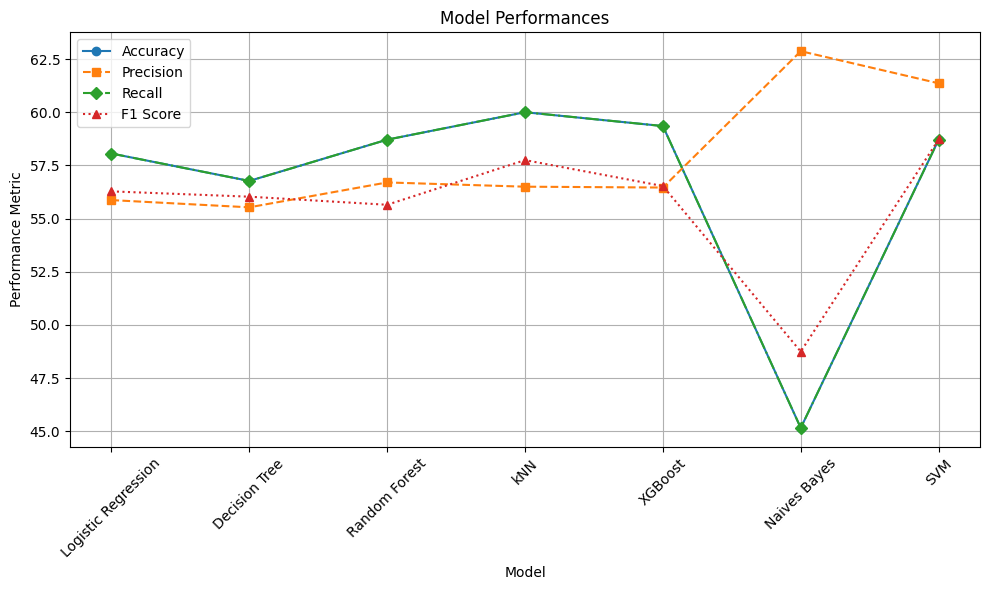

In [108]:
# Example structure for evaluation_metrics
evaluation_metrics = {
    'Logistic Regression': {'Accuracy': 58.06, 'Precision': 55.87, 'Recall': 58.06, 'F1 Score': 56.28},
    'Decision Tree': {'Accuracy': 56.77, 'Precision': 55.53, 'Recall': 56.77, 'F1 Score': 56.03},
    'Random Forest': {'Accuracy': 58.71, 'Precision': 56.70, 'Recall': 58.71, 'F1 Score': 55.65},
    'kNN': {'Accuracy': 60.0, 'Precision': 56.50, 'Recall': 60.0, 'F1 Score': 57.75},
    'XGBoost': {'Accuracy': 59.35, 'Precision': 56.46, 'Recall': 59.35, 'F1 Score': 56.53},
    'Naives Bayes': {'Accuracy': 45.16, 'Precision': 62.87, 'Recall': 45.16, 'F1 Score': 48.75},
    'SVM': {'Accuracy': 58.71, 'Precision': 61.36, 'Recall': 58.71, 'F1 Score': 58.72}
}

# Initialize a dictionary to store model performances
model_performance = {}

# Loop through each model's evaluation metrics
for model_name, metrics in evaluation_metrics.items():
    model_performance[model_name] = {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score']
    }

# Extract model names and metrics
models = list(model_performance.keys())
metrics = list(model_performance[models[0]].keys())

# Plot model performances using lines
fig, ax = plt.subplots(figsize=(10, 6))

# Define different markers and styles
markers = ['o', 's', 'D', '^', 'v', 'p', '*']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.']

# Plot each metric as a separate line
for metric_name, marker, linestyle in zip(metrics, markers, linestyles):
    values = [model_performance[model][metric_name] for model in models]
    ax.plot(models, values, marker=marker, linestyle=linestyle, label=metric_name)

# Add labels and legend
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric')
ax.set_title('Model Performances')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_pre, y_train)

# Display the model parameters
print(model)

RandomForestClassifier(random_state=42)


In [114]:
# Train all the models before evaluation

# Logistic Regression
logreg_model.fit(X_train_pre, y_train)

# Decision Tree
dtree_model.fit(X_train_pre, y_train)

# Random Forest
rf_model.fit(X_train_pre, y_train)

# kNN
knn_model.fit(X_train_pre_dense, y_train)

# XGBoost
best_xgb_model.fit(X_train_pre_dense, y_train)

# Naive Bayes
best_nb_model.fit(X_train_pre_dense, y_train)

# SVM
best_svm_model.fit(X_train_pre_dense, y_train)

SVC(C=1, gamma=1, kernel='linear', probability=True)

## Model Evaluation

### Evaluating current models

Evaluating Logistic Regression
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        69
           1       0.61      0.43      0.51        51
           2       0.00      0.00      0.00        16
           3       0.21      0.40      0.27        15
           4       0.00      0.00      0.00         4

    accuracy                           0.57       155
   macro avg       0.32      0.34      0.32       155
weighted avg       0.56      0.57      0.56       155

Confusion Matrix:
[[60  5  2  2  0]
 [15 22  3 10  1]
 [ 1  5  0 10  0]
 [ 2  2  5  6  0]
 [ 0  2  1  1  0]]
AUC-ROC: 0.82


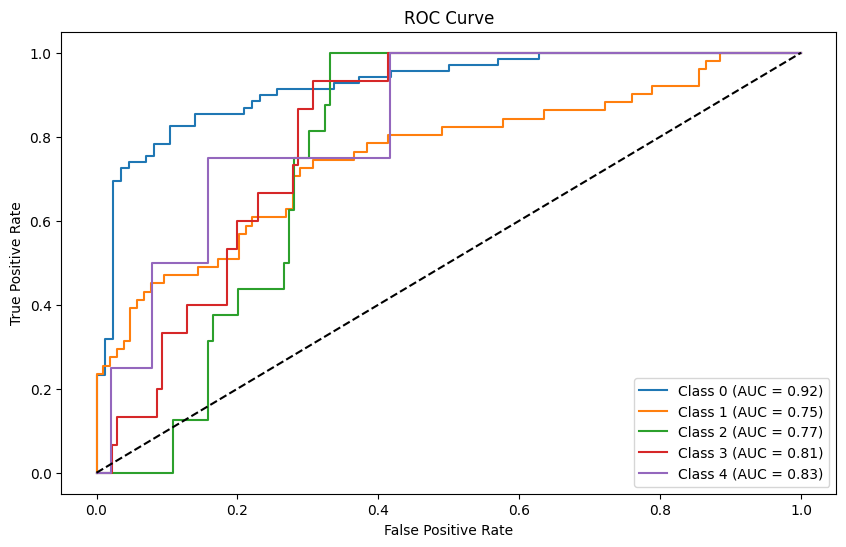

Evaluating Decision Tree
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        69
           1       0.42      0.39      0.40        51
           2       0.13      0.12      0.13        16
           3       0.14      0.20      0.17        15
           4       0.00      0.00      0.00         4

    accuracy                           0.49       155
   macro avg       0.29      0.29      0.29       155
weighted avg       0.49      0.49      0.49       155

Confusion Matrix:
[[51 14  2  2  0]
 [13 20  6 11  1]
 [ 5  4  2  4  1]
 [ 0  7  5  3  0]
 [ 0  3  0  1  0]]
AUC-ROC: 0.57


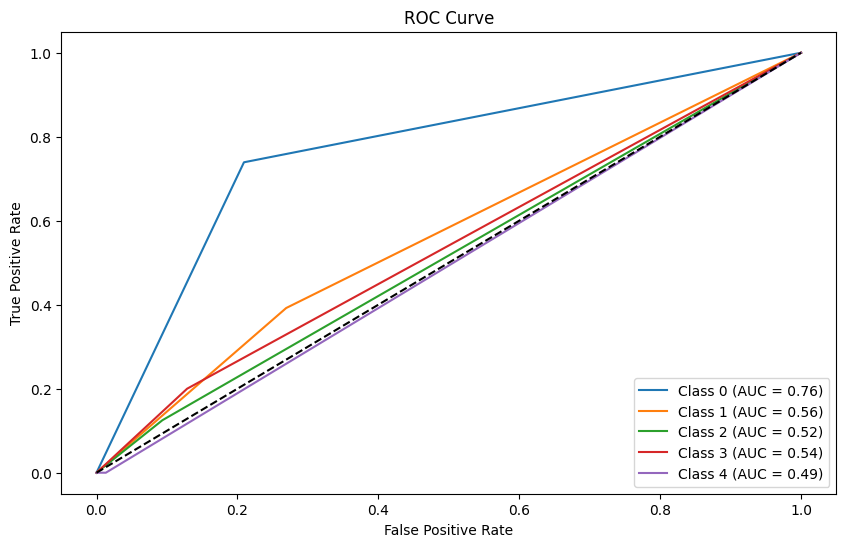

Evaluating Random Forest
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        69
           1       0.60      0.41      0.49        51
           2       0.14      0.12      0.13        16
           3       0.25      0.33      0.29        15
           4       1.00      0.25      0.40         4

    accuracy                           0.59       155
   macro avg       0.54      0.40      0.42       155
weighted avg       0.59      0.59      0.57       155

Confusion Matrix:
[[62  4  0  3  0]
 [17 21  7  6  0]
 [ 2  7  2  5  0]
 [ 3  3  4  5  0]
 [ 1  0  1  1  1]]
AUC-ROC: 0.80


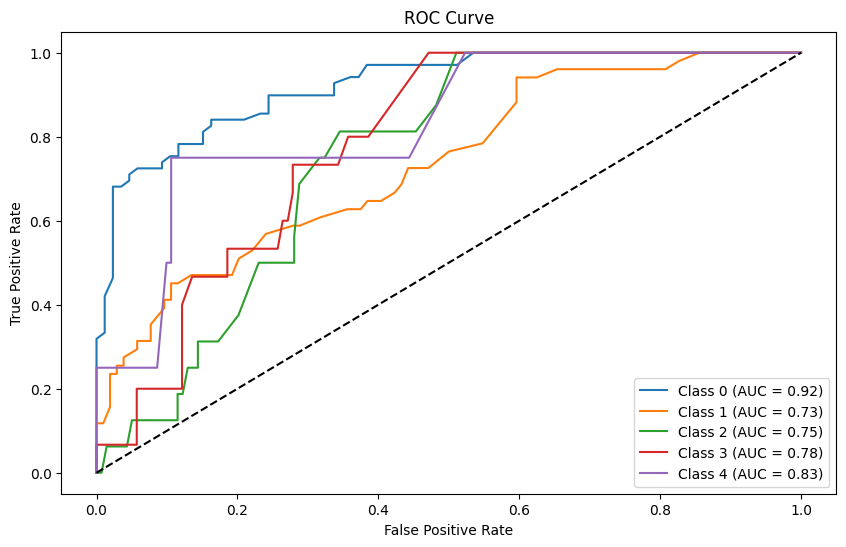

Evaluating kNN
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        69
           1       0.57      0.47      0.52        51
           2       0.22      0.25      0.24        16
           3       0.17      0.13      0.15        15
           4       0.00      0.00      0.00         4

    accuracy                           0.60       155
   macro avg       0.34      0.35      0.35       155
weighted avg       0.56      0.60      0.58       155

Confusion Matrix:
[[63  6  0  0  0]
 [15 24  6  6  0]
 [ 4  5  4  3  0]
 [ 0  7  6  2  0]
 [ 1  0  2  1  0]]
AUC-ROC: 0.75


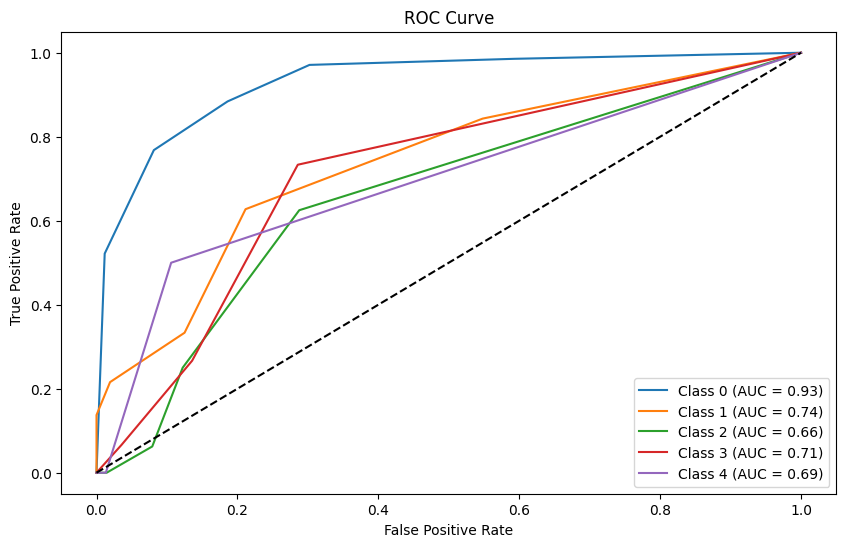

Evaluating XGBoost
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        69
           1       0.59      0.39      0.47        51
           2       0.27      0.19      0.22        16
           3       0.24      0.33      0.28        15
           4       0.00      0.00      0.00         4

    accuracy                           0.59       155
   macro avg       0.36      0.37      0.36       155
weighted avg       0.56      0.59      0.57       155

Confusion Matrix:
[[64  3  1  1  0]
 [19 20  5  7  0]
 [ 2  4  3  7  0]
 [ 3  6  1  5  0]
 [ 1  1  1  1  0]]
AUC-ROC: 0.83


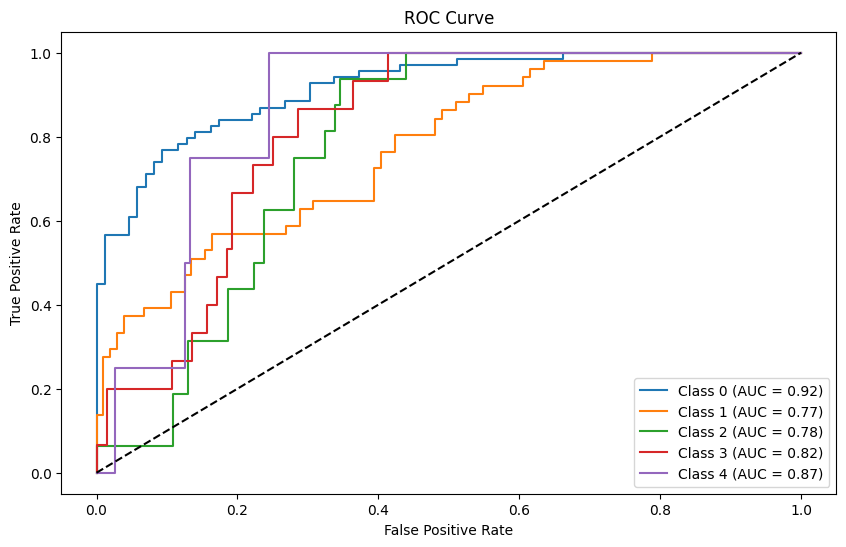

Evaluating Naive Bayes
Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        69
           1       0.75      0.24      0.36        51
           2       0.00      0.00      0.00        16
           3       0.18      0.13      0.15        15
           4       0.05      0.75      0.10         4

    accuracy                           0.45       155
   macro avg       0.36      0.38      0.28       155
weighted avg       0.63      0.45      0.49       155

Confusion Matrix:
[[53  2  2  3  9]
 [12 12  3  4 20]
 [ 0  0  0  2 14]
 [ 0  1  2  2 10]
 [ 0  1  0  0  3]]
AUC-ROC: 0.76


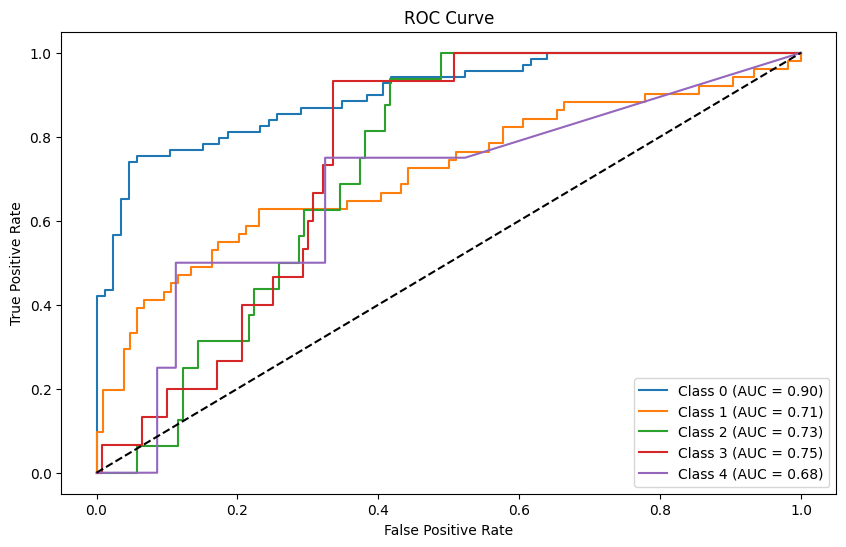

Evaluating SVM
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        69
           1       0.68      0.45      0.54        51
           2       0.10      0.06      0.08        16
           3       0.16      0.33      0.21        15
           4       0.50      0.25      0.33         4

    accuracy                           0.59       155
   macro avg       0.44      0.40      0.40       155
weighted avg       0.61      0.59      0.59       155

Confusion Matrix:
[[61  4  1  3  0]
 [13 23  2 12  1]
 [ 1  4  1 10  0]
 [ 2  2  6  5  0]
 [ 0  1  0  2  1]]
AUC-ROC: 0.83


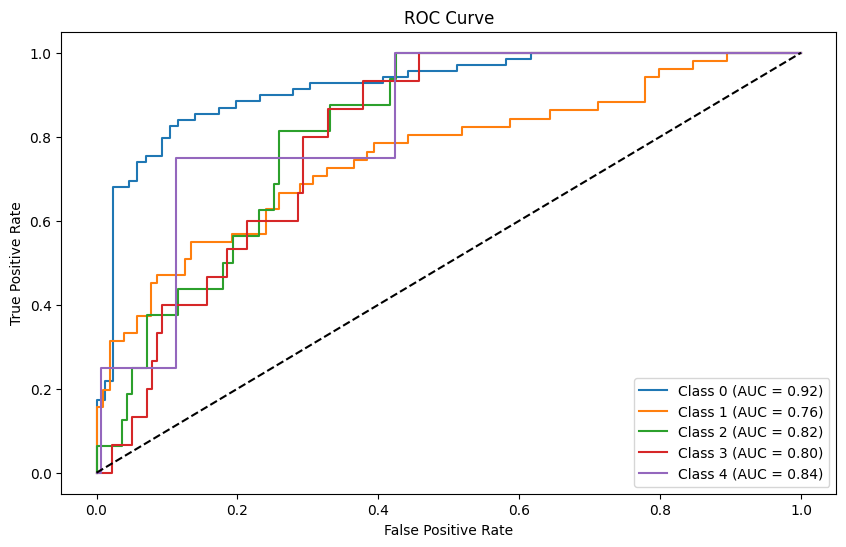

In [117]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"AUC-ROC: {roc_auc:.2f}")
    
    plt.figure(figsize=(10, 6))
    for i in range(y_pred_proba.shape[1]):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_pred_proba[:, i]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Assuming models have been trained and X_test, y_test are defined
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dtree_model,
    'Random Forest': rf_model,
    'kNN': knn_model,
    'XGBoost': best_xgb_model,
    'Naive Bayes': best_nb_model,
    'SVM': best_svm_model
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, X_test_pre, y_test)


### Evaluating with unseen dataset

In [ ]:
FOR EXPLANATION SEE MY NOTES IN MATCHING COLUMNS AND DATASETS

In [254]:
# Load datasets
evaluation_df = pd.read_csv(file_path2)

heart_df = evaluation_df
uci_df = data

# Rename columns in heart.csv to match UCI dataset
heart_df = heart_df.rename(columns={
    'thalach': 'thalch',
    'target': 'num'
})

# Map categorical values to match UCI dataset
heart_df['sex'] = heart_df['sex'].map({1: 'Male', 0: 'Female'})
heart_df['cp'] = heart_df['cp'].map({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})
heart_df['restecg'] = heart_df['restecg'].map({
    0: 'normal',
    1: 'st-t wave abnormality',
    2: 'left ventricular hypertrophy'
})
heart_df['exang'] = heart_df['exang'].apply(lambda x: True if x == 1 else False)
heart_df['slope'] = heart_df['slope'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})
heart_df['dataset'] = 'Unknown'
heart_df['thal'] = heart_df['thal'].map({
    0: 'normal',
    1: 'fixed defect',
    2: 'reversable defect',
    3: 'reversable defect' 
})
heart_df['fbs'] = heart_df['fbs'].astype(bool)
heart_df['ca'] = heart_df['ca'].astype(float)

# Ensure the target variable is converted if needed
heart_df['num'] = heart_df['num'].apply(lambda x: 1 if x > 0 else 0)
num_column = heart_df.pop('num')
converted_file_path = 'converted_heart.csv' 
heart_df.to_csv(converted_file_path, index=False)

print(f"Converted dataset saved to {converted_file_path}")

Converted dataset saved to converted_heart.csv


In [255]:
heart_df = heart_df.loc[:, ~heart_df.columns.duplicated()]
heart_df['num'] = num_column
converted_heart_df = pd.read_csv('converted_heart.csv') 

print(heart_df.head())

   age     sex              cp  trestbps  chol    fbs                restecg  \
0   52    Male  typical angina       125   212  False  st-t wave abnormality   
1   53    Male  typical angina       140   203   True                 normal   
2   70    Male  typical angina       145   174  False  st-t wave abnormality   
3   61    Male  typical angina       148   203  False  st-t wave abnormality   
4   62  Female  typical angina       138   294   True  st-t wave abnormality   

   thalch  exang  oldpeak        slope   ca               thal  dataset  num  
0     168  False      1.0  downsloping  2.0  reversable defect  Unknown    0  
1     155   True      3.1    upsloping  0.0  reversable defect  Unknown    0  
2     125   True      2.6    upsloping  0.0  reversable defect  Unknown    0  
3     161  False      0.0  downsloping  1.0  reversable defect  Unknown    0  
4     106  False      1.9         flat  3.0  reversable defect  Unknown    0  


In [256]:
# Align the order of columns with the training data
converted_heart_df = converted_heart_df[X_train.columns]
converted_heart_df['num'] = num_column
# Verify the changes
print("Final columns of evaluation data:")
print(converted_heart_df.head())

Final columns of evaluation data:
   age     sex  dataset              cp  trestbps  chol    fbs  \
0   52    Male  Unknown  typical angina       125   212  False   
1   53    Male  Unknown  typical angina       140   203   True   
2   70    Male  Unknown  typical angina       145   174  False   
3   61    Male  Unknown  typical angina       148   203  False   
4   62  Female  Unknown  typical angina       138   294   True   

                 restecg  thalch  exang  oldpeak        slope   ca  \
0  st-t wave abnormality     168  False      1.0  downsloping  2.0   
1                 normal     155   True      3.1    upsloping  0.0   
2  st-t wave abnormality     125   True      2.6    upsloping  0.0   
3  st-t wave abnormality     161  False      0.0  downsloping  1.0   
4  st-t wave abnormality     106  False      1.9         flat  3.0   

                thal  num  
0  reversable defect    0  
1  reversable defect    0  
2  reversable defect    0  
3  reversable defect    0  
4  rever

In [257]:
evaluation_df = converted_heart_df

In [268]:
# Verify the loaded data
print("Loaded evaluation data:")
print(evaluation_df.head())
evaluation_df['num'] = num_column
# Separate features and target
evaluation_X = evaluation_df.drop(columns=['num'])
evaluation_y = num_column

# Apply transformations to the evaluation data
evaluation_X_pre = preprocessor.transform(evaluation_X)
evaluation_X_pre = pd.DataFrame(evaluation_X_pre, columns=preprocessor.get_feature_names_out())

# Verify the shape and column names again
print(f"Evaluation preprocessed data shape: {evaluation_X_pre.shape}")
print("Evaluation preprocessed column names:")
print(evaluation_X_pre.columns)

Loaded evaluation data:
   age     sex  dataset              cp  trestbps  chol    fbs  \
0   52    Male  Unknown  typical angina       125   212  False   
1   53    Male  Unknown  typical angina       140   203   True   
2   70    Male  Unknown  typical angina       145   174  False   
3   61    Male  Unknown  typical angina       148   203  False   
4   62  Female  Unknown  typical angina       138   294   True   

                 restecg  thalch  exang  oldpeak        slope   ca  \
0  st-t wave abnormality     168  False      1.0  downsloping  2.0   
1                 normal     155   True      3.1    upsloping  0.0   
2  st-t wave abnormality     125   True      2.6    upsloping  0.0   
3  st-t wave abnormality     161  False      0.0  downsloping  1.0   
4  st-t wave abnormality     106  False      1.9         flat  3.0   

                thal  
0  reversable defect  
1  reversable defect  
2  reversable defect  
3  reversable defect  
4  reversable defect  
Evaluation preproces

In [270]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("First few entries of y_train:\n", y_train.head())
print("First few entries of y_test:\n", y_test.head())

# Ensure y is in the correct format
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Verify the new shapes
print("New shape of y_train:", y_train.shape)
print("New shape of y_test:", y_test.shape)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "kNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

Shape of y_train: (820,)
Shape of y_test: (205,)
First few entries of y_train:
 835    0
137    1
534    1
495    1
244    1
Name: num, dtype: int64
First few entries of y_test:
 527    1
359    1
447    0
31     1
621    0
Name: num, dtype: int64
New shape of y_train: (820,)
New shape of y_test: (205,)


Training Logistic Regression...
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.80      0.85      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

Confusion Matrix:
[[80 22]
 [15 88]]
AUC-ROC: 0.89


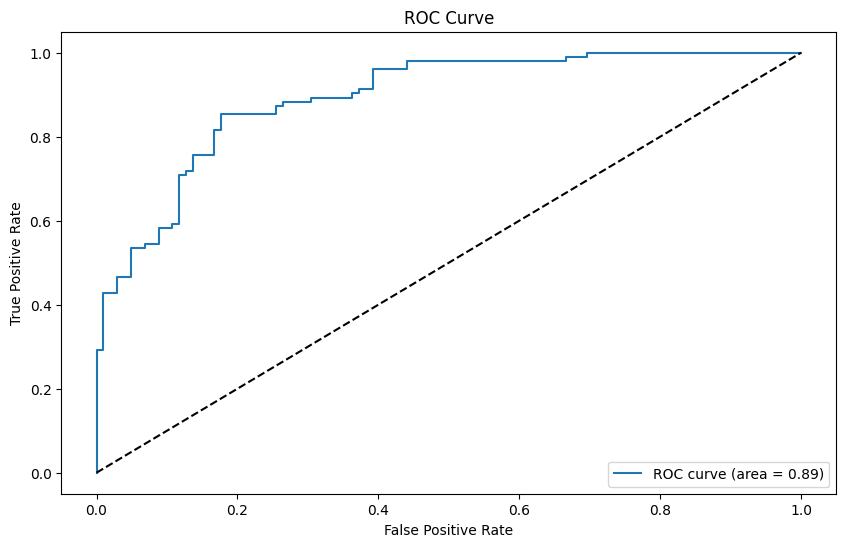

Training Decision Tree...
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]
AUC-ROC: 0.99


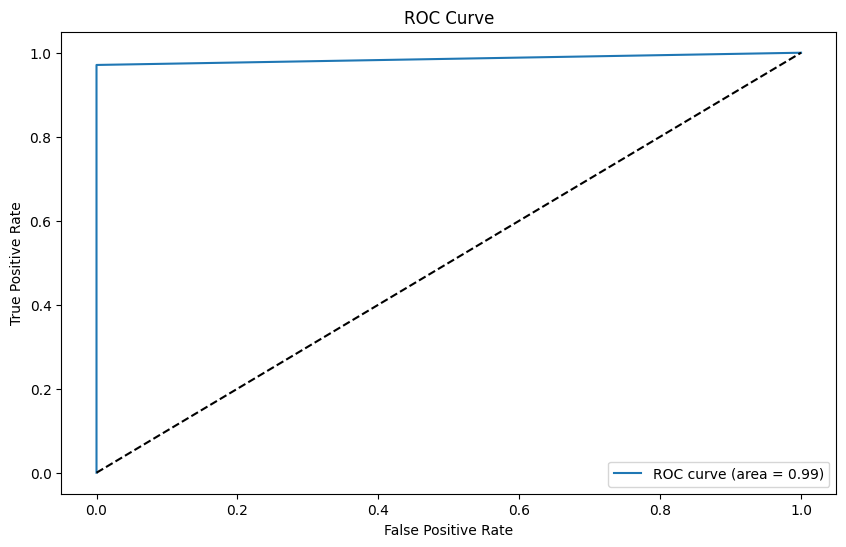

Training Random Forest...
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]
AUC-ROC: 1.00


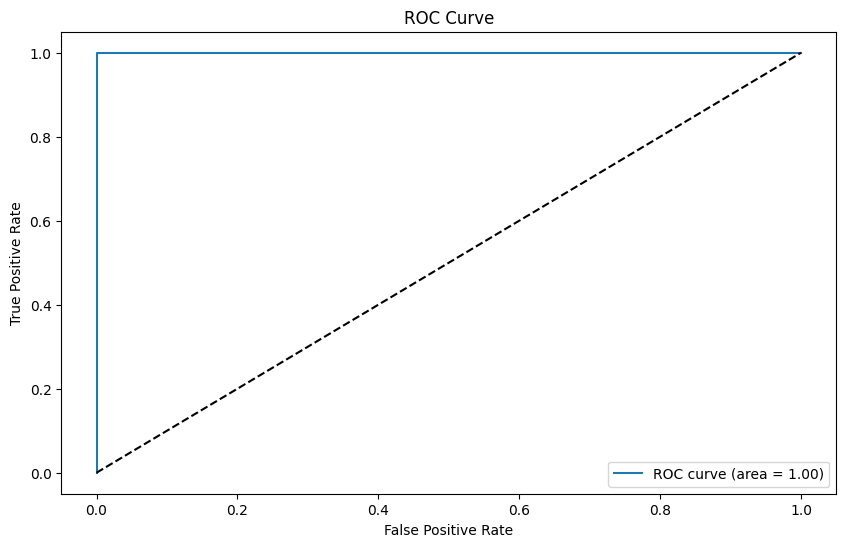

Training kNN...
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       102
           1       0.83      0.82      0.82       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

Confusion Matrix:
[[85 17]
 [19 84]]
AUC-ROC: 0.95


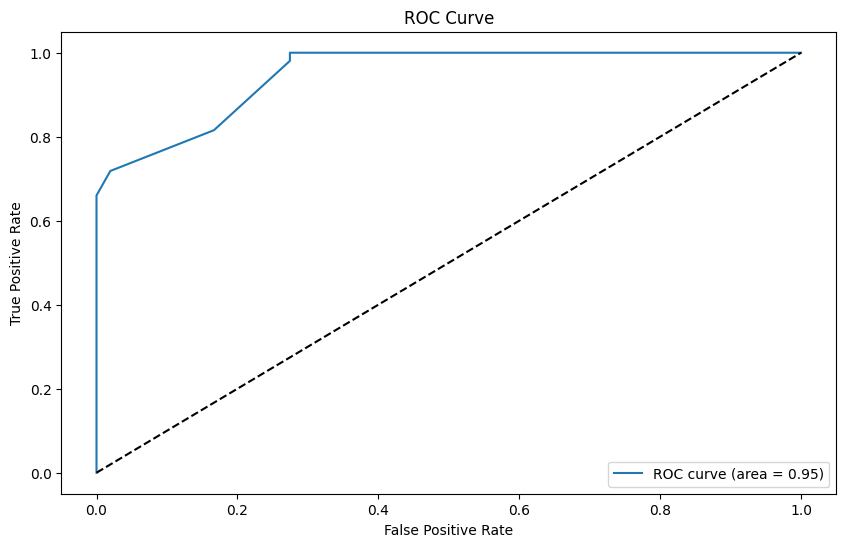

Training XGBoost...
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]
AUC-ROC: 0.98


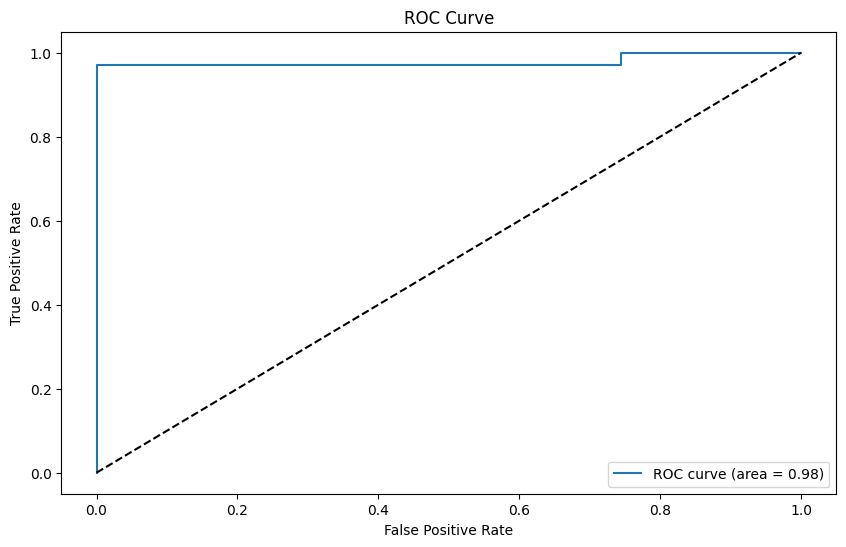

Training Naive Bayes...
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.49      0.63       102
           1       0.65      0.93      0.76       103

    accuracy                           0.71       205
   macro avg       0.76      0.71      0.70       205
weighted avg       0.76      0.71      0.70       205

Confusion Matrix:
[[50 52]
 [ 7 96]]
AUC-ROC: 0.81


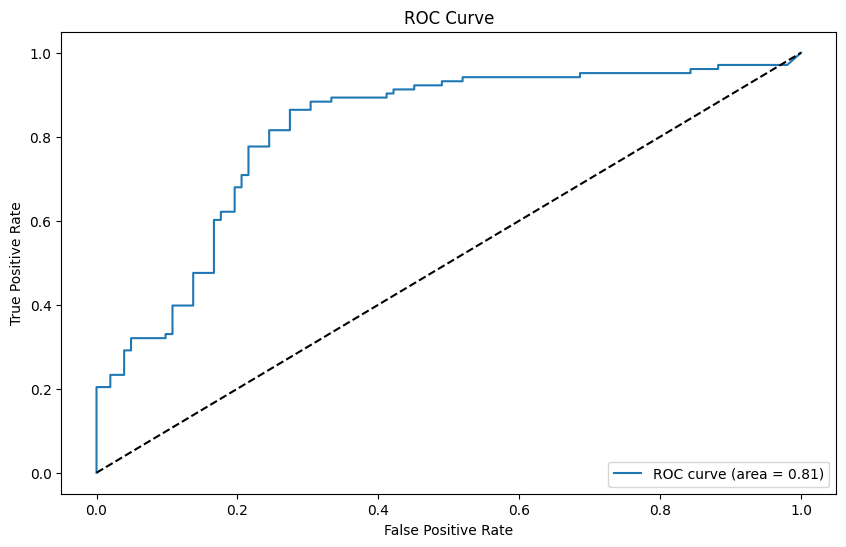

Training SVM...
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       102
           1       0.81      0.93      0.87       103

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205

Confusion Matrix:
[[80 22]
 [ 7 96]]
AUC-ROC: 0.92


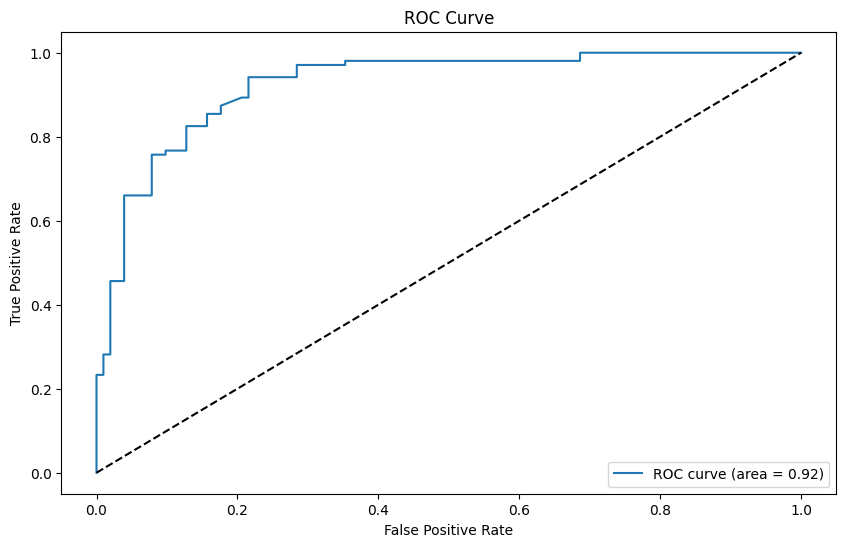

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure y is in the correct format
y_train = y_train.ravel()
y_test = y_test.ravel()

# Function to evaluate the models
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y, y_pred_proba)
        print(f"AUC-ROC: {roc_auc:.2f}")

        fpr, tpr, _ = roc_curve(y, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

# Train and evaluate the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


Evaluation preprocessed data shape after adding missing features: (1025, 32)
Evaluation preprocessed column names after adding missing features:
Index(['num__age', 'num__trestbps', 'num__chol', 'num__thalch', 'num__oldpeak',
       'cat__sex_Female', 'cat__sex_Male', 'cat__dataset_Cleveland',
       'cat__dataset_Hungary', 'cat__dataset_Switzerland',
       'cat__dataset_VA Long Beach', 'cat__cp_asymptomatic',
       'cat__cp_atypical angina', 'cat__cp_non-anginal',
       'cat__cp_typical angina', 'cat__restecg_lv hypertrophy',
       'cat__restecg_normal', 'cat__restecg_st-t abnormality',
       'cat__slope_downsloping', 'cat__slope_flat', 'cat__slope_upsloping',
       'cat__ca_0.0', 'cat__ca_1.0', 'cat__ca_2.0', 'cat__ca_3.0',
       'cat__thal_fixed defect', 'cat__thal_normal',
       'cat__thal_reversable defect', 'bool__fbs_False', 'bool__fbs_True',
       'bool__exang_False', 'bool__exang_True'],
      dtype='object')
Evaluating Logistic Regression on new evaluation data...
Acc

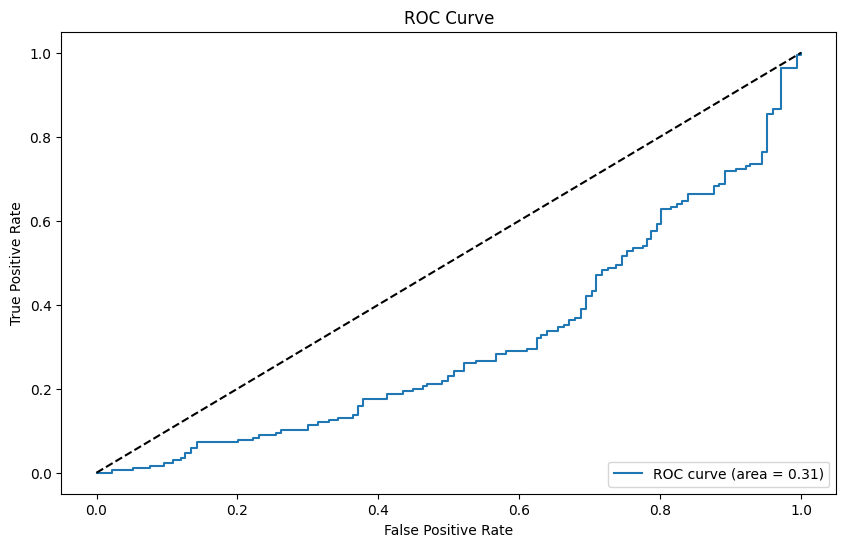

Evaluating Decision Tree on new evaluation data...
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.26      0.27       499
           1       0.39      0.25      0.31       526
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.26      1025
   macro avg       0.13      0.10      0.11      1025
weighted avg       0.33      0.26      0.29      1025

Confusion Matrix:
[[132 211  93  52  11]
 [361 134  16  15   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
AUC-ROC: 0.42


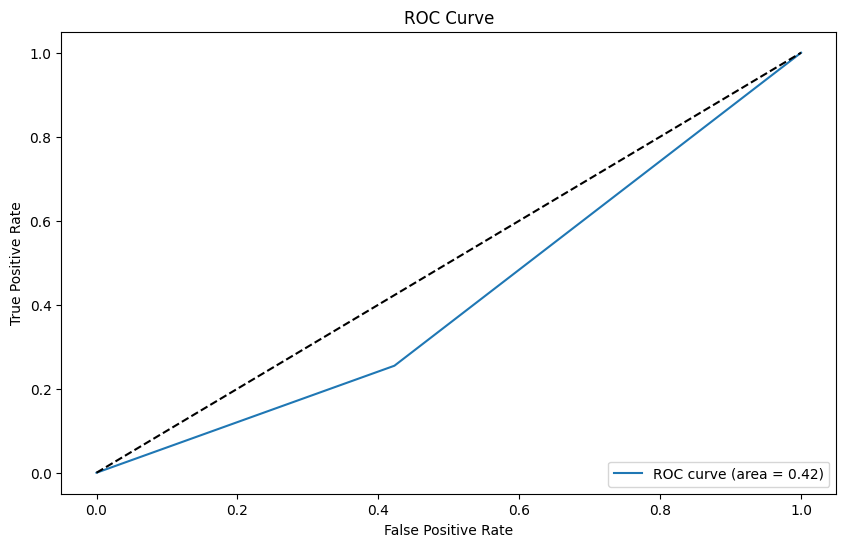

Evaluating Random Forest on new evaluation data...
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.51      0.41       499
           1       0.22      0.08      0.11       526
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.29      1025
   macro avg       0.14      0.15      0.13      1025
weighted avg       0.28      0.29      0.26      1025

Confusion Matrix:
[[252 148  81  18]
 [476  41   3   6]
 [  0   0   0   0]
 [  0   0   0   0]]
AUC-ROC: 0.40


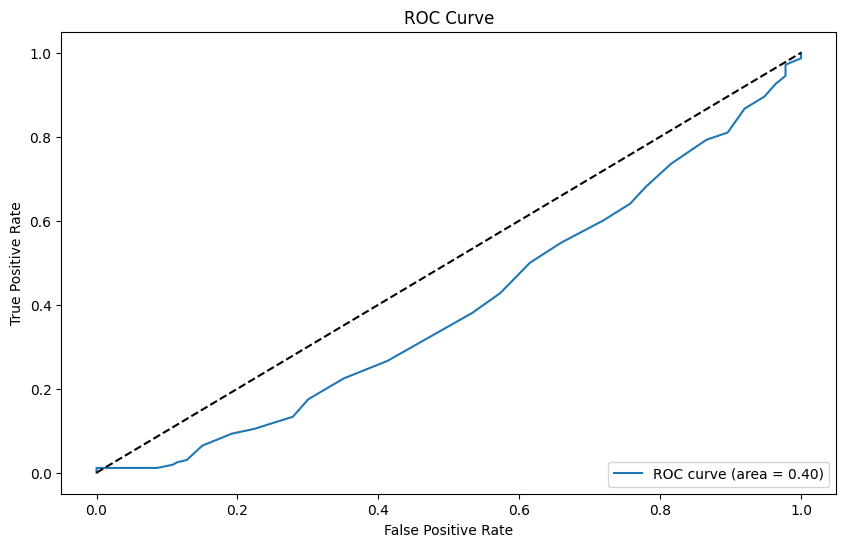

Evaluating Naive Bayes on new evaluation data...
Accuracy: 0.07
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.08      0.12       499
           1       0.40      0.06      0.10       526
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.07      1025
   macro avg       0.12      0.03      0.04      1025
weighted avg       0.30      0.07      0.11      1025

Confusion Matrix:
[[ 42  44 315  11  87]
 [176  29  67  15 239]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
AUC-ROC: 0.56


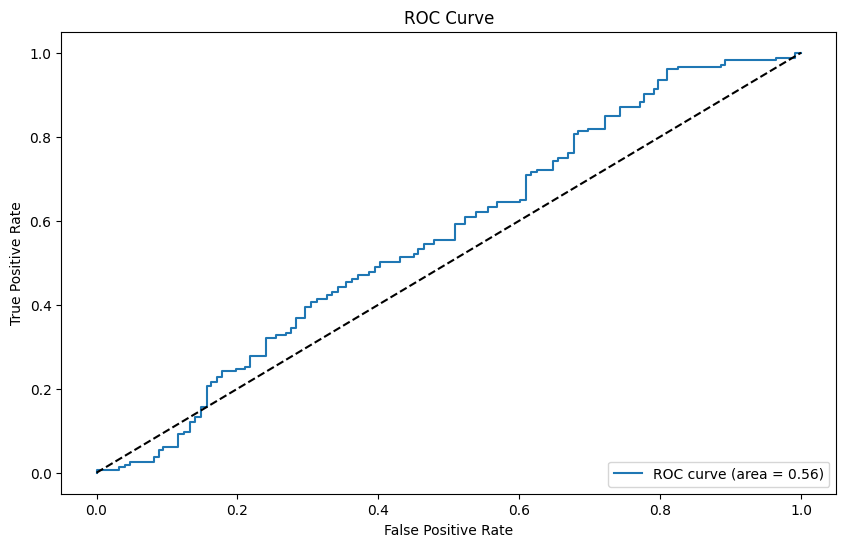

In [283]:
# Manually add the missing boolean features to the evaluation data
missing_bool_features = ['bool__exang_False', 'bool__exang_True', 'bool__fbs_False', 'bool__fbs_True']
for feature in missing_bool_features:
    evaluation_X_pre[feature] = 0  # Add with default value 0

eval_models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dtree_model,
    'Random Forest': rf_model,
    #'kNN': knn_model,
    #'XGBoost': best_xgb_model,
    'Naive Bayes': best_nb_model,
    #'SVM': best_svm_model
}    
# Ensure all expected columns are present
expected_columns = eval_models["Logistic Regression"].feature_names_in_
missing_columns = set(expected_columns) - set(evaluation_X_pre.columns)
for col in missing_columns:
    evaluation_X_pre[col] = 0  # Add missing column with default value

# Reorder the columns to match the expected order
evaluation_X_pre = evaluation_X_pre[expected_columns]

# Verify the changes
print("Evaluation preprocessed data shape after adding missing features:", evaluation_X_pre.shape)
print("Evaluation preprocessed column names after adding missing features:")
print(evaluation_X_pre.columns)

# Evaluate the models
for model_name, model in eval_models.items():
    print(f"Evaluating {model_name} on new evaluation data...")
    evaluate_model(model, evaluation_X_pre, evaluation_y)


## Deep Learning techniques